# Predict a possible heart disease

In this notebook, the main objective is to build a predictive model to see whether a patient would be diagnosed with heart disease. This model can help those with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease), an early detection and management of heart disease would be very helpful.

Not only that, we are also going to give insights of the data through visualization and graphing so that we can have an overview on the datasets.



Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

## Import all neccessary libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


## 1.0 Data Understanding

#### 1.1 Reading dataset using Pandas library

In [2]:
heart = pd.read_csv('heart.csv')
heart

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164          0         ST   
12    39   M           ATA        120          204          0     Normal   
13    49   M           ASY        140          234          0     Normal   
14    42   F           NAP        115          211          0         ST   
15    54   F           ATA        120          273          0     Normal   
16    38   M           ASY        110          196          0     Normal   
17    43   F           ATA        120          201          0     Normal   
18    60   M           ASY        100          248          0     Normal   
19    36   M           ATA        120          267          0     Normal   
20    43   F            TA        100          223          0     Normal   
21    44   M           ATA        120          184          0     Normal   
22    49   F           ATA        124          201          0     Normal   
23    44   M           ATA        150          288          0     Normal   
24    40   M           NAP        130          215          0     Normal   
25    36   M           NAP        130          209          0     Normal   
26    53   M           ASY        124          260          0         ST   
27    52   M           ATA        120          284          0     Normal   
28    53   F           ATA        113          468          0     Normal   
29    51   M           ATA        125          188          0     Normal   
30    53   M           NAP        145          518          0     Normal   
31    56   M           NAP        130          167          0     Normal   
32    54   M           ASY        125          224          0     Normal   
33    41   M           ASY        130          172          0         ST   
34    43   F           ATA        150          186          0     Normal   
35    32   M           ATA        125          254          0     Normal   
36    65   M           ASY        140          306          1     Normal   
37    41   F           ATA        110          250          0         ST   
38    48   F           ATA        120          177          1         ST   
39    48   F           ASY        150          227          0     Normal   
40    54   F           ATA        150          230          0     Normal   
41    54   F           NAP        130          294          0         ST   
42    35   M           ATA        150          264          0     Normal   
43    52   M           NAP        140          259          0         ST   
44    43   M           ASY        120          175          0     Normal   
45    59   M           NAP        130          318          0     Normal   
46    37   M           ASY        120          223          0     Normal   
47    50   M           ATA        140          216          0     Normal   
48    36   M           NAP        112          340          0     Normal   
49    41   M           ASY        110          289          0     Normal   
50    50   M           ASY        130          233          0     Normal   
51    47   F           ASY        120          205   

In [3]:
heart.shape

(918, 12)

From the above dataframe we can tell that,

- Our **target variable** on this dataset is the 'Heart Disease' column
- There are 918 rows and 12 columns

## 1.2 Data Description

In this section, we will get to know the all data types and its value

### 1.2.1 Understanding each columns

#### To know the data types of each columns

In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

There are some string data are saved as the form of object, so we have to convert it back to work on it

In [5]:
objectData = heart.select_dtypes(include="object").columns
heart[objectData]=heart[objectData].astype("string")

In [6]:
heart.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

Now, all object data are converted into string format

#### Identifying the categorical and numerical columns

In [7]:
#Identifying columns with categorical data
string_col=heart.select_dtypes("string").columns.to_list()
string_col



['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [8]:
categorical_features = heart.columns.tolist()
categorical_features

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [9]:
#Identifying columns with numerical data excluding the target feature
num_col=heart.columns.to_list()
#remove columns with string data
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")
print(num_col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


#### Understanding values of categorical columns

In [10]:
heart.Sex.unique()

<StringArray>
['M', 'F']
Length: 2, dtype: string

In [11]:
heart.ChestPainType.unique()

<StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string

In [12]:
heart.RestingECG.unique()

<StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string

In [13]:
heart.ExerciseAngina.unique()

<StringArray>
['N', 'Y']
Length: 2, dtype: string

In [14]:
heart.ST_Slope.unique()

<StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string

#### Understanding values of numerical columns

In [15]:
heart.FastingBS.unique()

array([0, 1], dtype=int64)

From here, we know that FastingBS is a categorical data instead of numerical data even though its data type is int.

In [16]:
heart.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [17]:
heart.MaxHR.unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

In [18]:
heart.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [19]:
heart.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

We found that there are columns with zero values in 'RestingBP' which is impossible, therefore we will work on these columns during data preparation

In [20]:
heart.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

We found that there are columns with zero values in 'Cholesterol' which is impossible, therefore we will work on these columns during data preparation

Numerical columns above are the columns we need to check for outliers in data preparation step

#### Checking for null value

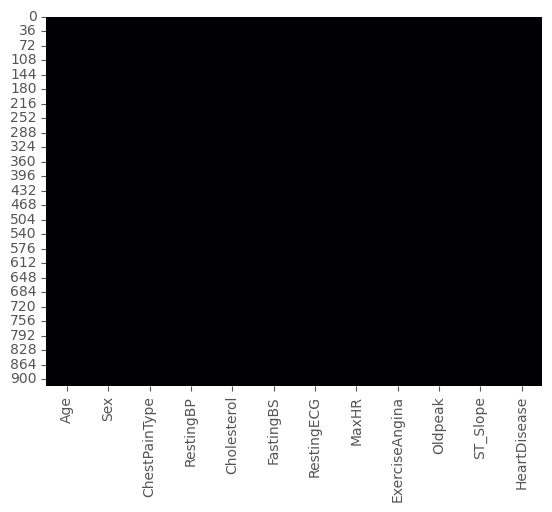

In [21]:
#Null Value
sns.heatmap(heart.isnull(),cmap = 'magma',cbar = False);

From here, we know that there is no null values in this dataset. Therefore, there is no need to eliminate null values during data preparation step later.

#### Summary Statistics

In [22]:
heart.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

From here, we can list out all the attributes of this dataset
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## 2.3 Exploratory Data Analysis

The purpose of this step : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

#### 2.3.1 Understanding average values of all the attributes for cases of with heart disease and withou heart disease

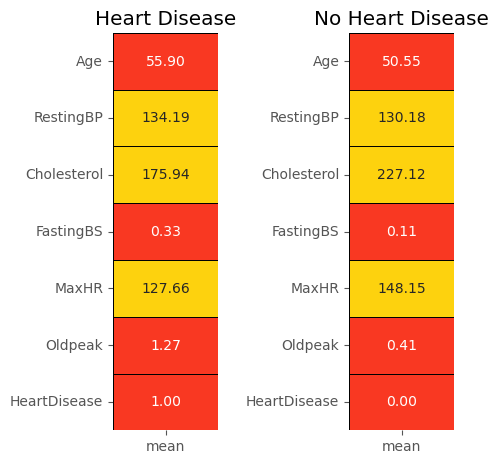

In [23]:
yes = heart[heart['HeartDisease'] == 1].describe().T
no = heart[heart['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

## 2.3 Data Visualization

### Correlation Matrix wtih Heatmap
#### It's necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [24]:
px.imshow(heart.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation with "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP

### Data Visualization with Histogram

- Visualizing the distribution of heart disease between genders

In [25]:
fig=px.histogram(heart, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=heart.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

From here, we can know that male have a higher chance of getting heart disease when compared to female

- Visualizing distribution of chest pain type with respect to genders

In [26]:
fig=px.histogram(heart,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=heart.columns,
                 title="Types of Chest Pain",
                 barmode = "stack")
fig.show()

In [27]:
# grouped = heart.groupby(['ChestPainType', 'Sex']).size().unstack(fill_value=0)

# grouped.plot(kind='bar', stacked=False)
# plt.title("Types of Chest Pain")
# plt.show()

From here, we can see that most of the male is having 'ASY' chest pain and most female is having 'ATA' chest pain

In [28]:
# fig=px.histogram(heart,
#                  x="Sex",
#                  hover_data=heart.columns,
#                  title="Sex Ratio in the Data")
# fig.show()

In [29]:
fig=px.histogram(heart,
                 x="RestingECG",
                 hover_data=heart.columns,
                 title="Distribution of Resting ECG")
fig.show()

#### Distribution of gender with pie chart

In [30]:
fig=px.pie(heart,
           names='Sex',
           title='Sex Ratio in the Data',
           color='Sex',
           color_discrete_map = {'M':'lightblue', 'F':'pink'})
fig.show()

Most of the respondents in this dataset are males

#### Distribution of Age for patients with and without heart disease


In [31]:
fig = px.box(heart, x='HeartDisease', y='Age', title='Age Distribution by Heart Disease Status')
fig.show()

#### Relationship between Age and MaxHR with presence of HeartDisease

In [32]:
fig = px.scatter(heart, x='Age',
                 y='MaxHR', 
                 color='HeartDisease', 
                 title='Age vs. MaxHR by Heart Disease Status')
fig.show()

# 3.0 Data Preparation

### 3.1 Handling null values

In [33]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Since there is no null values in the dataset no data cleaning is needed

In [34]:
heartCleaned = heart.copy()

### 3.2 Handling Outliers

From section 1.2.1, we know that numerical data are 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

We have to detect outliers for numerical data only by using boxplot

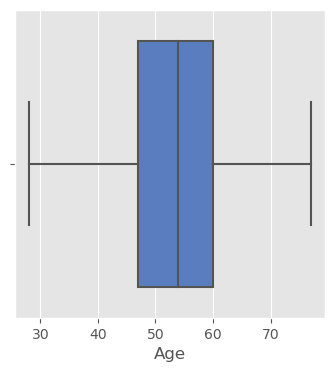

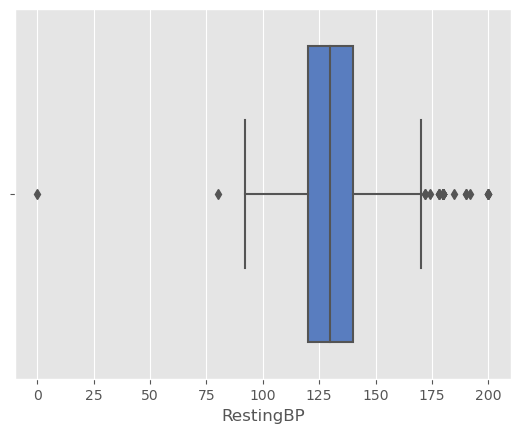

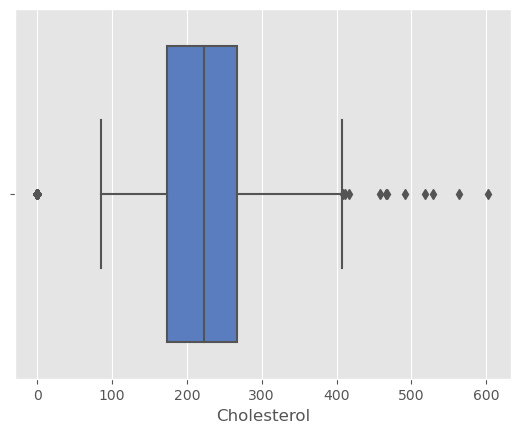

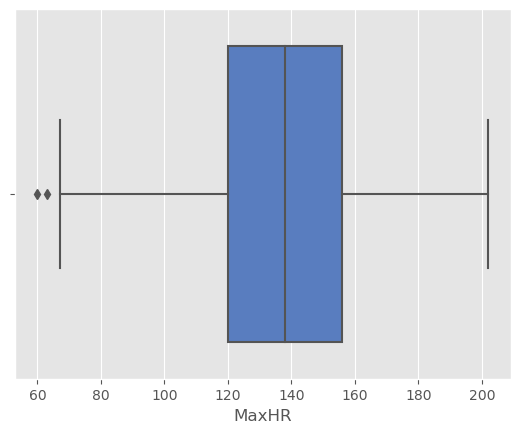

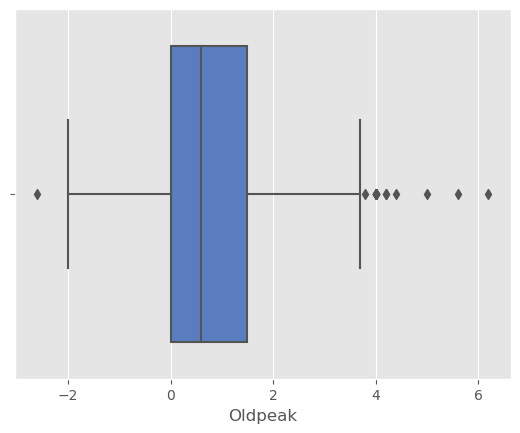

In [35]:
#check outlier using boxplots
lst = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig= plt.figure(figsize=(4,4))
for i in lst:
    sns.boxplot(heart[i],palette='muted')
    plt.show()

There are lots of outliers in RestingBP and Cholesterol

In [36]:
heart['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [37]:
heart['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

It is impossible to have 0 Cholesterol and 0 RestingBP

In [38]:
heart['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [39]:
heart['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Based on the box plot and .describe(), we can see that outliers has been detected. It is known that for these features having a maximum values much more larger than 75% quartile.

However, depending on the context of heart failure and our analysis purpose, we will only impute the outliers with zero values with their median, as the other outliers may contain valueble information and should not be removed

In [40]:
#RestingBP

## Checking the number of 0 present in the RestingBP
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP.shape


(1, 12)

Only 1 row is having the RestingBP of 0

In [41]:
#RestingBP represents the blood pressure of the patient. 
#It is not possible to have values equal to Zero(0).
# remove the value Zero(0)
heart = heart.drop(heart[(heart['RestingBP'] == 0)].index)
heart['RestingBP']

0      140
1      160
2      130
3      138
4      150
5      120
6      130
7      110
8      140
9      120
10     130
11     136
12     120
13     140
14     115
15     120
16     110
17     120
18     100
19     120
20     100
21     120
22     124
23     150
24     130
25     130
26     124
27     120
28     113
29     125
30     145
31     130
32     125
33     130
34     150
35     125
36     140
37     110
38     120
39     150
40     150
41     130
42     150
43     140
44     120
45     130
46     120
47     140
48     112
49     110
50     130
51     120
52     140
53     130
54     130
55     160
56     120
57     130
58     150
59     112
60     100
61     150
62     140
63     120
64     110
65     120
66     132
67     110
68     160
69     150
70     140
71     130
72     120
73     120
74     140
75     150
76     118
77     140
78     140
79     130
80     110
81     120
82     150
83     160
84     150
85     140
86     170
87     140
88     120
89     140
90     110

In [42]:
# Checking the number of 0 present in the Cholesterol
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol.shape

(171, 12)

There are 171 rows having the Cholesterol of 0, we have to replace the zeros with median.

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='median')
imputer = imputer.fit(heart[['Cholesterol']])
heart['Cholesterol'] = imputer.transform(heart[['Cholesterol']])

In [44]:
# set Cholesterol data that has zero values to null 
# heart.loc[heart['Cholesterol'] == 0,'Cholesterol'] = np.nan

In [45]:
# filling null value with median value of Cholesterol
# heart['Cholesterol'].fillna(heart['Cholesterol'].median,inplace = True)


In [46]:
heart['Cholesterol'].max


<bound method NDFrame._add_numeric_operations.<locals>.max of 0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
5      339.0
6      237.0
7      208.0
8      207.0
9      284.0
10     211.0
11     164.0
12     204.0
13     234.0
14     211.0
15     273.0
16     196.0
17     201.0
18     248.0
19     267.0
20     223.0
21     184.0
22     201.0
23     288.0
24     215.0
25     209.0
26     260.0
27     284.0
28     468.0
29     188.0
30     518.0
31     167.0
32     224.0
33     172.0
34     186.0
35     254.0
36     306.0
37     250.0
38     177.0
39     227.0
40     230.0
41     294.0
42     264.0
43     259.0
44     175.0
45     318.0
46     223.0
47     216.0
48     340.0
49     289.0
50     233.0
51     205.0
52     224.0
53     245.0
54     180.0
55     194.0
56     270.0
57     213.0
58     365.0
59     342.0
60     253.0
61     254.0
62     224.0
63     277.0
64     202.0
65     260.0
66     297.0
67     225.0
68     246.0
69     412.0
70     265.0
71     215.0
72

In [47]:
#dataset after outlier is cleared
heartClearOutlier = heart.copy()

## 3.3 Label Encoding

To handle categorical data including ordinal and nominal data
- One - Hot Encoding is suitable for nominal data with a small no of unique values [For working with non-tree based algortihms] 
- Label Encoding is suitable for ordinal data with a small no of unique values  [For working with non-tree based algortihms]

In this project, we will use both tree-based and non-tree based algorithms.
Therefore, we will apply both label encoding method and use the encoded dataset accordingly.

### 3.3.1 One-Hot Encoding for non-tree based algorithms

In [48]:
df_nontree=pd.get_dummies(heart,columns=string_col,drop_first=False)
df_nontree.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140        289.0          0    172      0.0             0   
1   49        160        180.0          0    156      1.0             1   
2   37        130        283.0          0     98      0.0             0   
3   48        138        214.0          0    108      1.5             1   
4   54        150        195.0          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

In [49]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,heart[target]],axis=1)
df_nontree.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140        289.0          0    172      0.0      0      1   
1   49        160        180.0          0    156      1.0      1      0   
2   37        130        283.0          0     98      0.0      0      1   
3   48        138        214.0          0    108      1.5      1      0   
4   54        150        195.0          0    122      0.0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  ChestPainType_TA  \
0                  0                  1  ...                 0   
1                  0                  0  ...                 0   
2                  0                  1  ...                 0   
3                  1                  0  ...                 0   
4                  0                  0  ...                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0                 0              0              0            1             0  
1                 0              0              1            0             1  
2                 0              0              0            1             0  
3                 1              0              1            0             1  
4                 0              0              0            1             0  

[5 rows x 21 columns]

### 3.3.2 Label Encoding for tree based algorithms

In [50]:
df_tree = heart.copy()
encoder = LabelEncoder()
for col in string_col:
    df_tree[col] = encoder.fit_transform(df_tree[col])
df_tree.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          0           1   
1   49    0              2        160        180.0          0           1   
2   37    1              1        130        283.0          0           2   
3   48    0              0        138        214.0          0           1   
4   54    1              2        150        195.0          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

## Data Preprosessing

### 3.4 Data Spliting

### Label encoded data (for tree-based algorithms)

In [51]:
# feature selection - drop our target feature (Response) - our x input
df_tree_without_target_col = np.array (df_tree.drop('HeartDisease', axis = 1))

# create our targeted feature(Response) array - our y output
tree_trainHeartDiseaseData = np.array (df_tree['HeartDisease'], dtype = 'int64')


tree_trainData = df_tree_without_target_col

In [52]:
X_tree = tree_trainData
y_tree = tree_trainHeartDiseaseData

from sklearn.model_selection import train_test_split

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, 
                                                                        y_tree, 
                                                                        test_size = 0.2, 
                                                                        random_state = 40)
#using the random state 40, we split the data into 80:20 for training:test

### One-Hot Encoded data (for non-tree based algorithms)

In [53]:
# feature selection - drop our target feature (Response) - our x input
df_nontree_without_target_col = np.array (df_nontree.drop('HeartDisease', axis = 1))

# create our targeted feature(Response) array - our y output
nontree_trainHeartDiseaseData = np.array (df_nontree['HeartDisease'], dtype = 'int64')


nontree_trainData = df_nontree_without_target_col

In [54]:
X_nontree = nontree_trainData
y_nontree = nontree_trainHeartDiseaseData

from sklearn.model_selection import train_test_split

X_train_nontree, X_test_nontree, y_train_nontree, y_test_nontree = train_test_split(X_nontree, 
                                                                                    y_nontree, 
                                                                                    test_size = 0.2, 
                                                                                    random_state = 40)
#using the random state 40, we split the data into 80:20 for training:test

## 4.0 Modeling 

In this modelling stage, we will be testing the dataset with four major models:

1. **KNN (K-Nearest Neighbour Classifier)** _requires feature scaling_
2. **SVM** _requires feature scaling_
3. **Decision Tree**
4. **Random Forest**

In [55]:
#import libraries for model evaluation
from sklearn.metrics import plot_confusion_matrix,roc_auc_score, roc_curve, f1_score, accuracy_score,classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import recall_score, plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [56]:

plt.rcParams['figure.figsize'] = (14,8) 
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['figure.frameon'] = True

plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25   
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center' 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False 
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2


plt.rcParams["xtick.bottom"] = True 
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True  
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--' 
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3       

plt.rcParams['legend.loc'] = 'best' 
plt.rcParams['legend.facecolor'] =  'NavajoWhite'  
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20


plt.rcParams['font.family'] = 'Lucida Calligraphy'
plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.edgecolor'] = 'Blue'

### Perform feature scaling for KNN and SVM models

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train_nontree = scaler.fit_transform(X_train_nontree)
scaled_X_test_nontree = scaler.fit_transform(X_test_nontree)

### 1. KNN (K-Nearest Neighbour Classifier)

### Without feature scaling

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_nontree, y_train_nontree)
y_pred_knn = knn.predict(X_test_nontree)

knn_train = round(knn.score(X_train_nontree, y_train_nontree) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test_nontree) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test_nontree) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_nontree,y_pred_knn))

Training Accuracy     : 81.17 %
Model Accuracy Score  : 67.39 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        76
           1       0.72      0.72      0.72       108

    accuracy                           0.67       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184



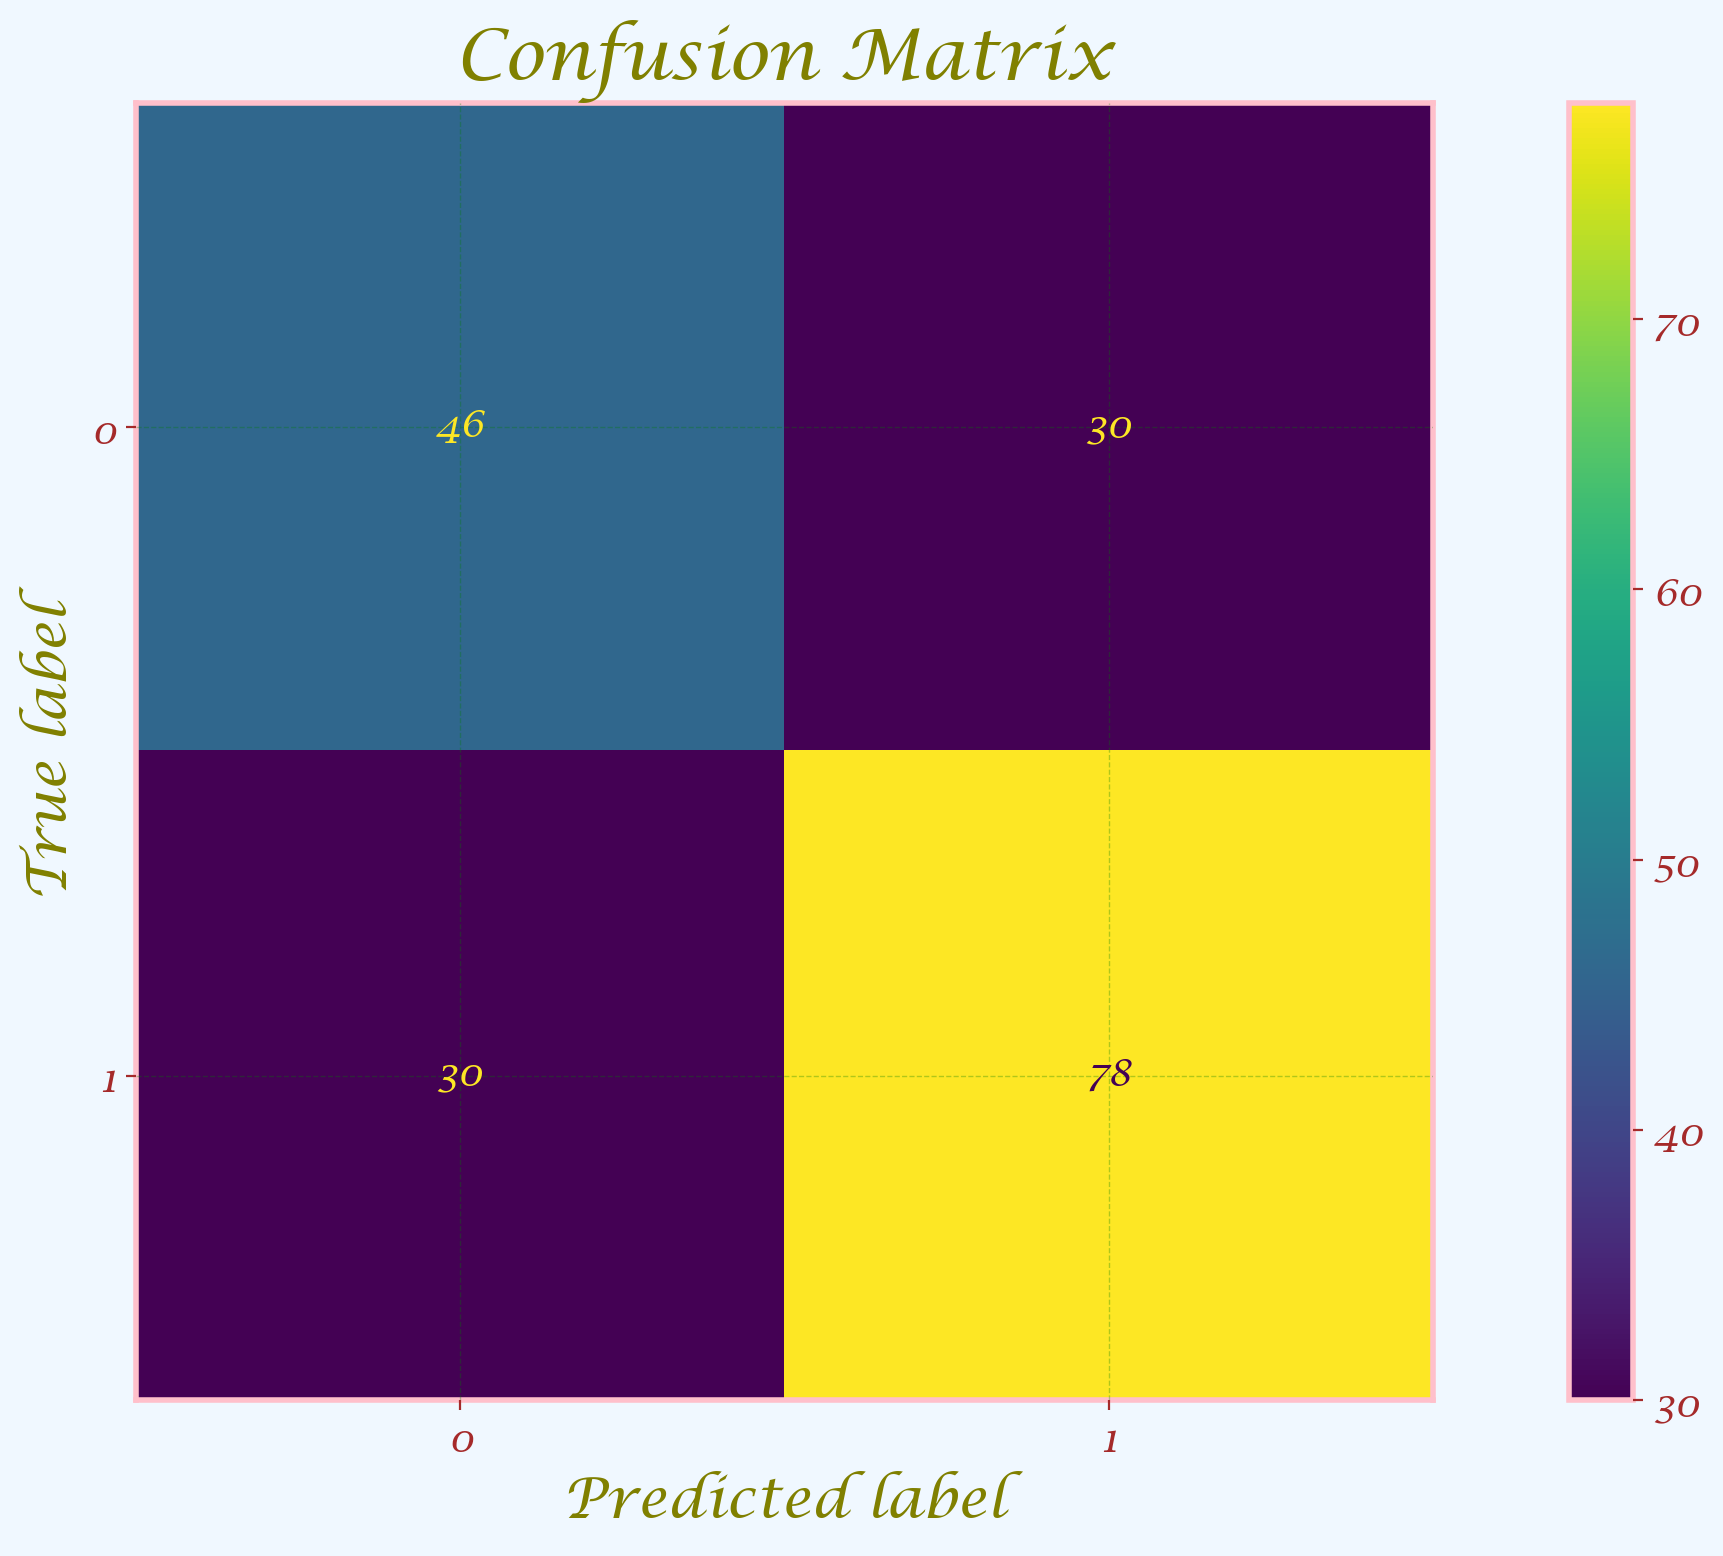

In [59]:
plot_confusion_matrix(knn, X_test_nontree, y_test_nontree);
plt.title('Confusion Matrix');

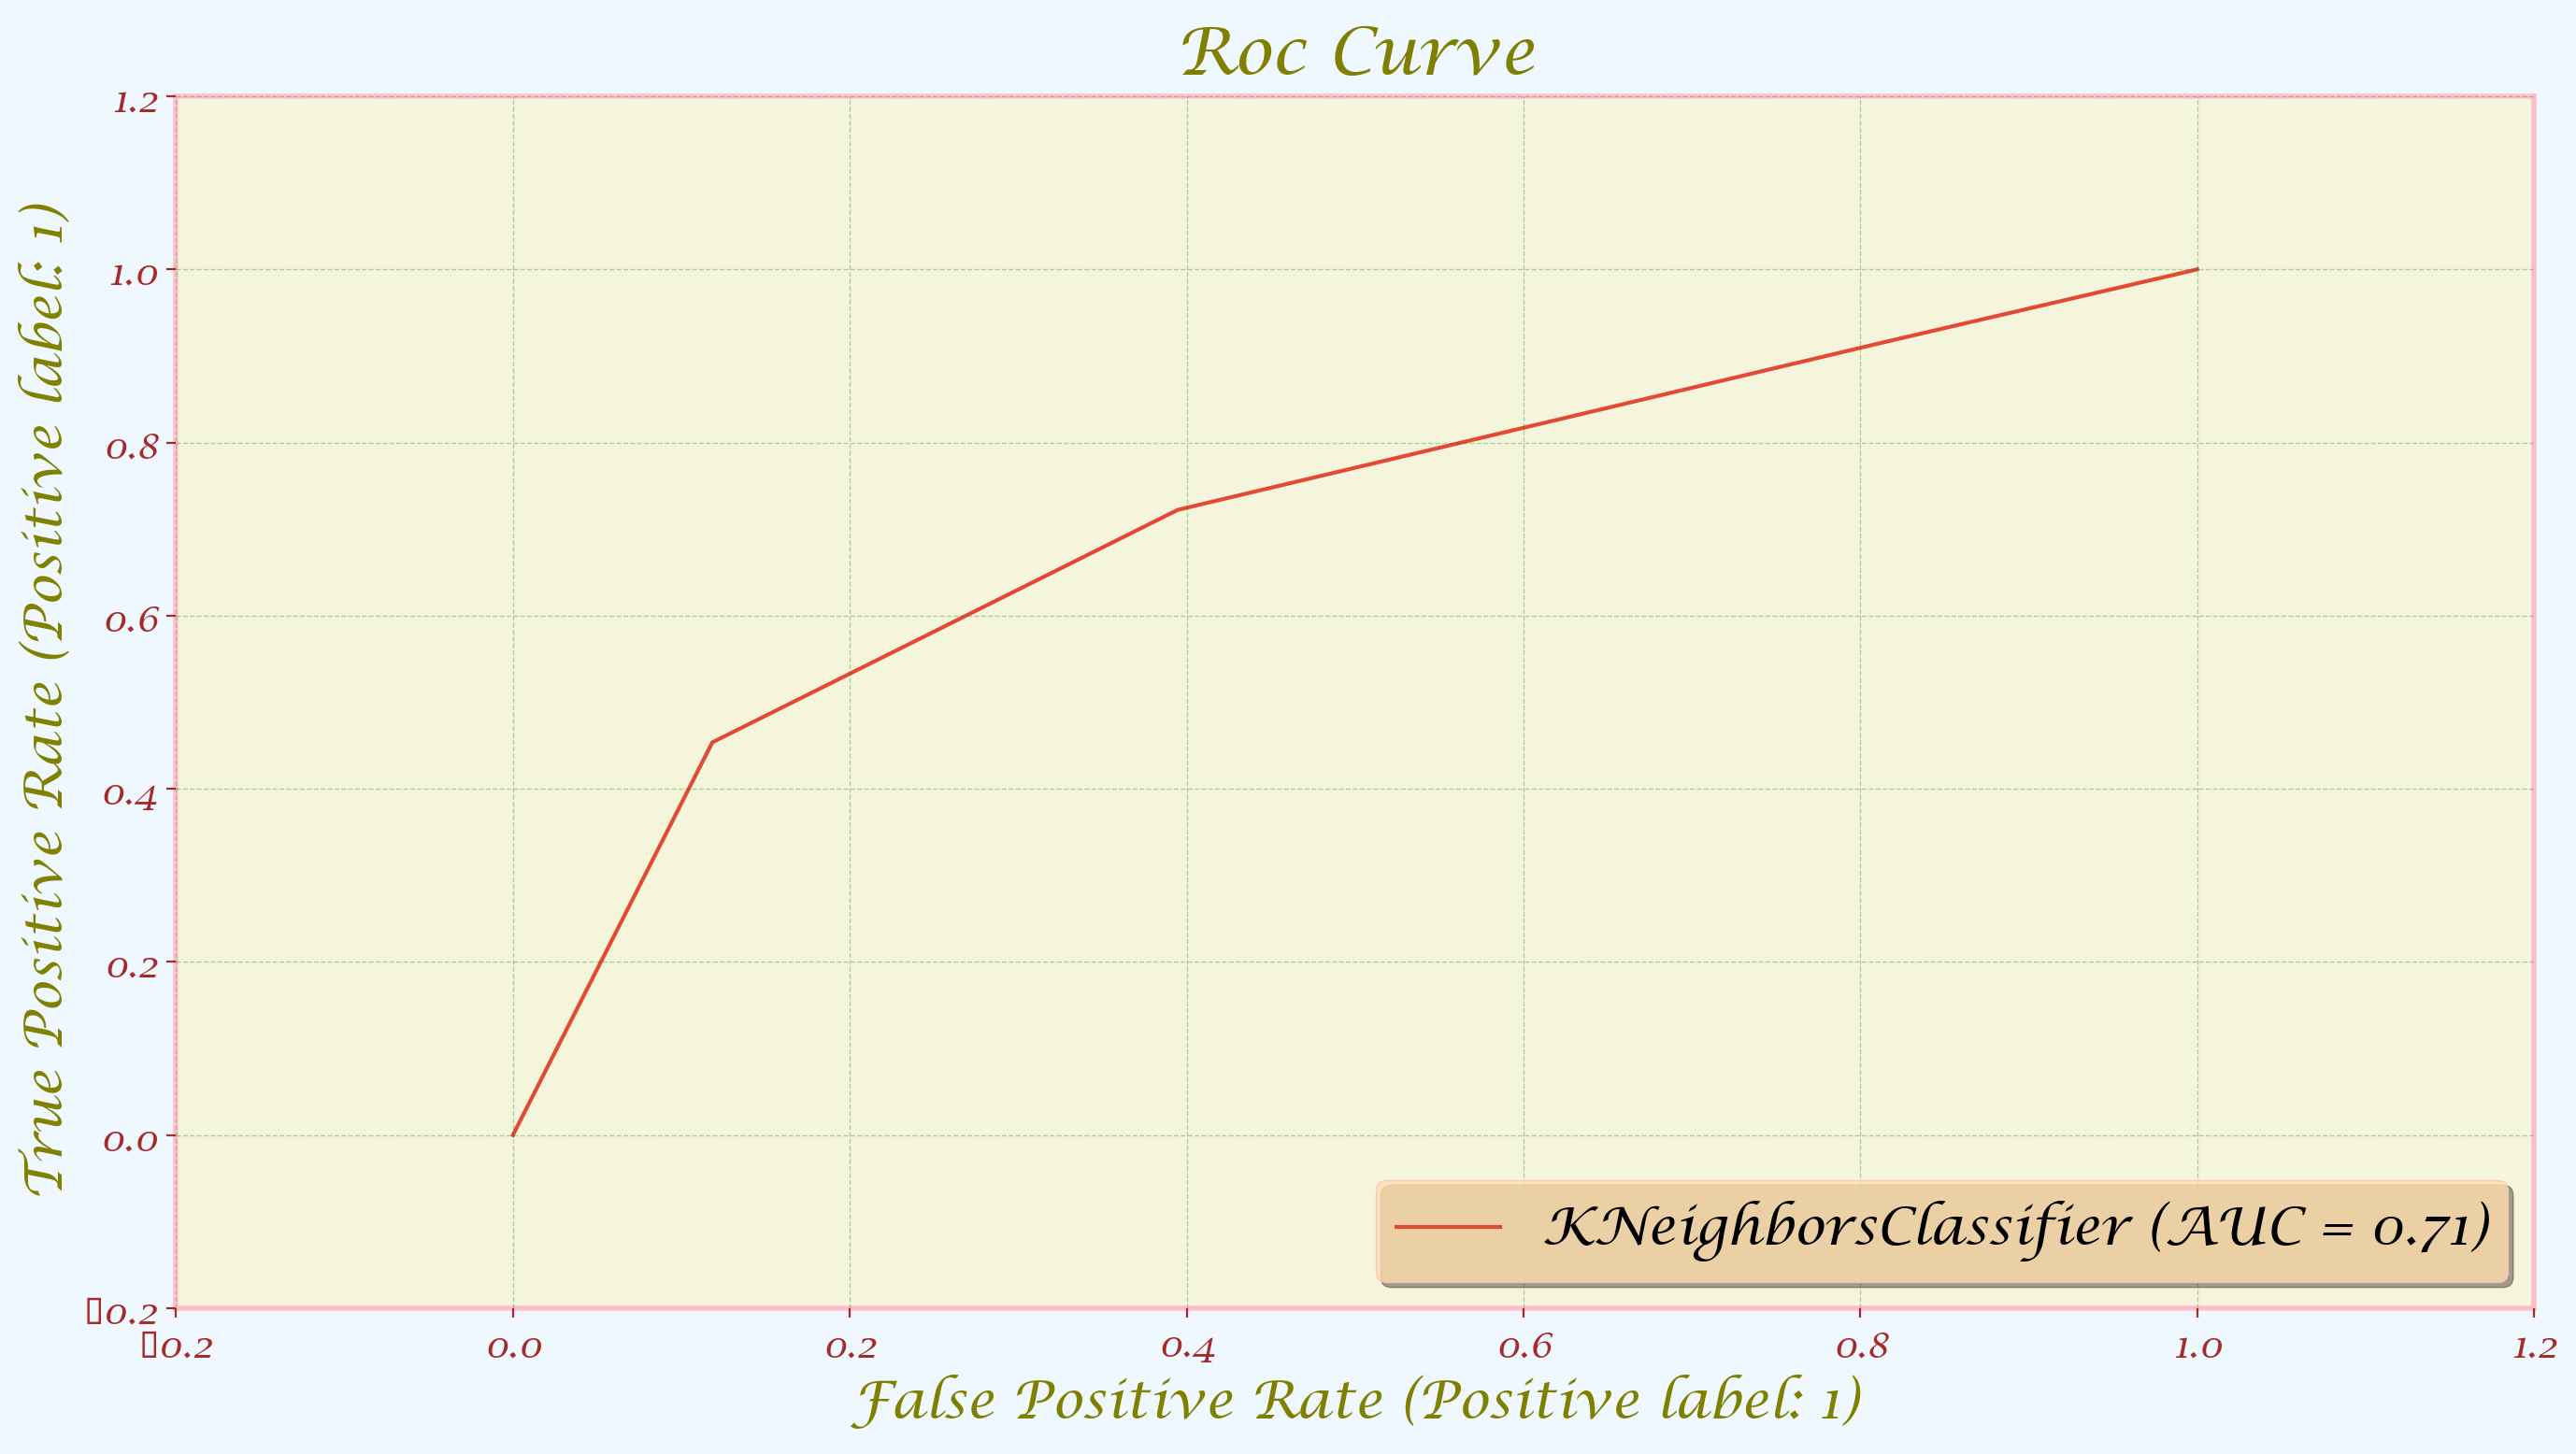

In [60]:
plot_roc_curve(knn, X_test_nontree, y_test_nontree);
plt.title('Roc Curve');

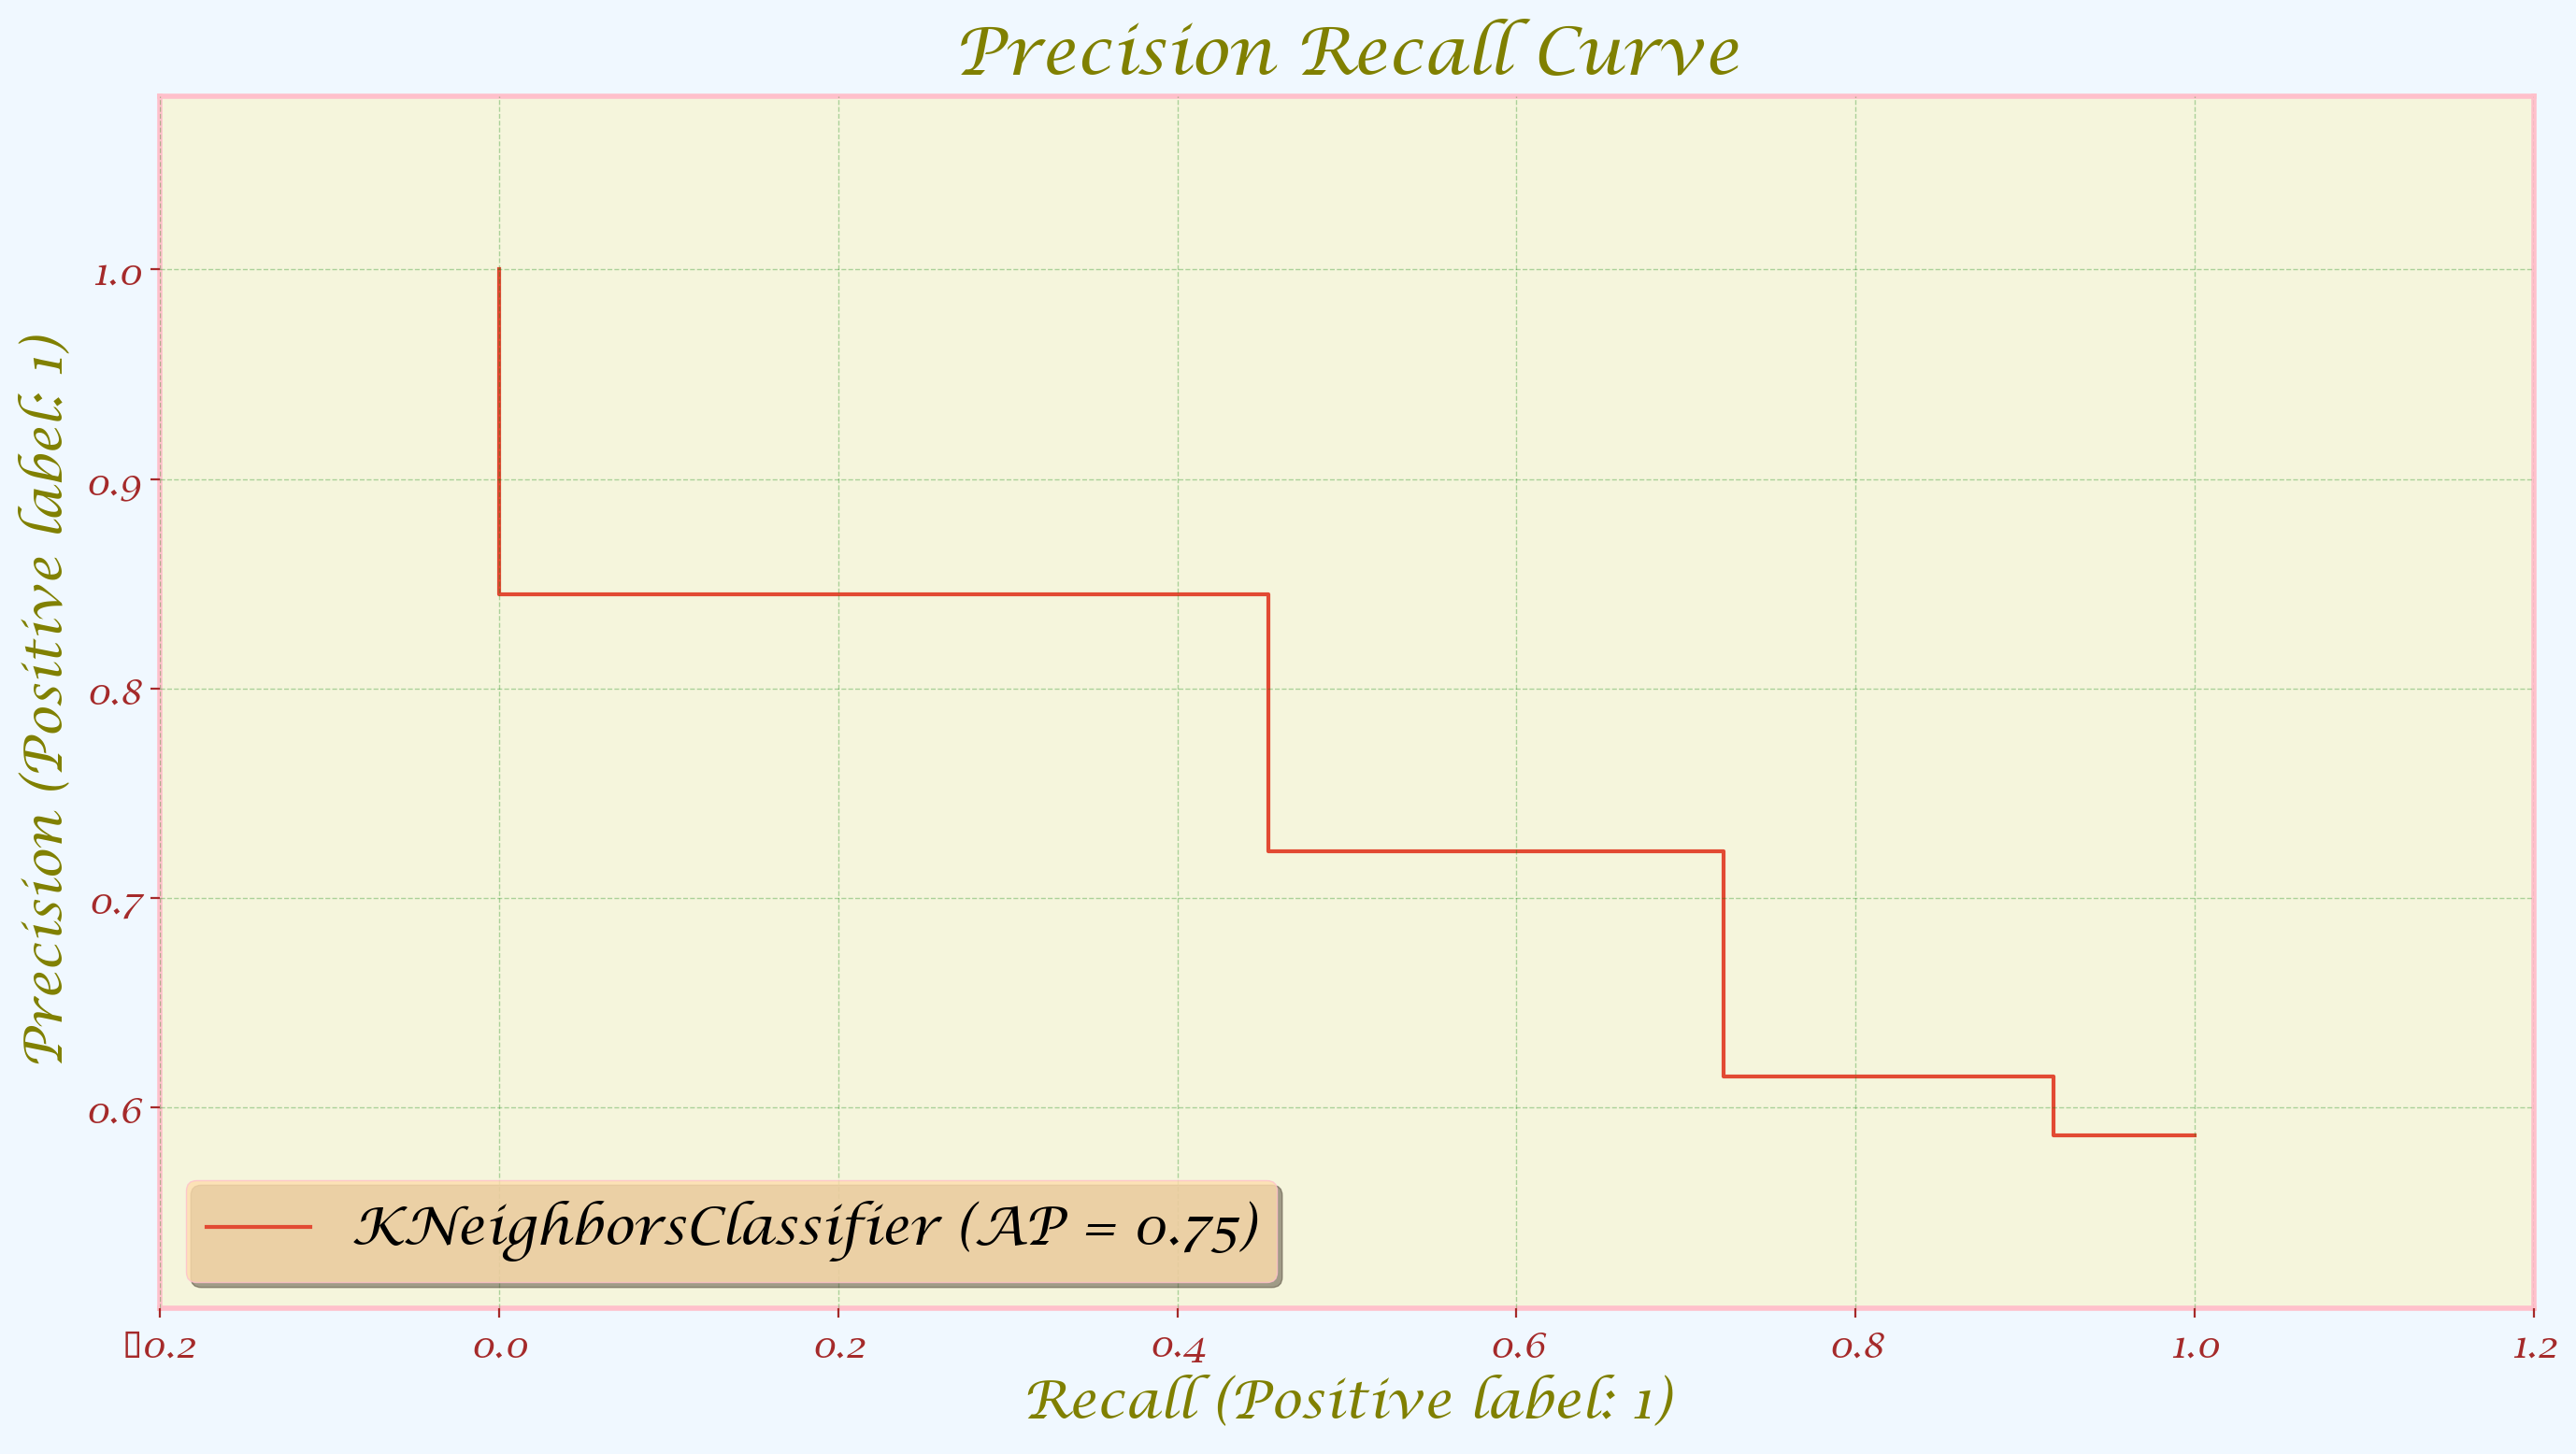

In [61]:
plot_precision_recall_curve(knn, X_test_nontree, y_test_nontree)
plt.title('Precision Recall Curve');

In [62]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X = X_train_nontree, y=y_train_nontree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 65.62 %
Std. Dev: 4.03 %


### With feature scaling

In [63]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(scaled_X_train_nontree, y_train_nontree)
y_pred_knn = knn.predict(scaled_X_test_nontree)

knn_train = round(knn.score(scaled_X_train_nontree, y_train_nontree) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test_nontree) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test_nontree) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_nontree,y_pred_knn))

Training Accuracy     : 90.59 %
Model Accuracy Score  : 86.96 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        76
           1       0.89      0.89      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



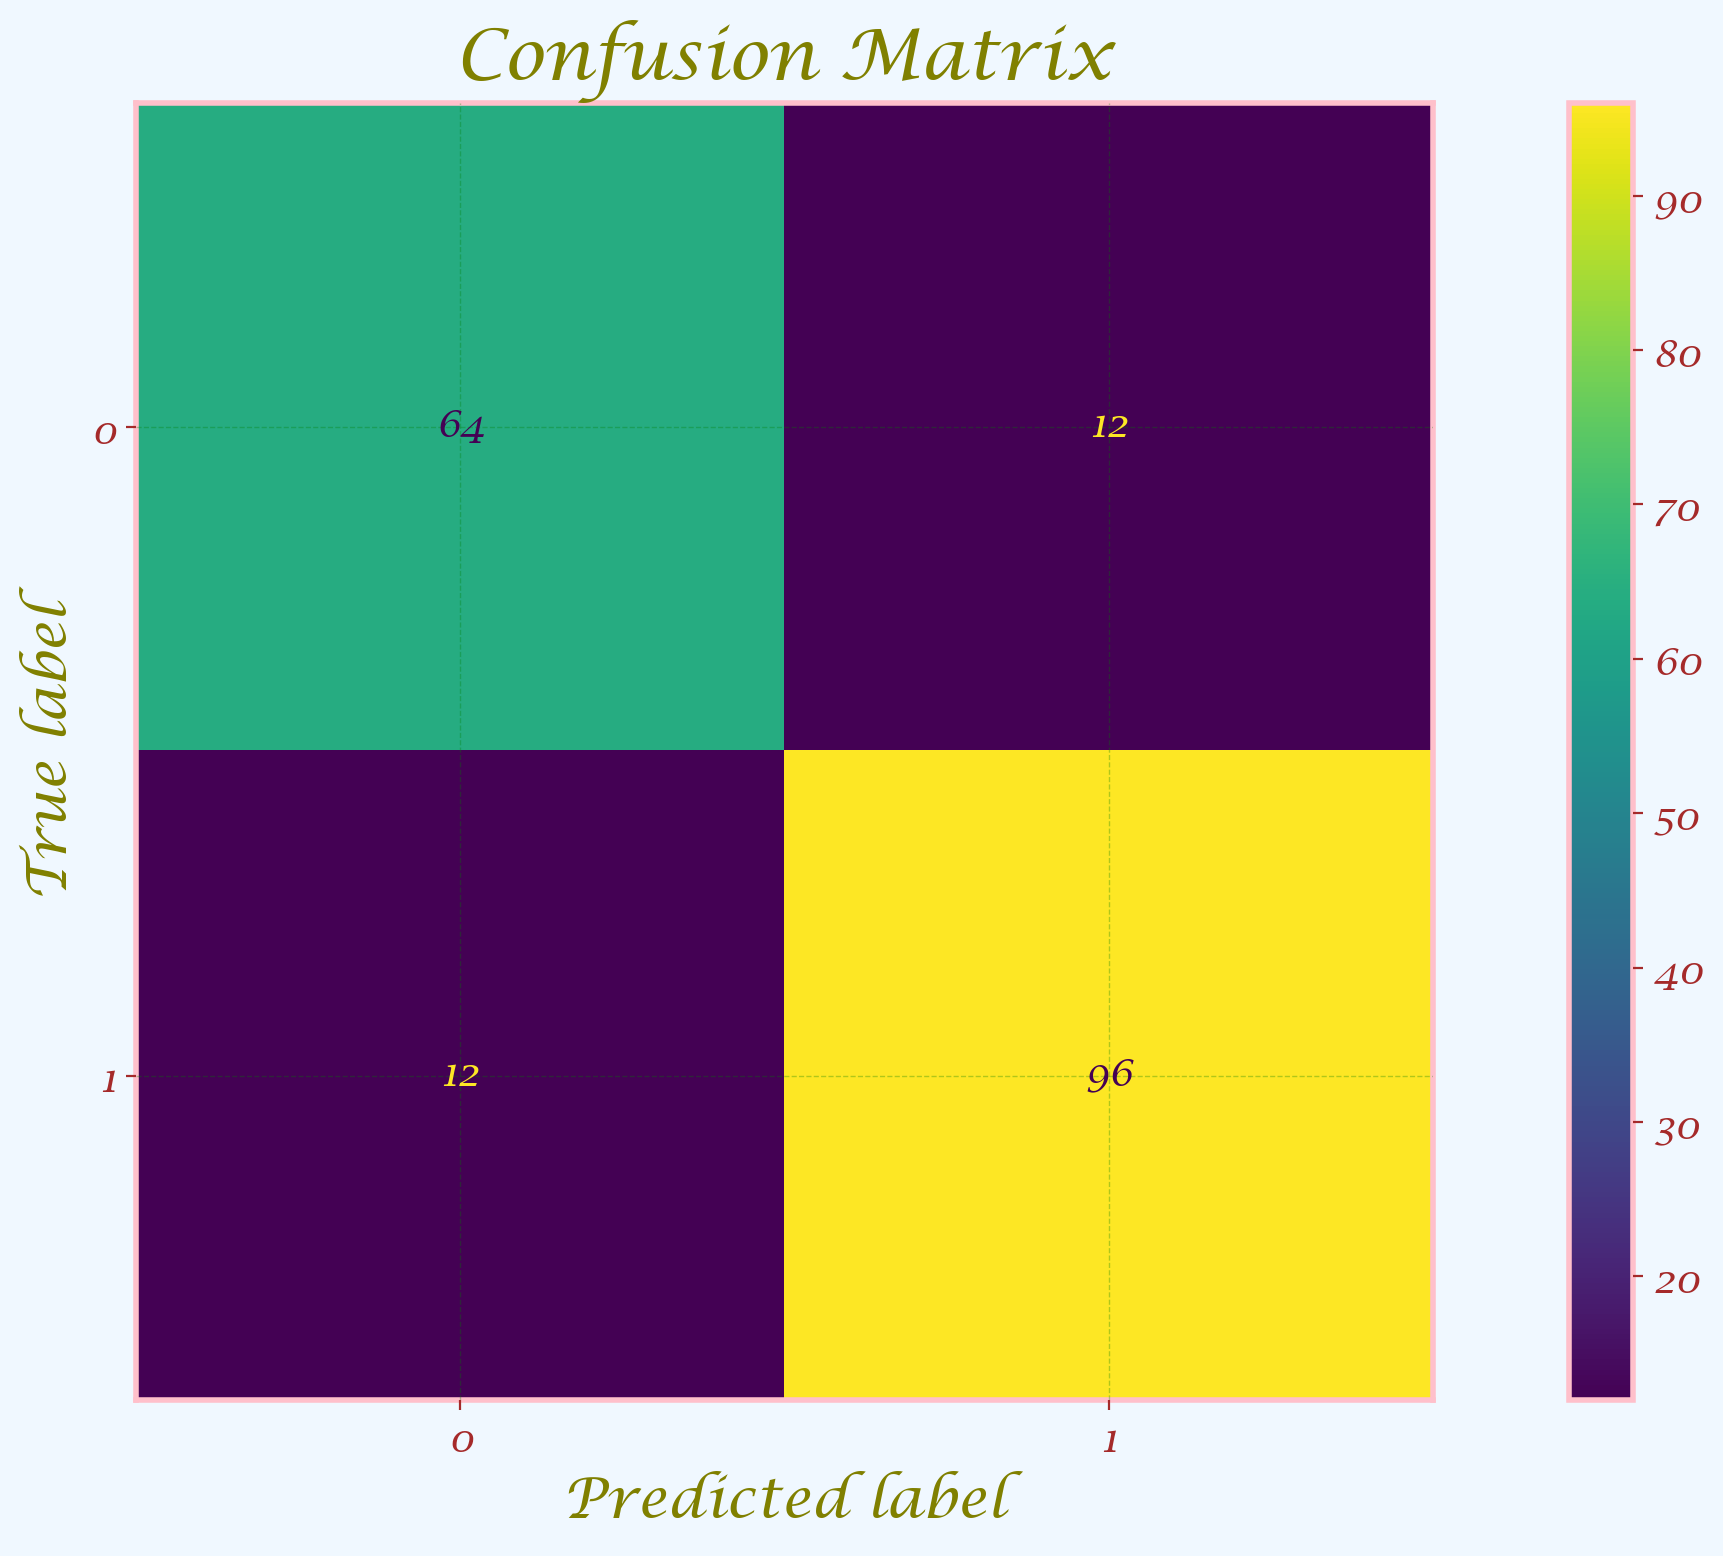

In [64]:
plot_confusion_matrix(knn, scaled_X_test_nontree, y_test_nontree);
plt.title('Confusion Matrix');


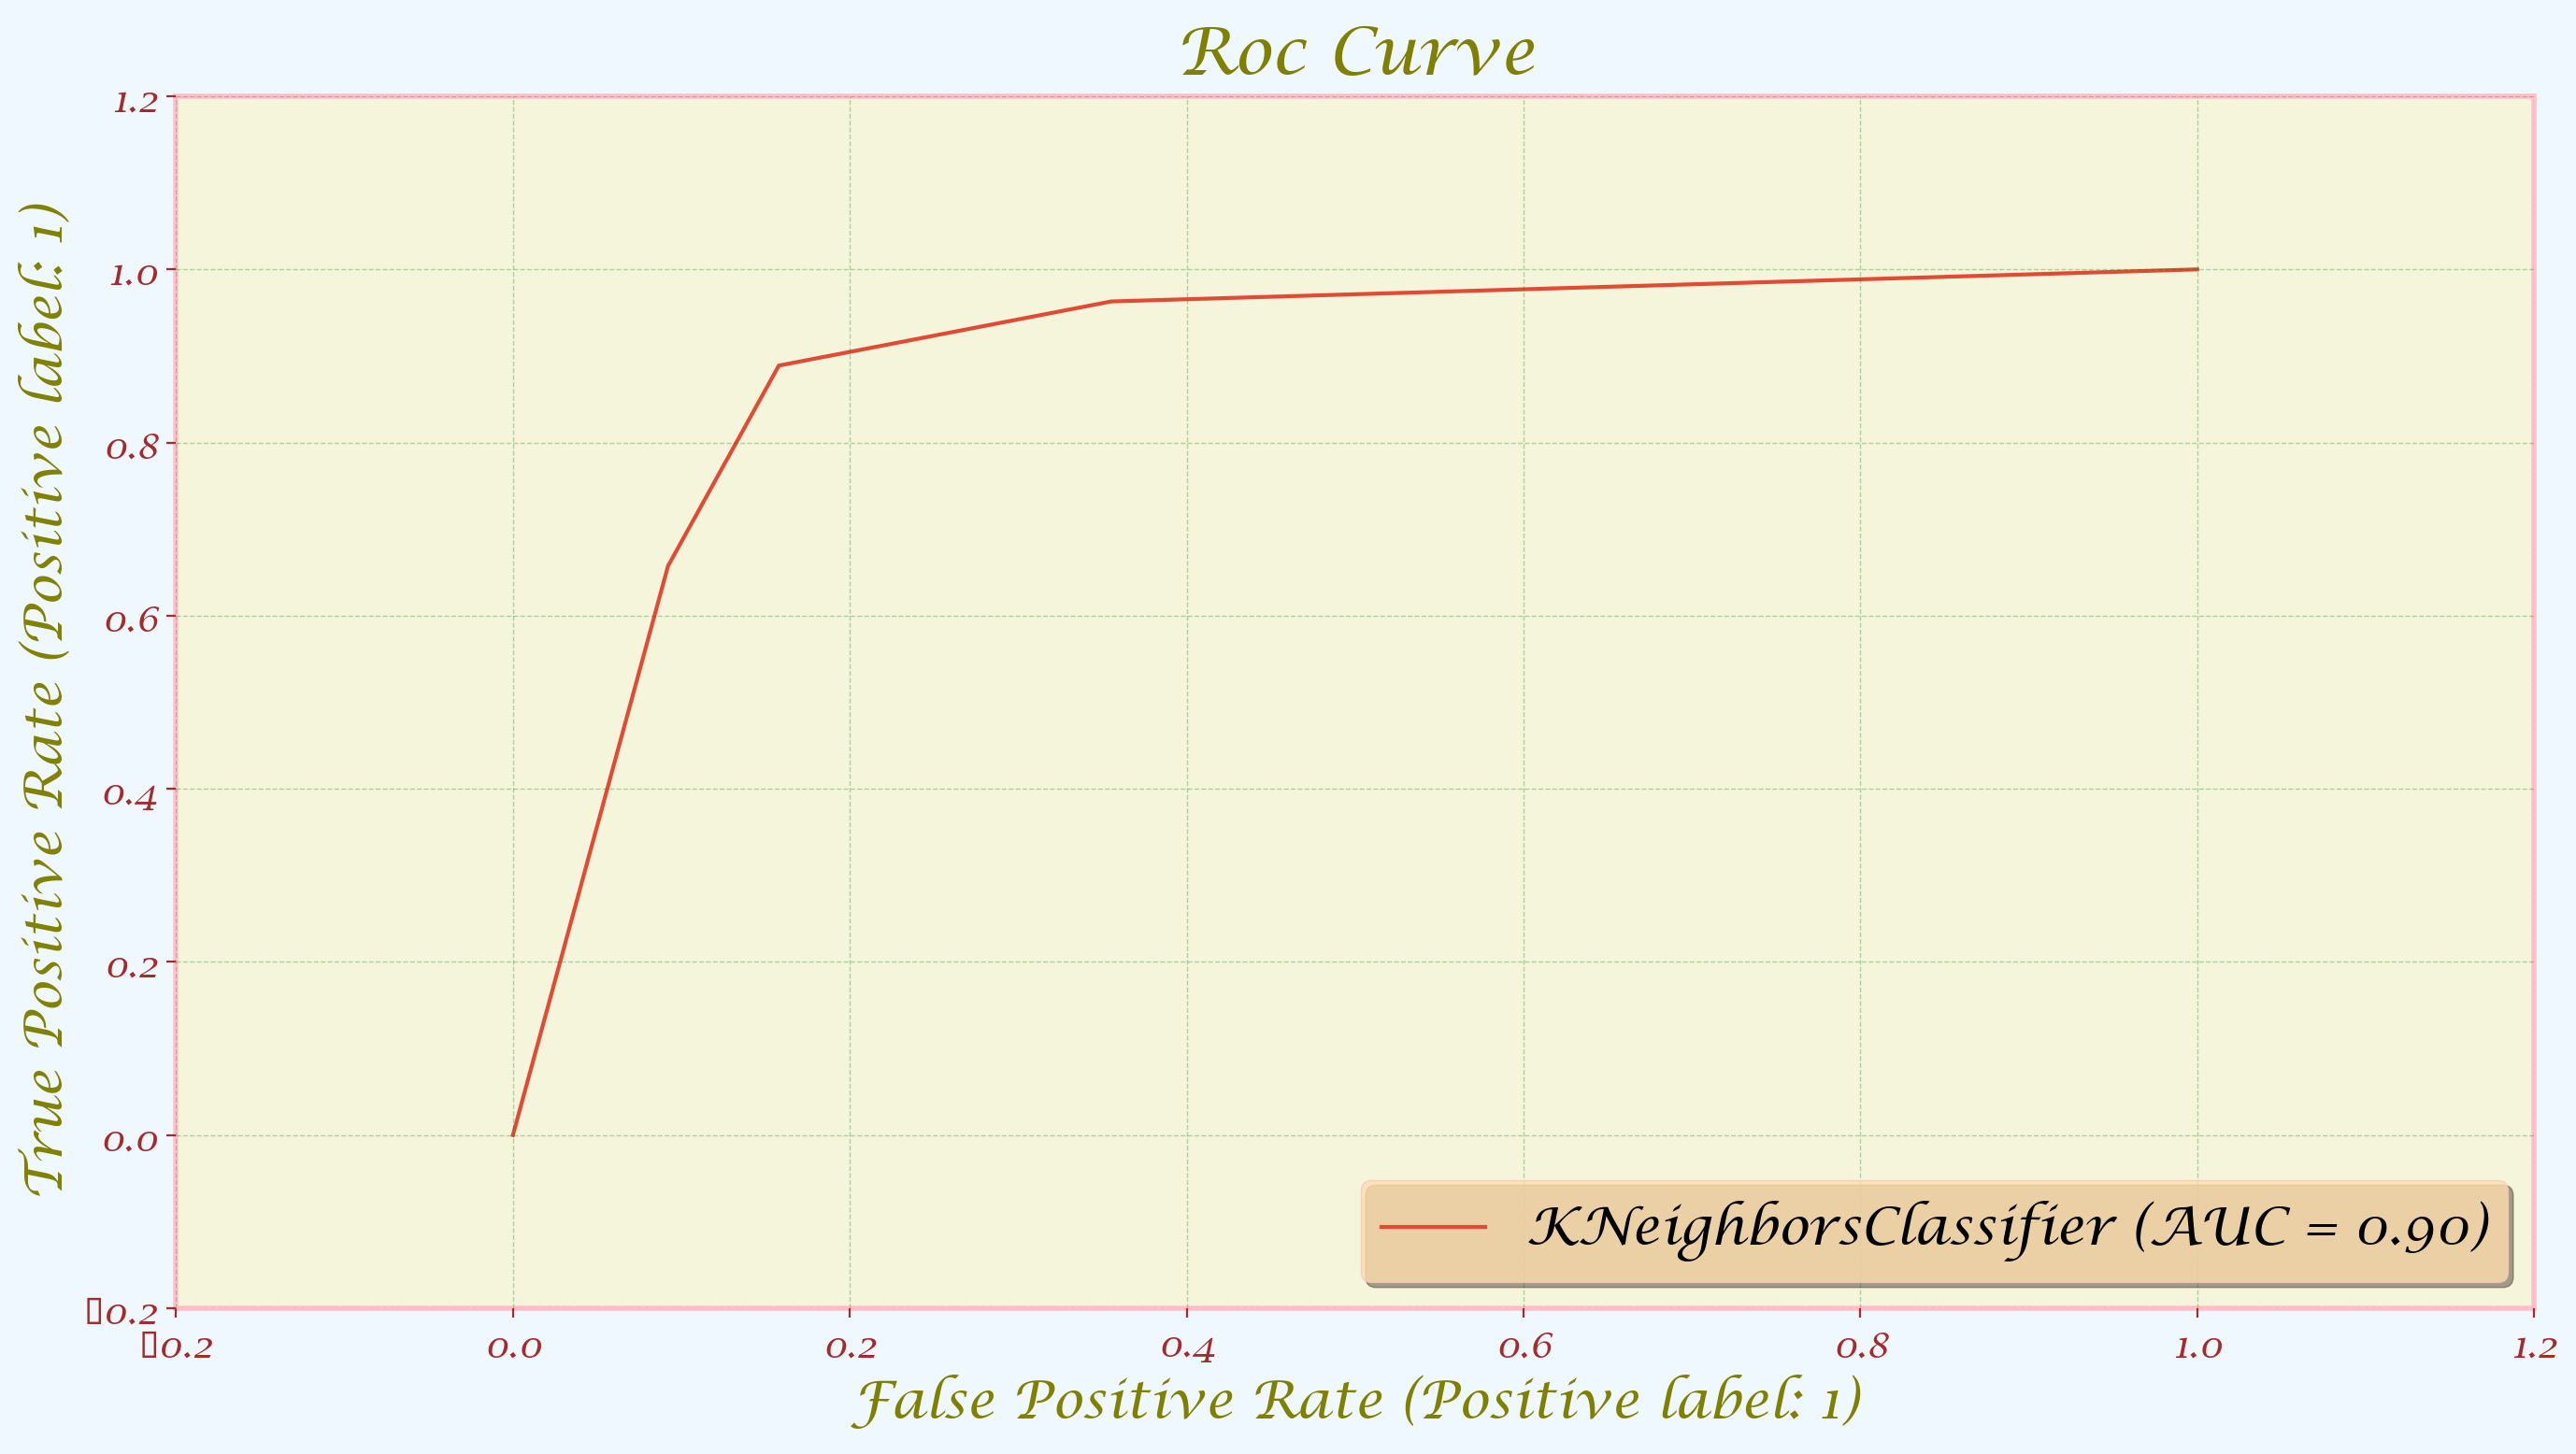

In [65]:
plot_roc_curve(knn, scaled_X_test_nontree, y_test_nontree);
plt.title('Roc Curve');

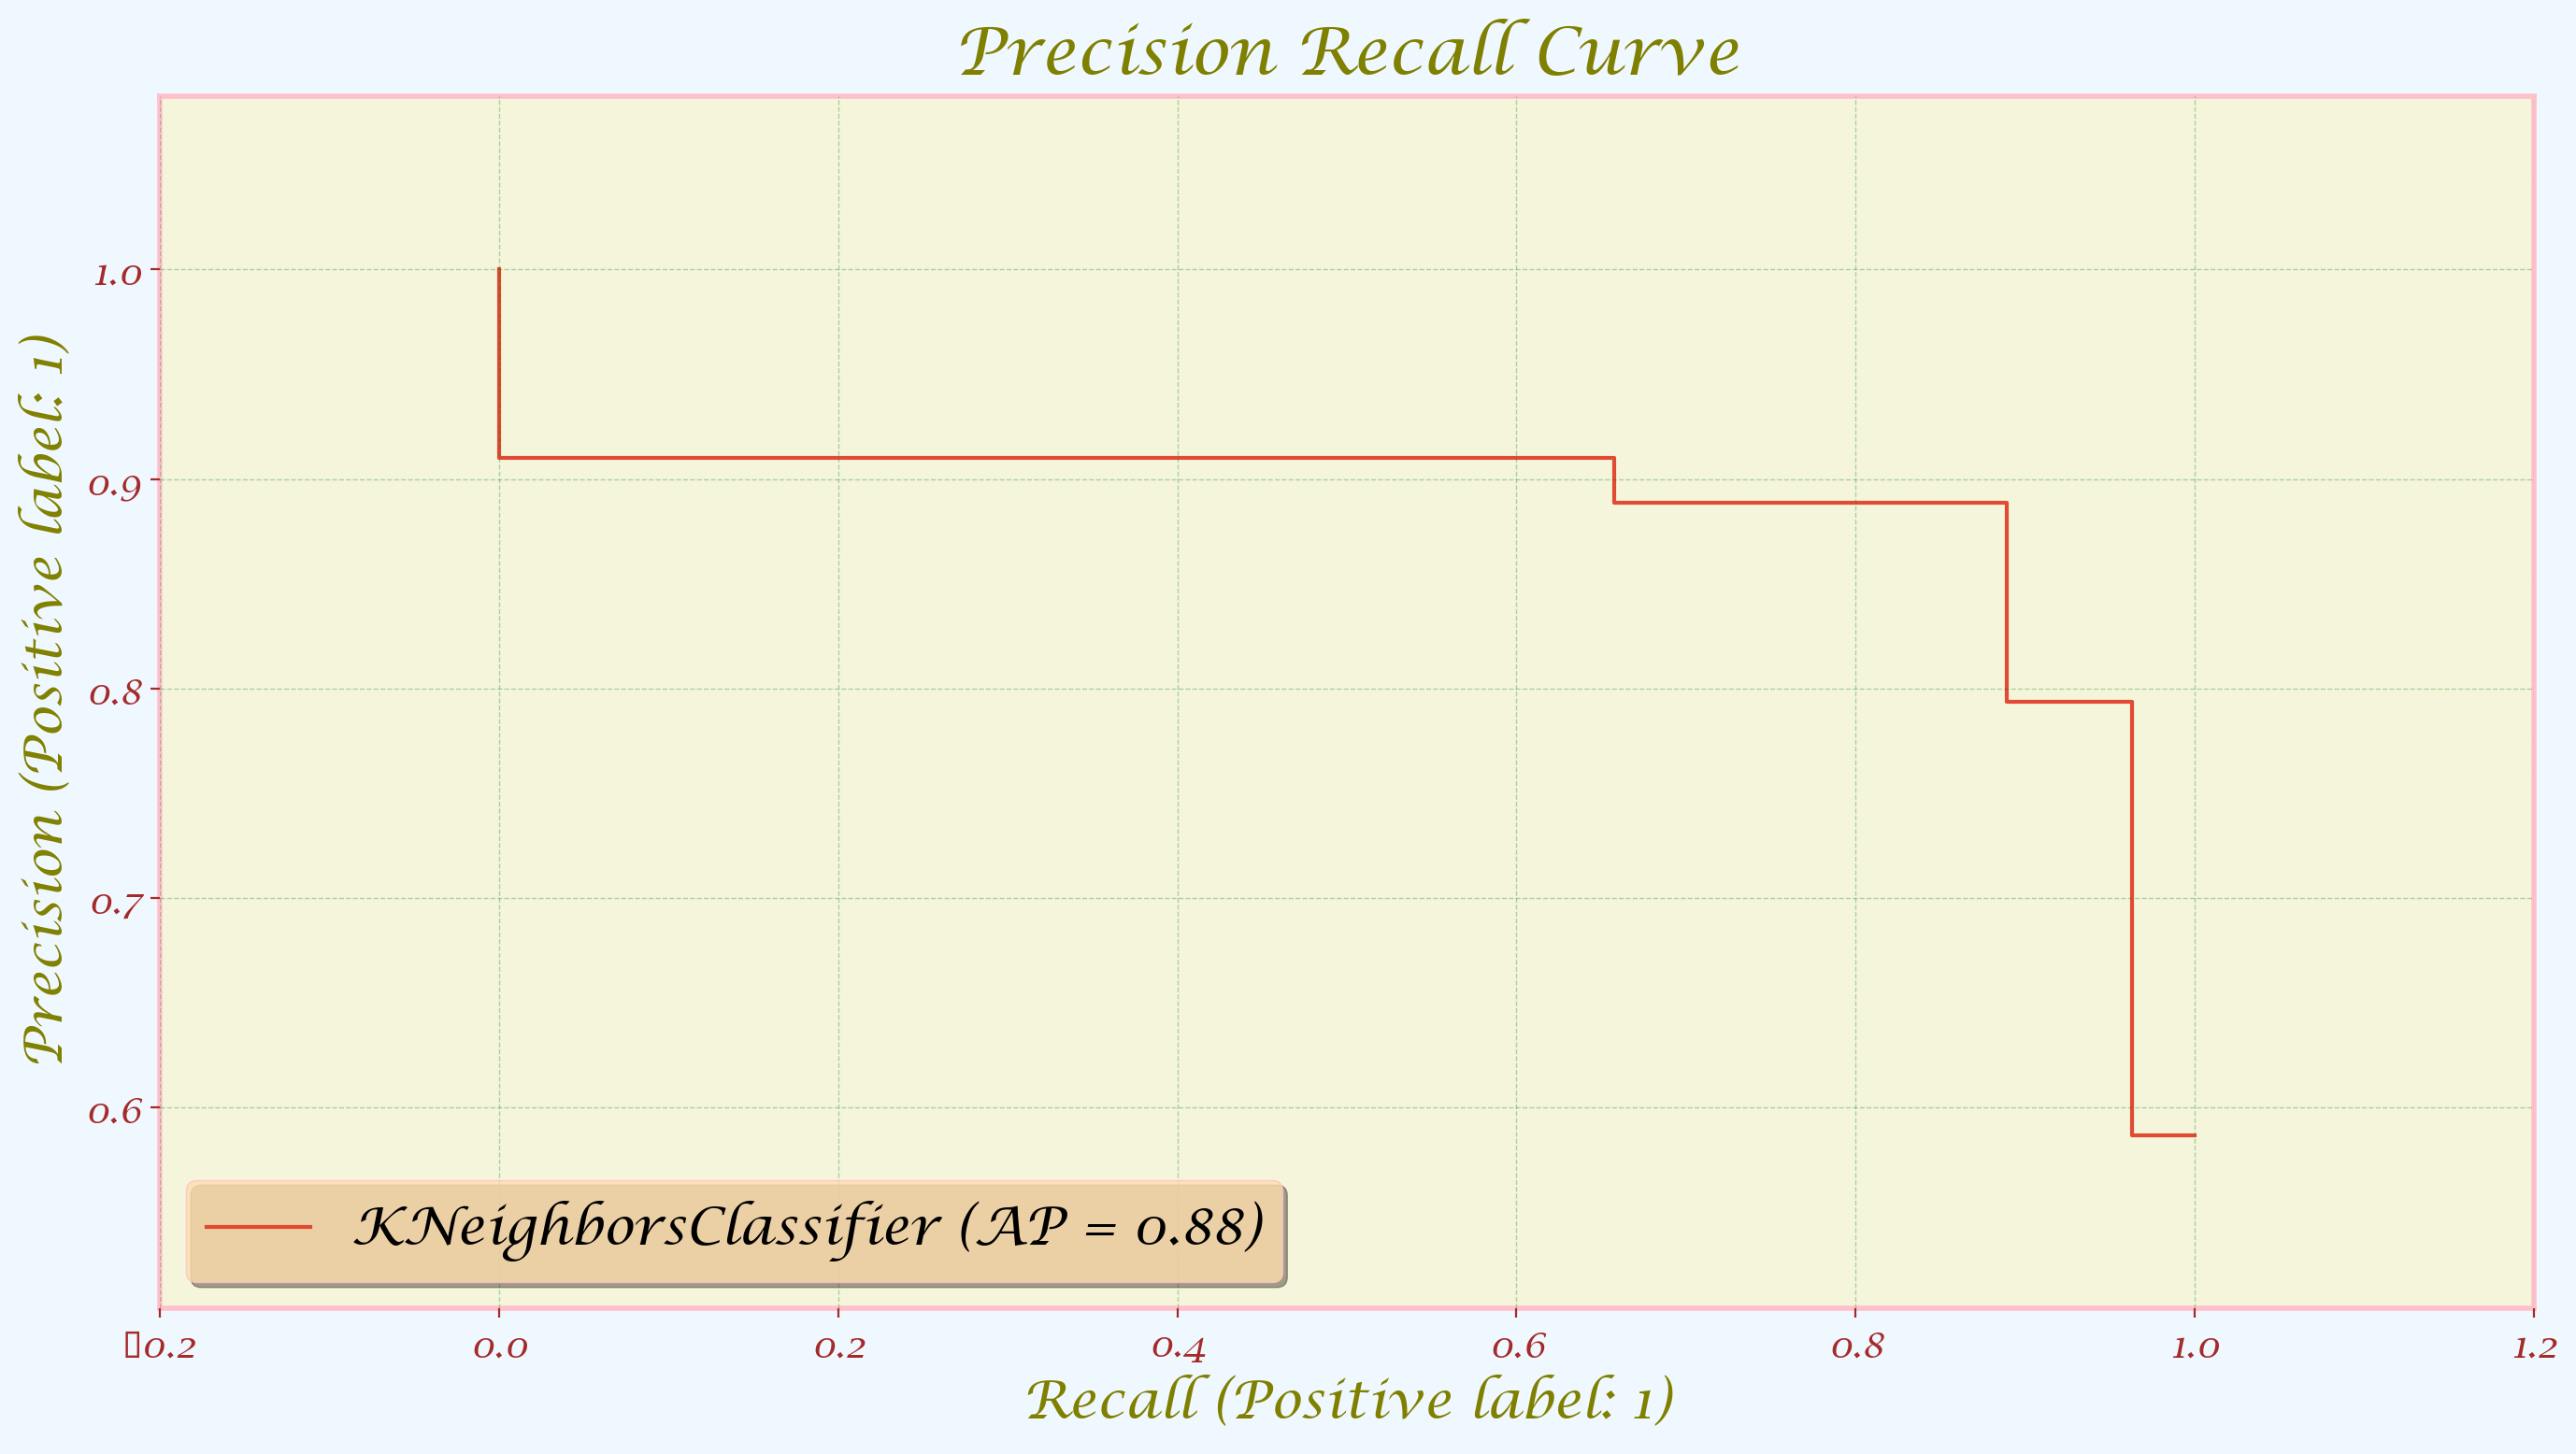

In [66]:
plot_precision_recall_curve(knn, scaled_X_test_nontree, y_test_nontree)
plt.title('Precision Recall Curve');

In [67]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X = scaled_X_train_nontree, y=y_train_nontree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 83.91 %
Std. Dev: 3.78 %


### 2. SVM

#### Without feature scaling

In [68]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_nontree, y_train_nontree)
y_pred_svc = svc.predict(X_test_nontree)

svc_train = round(svc.score(X_train_nontree, y_train_nontree) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test_nontree) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test_nontree) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_nontree,y_pred_svc))

Training Accuracy     : 69.03 %
Model Accuracy Score  : 69.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.55      0.60        76
           1       0.72      0.80      0.75       108

    accuracy                           0.70       184
   macro avg       0.69      0.67      0.68       184
weighted avg       0.69      0.70      0.69       184



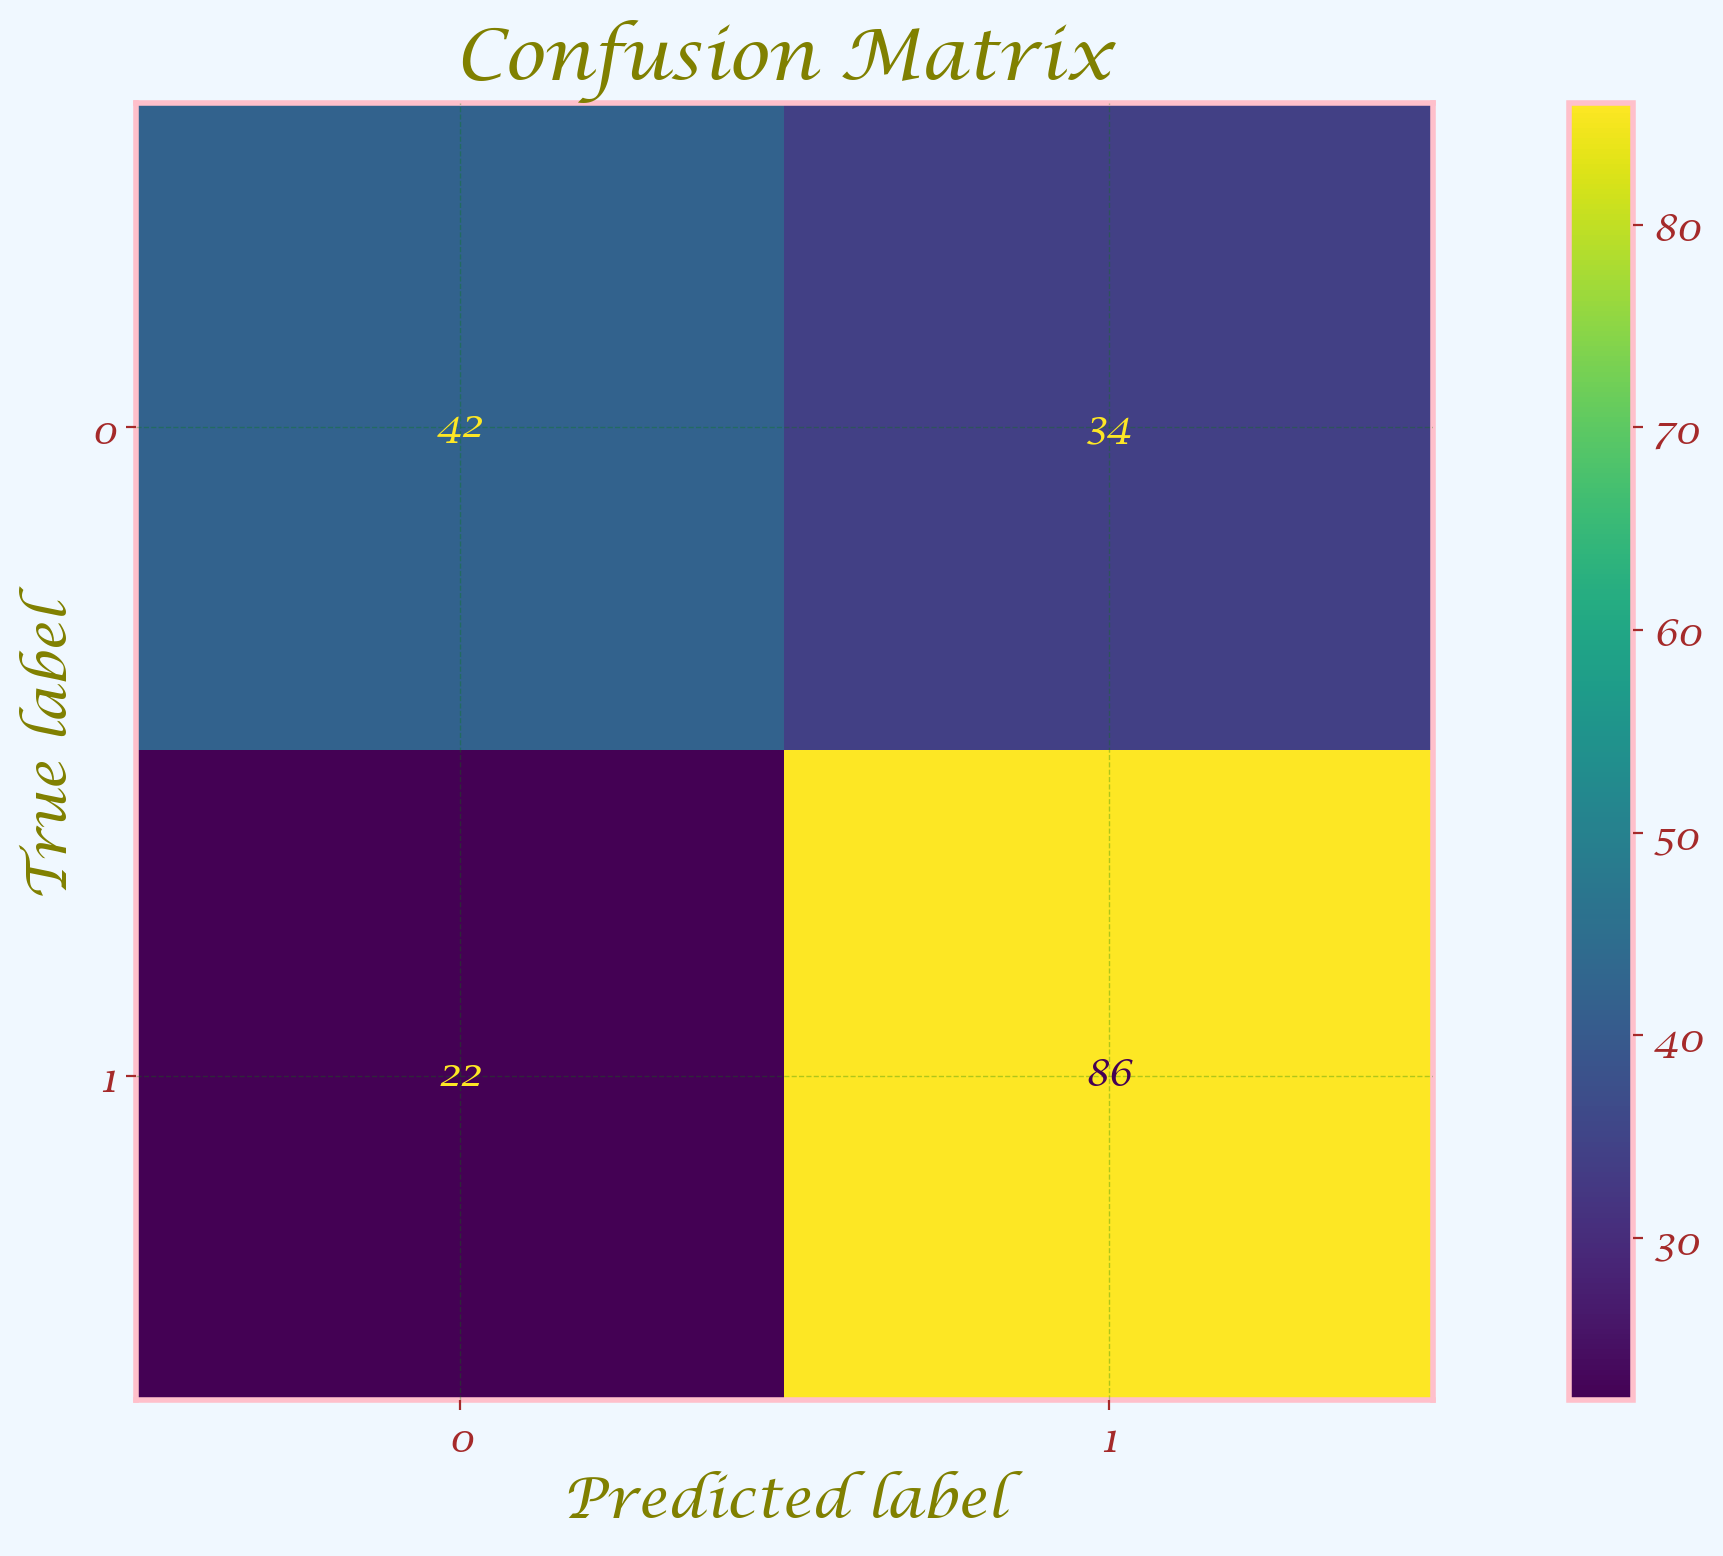

In [69]:
plot_confusion_matrix(svc, X_test_nontree, y_test_nontree);
plt.title('Confusion Matrix');

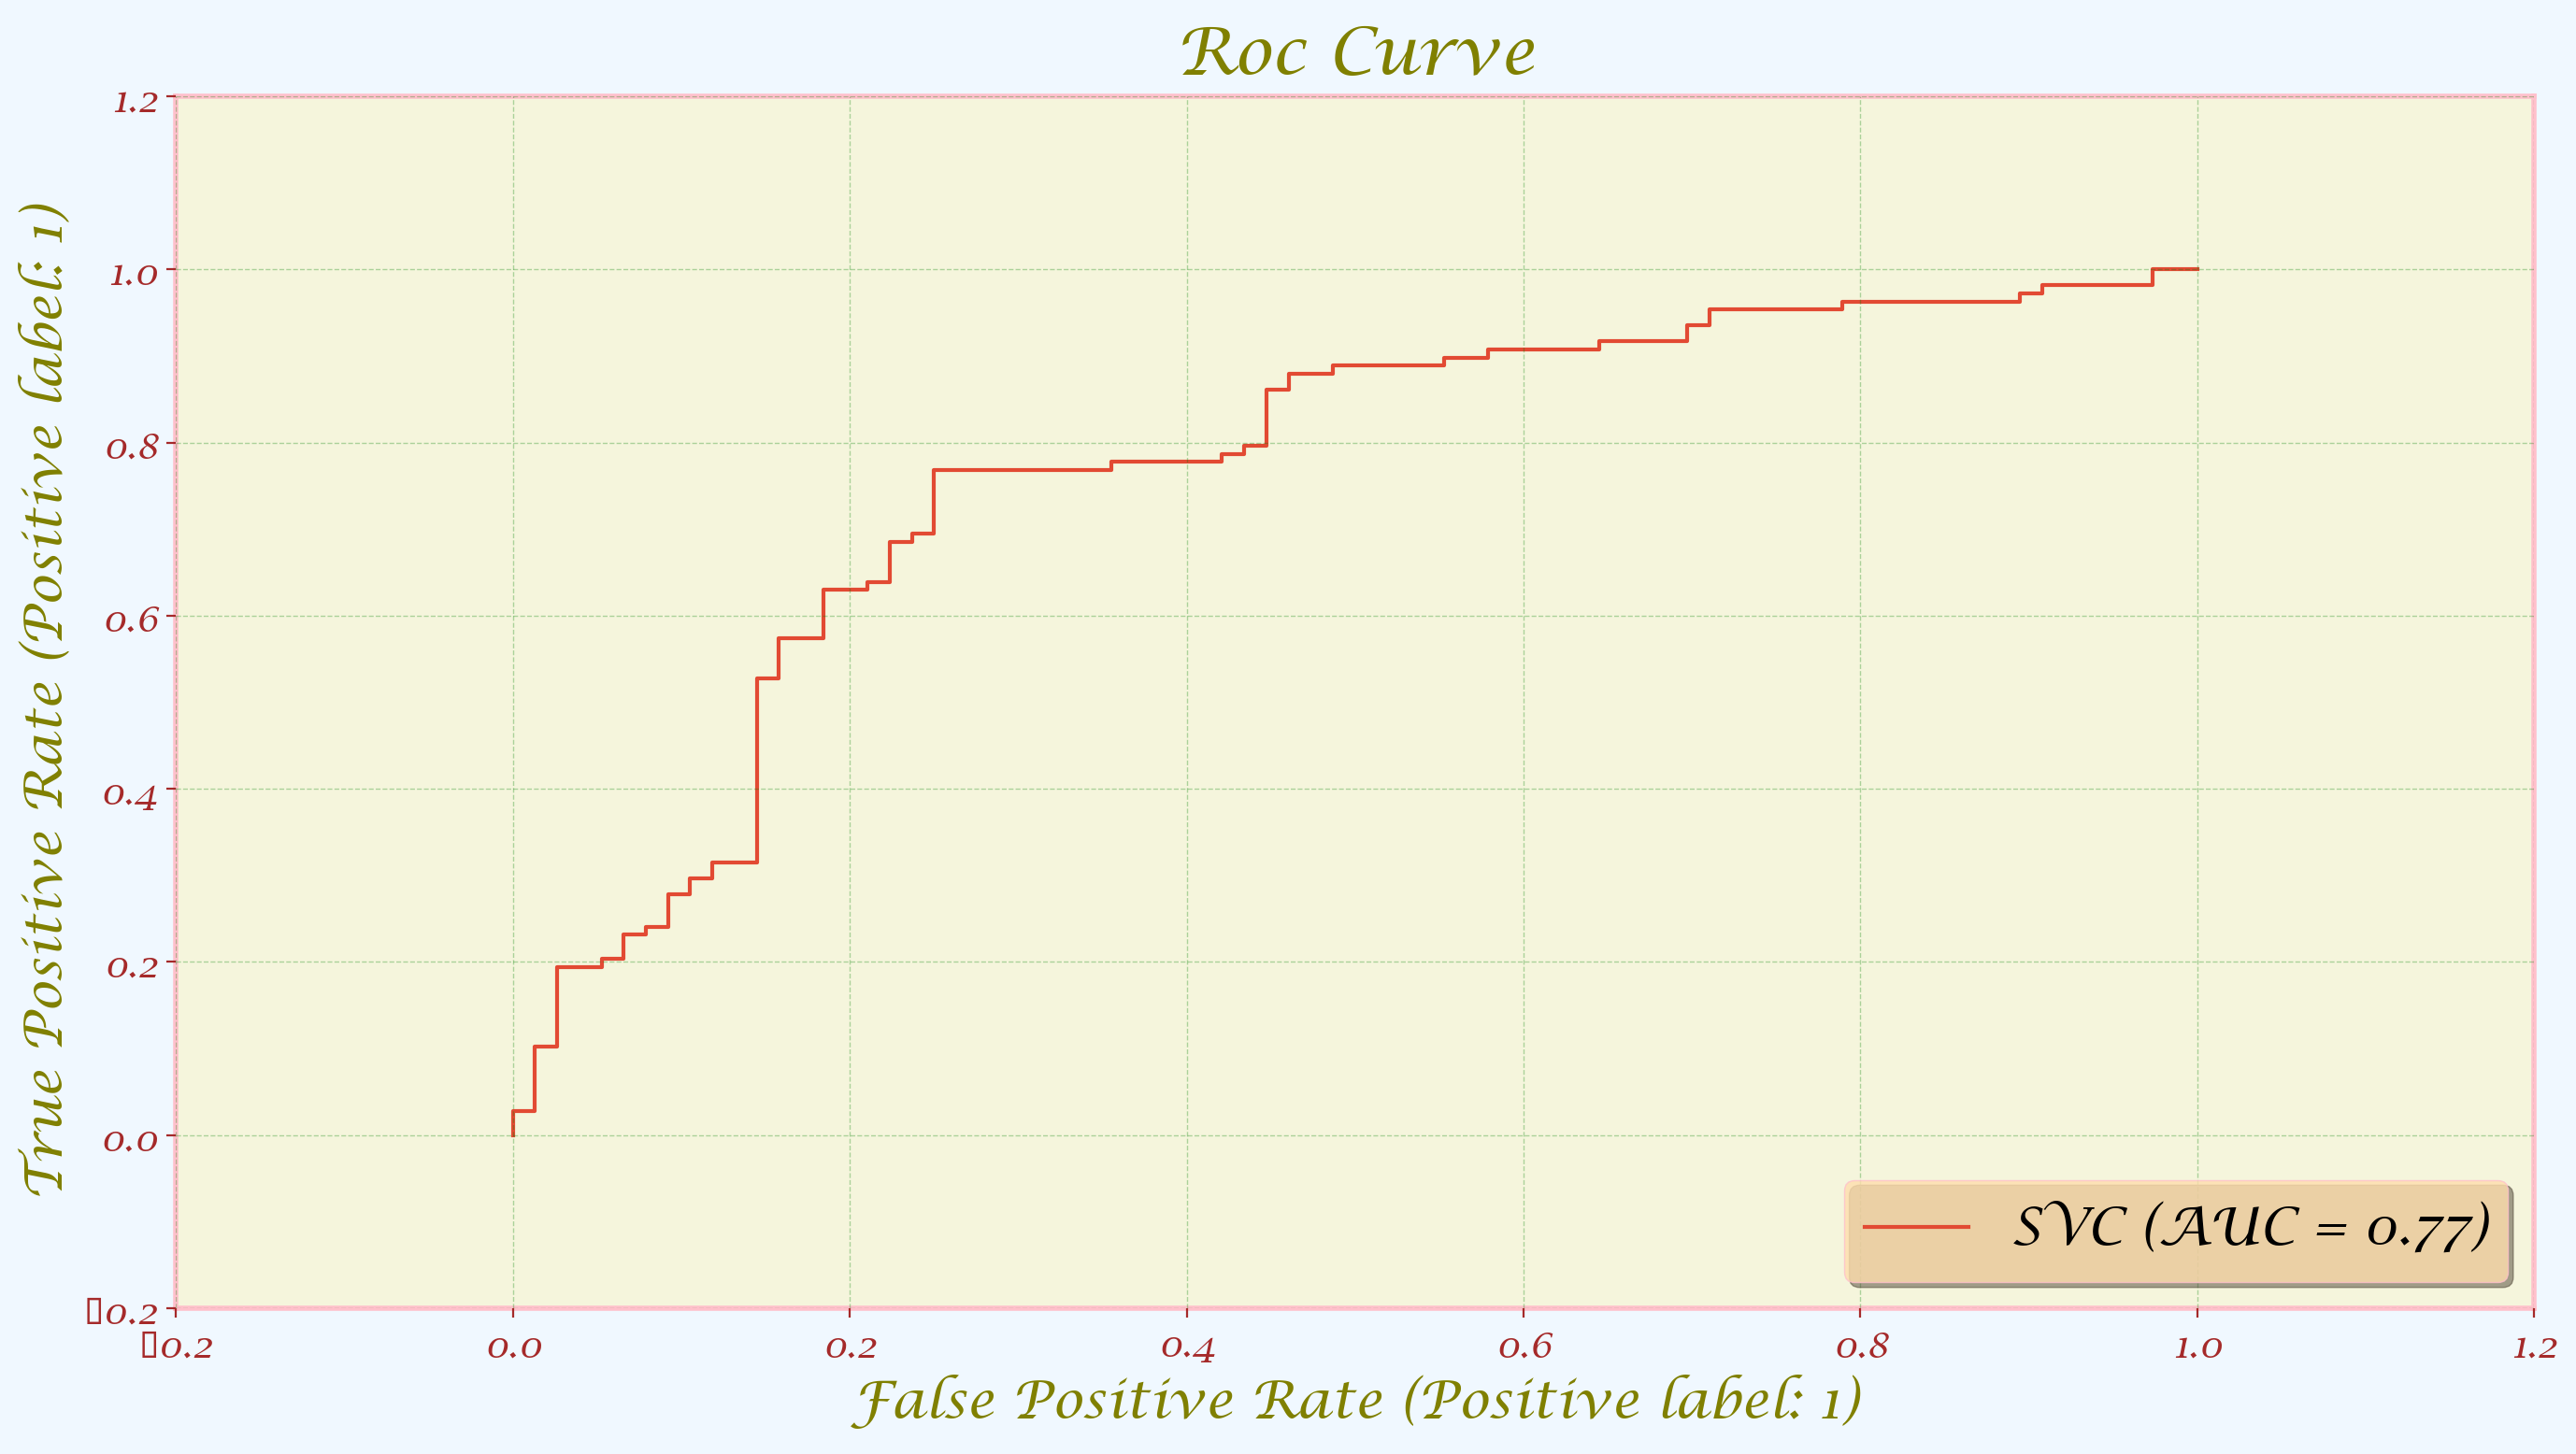

In [70]:
plot_roc_curve(svc, X_test_nontree, y_test_nontree);
plt.title('Roc Curve');

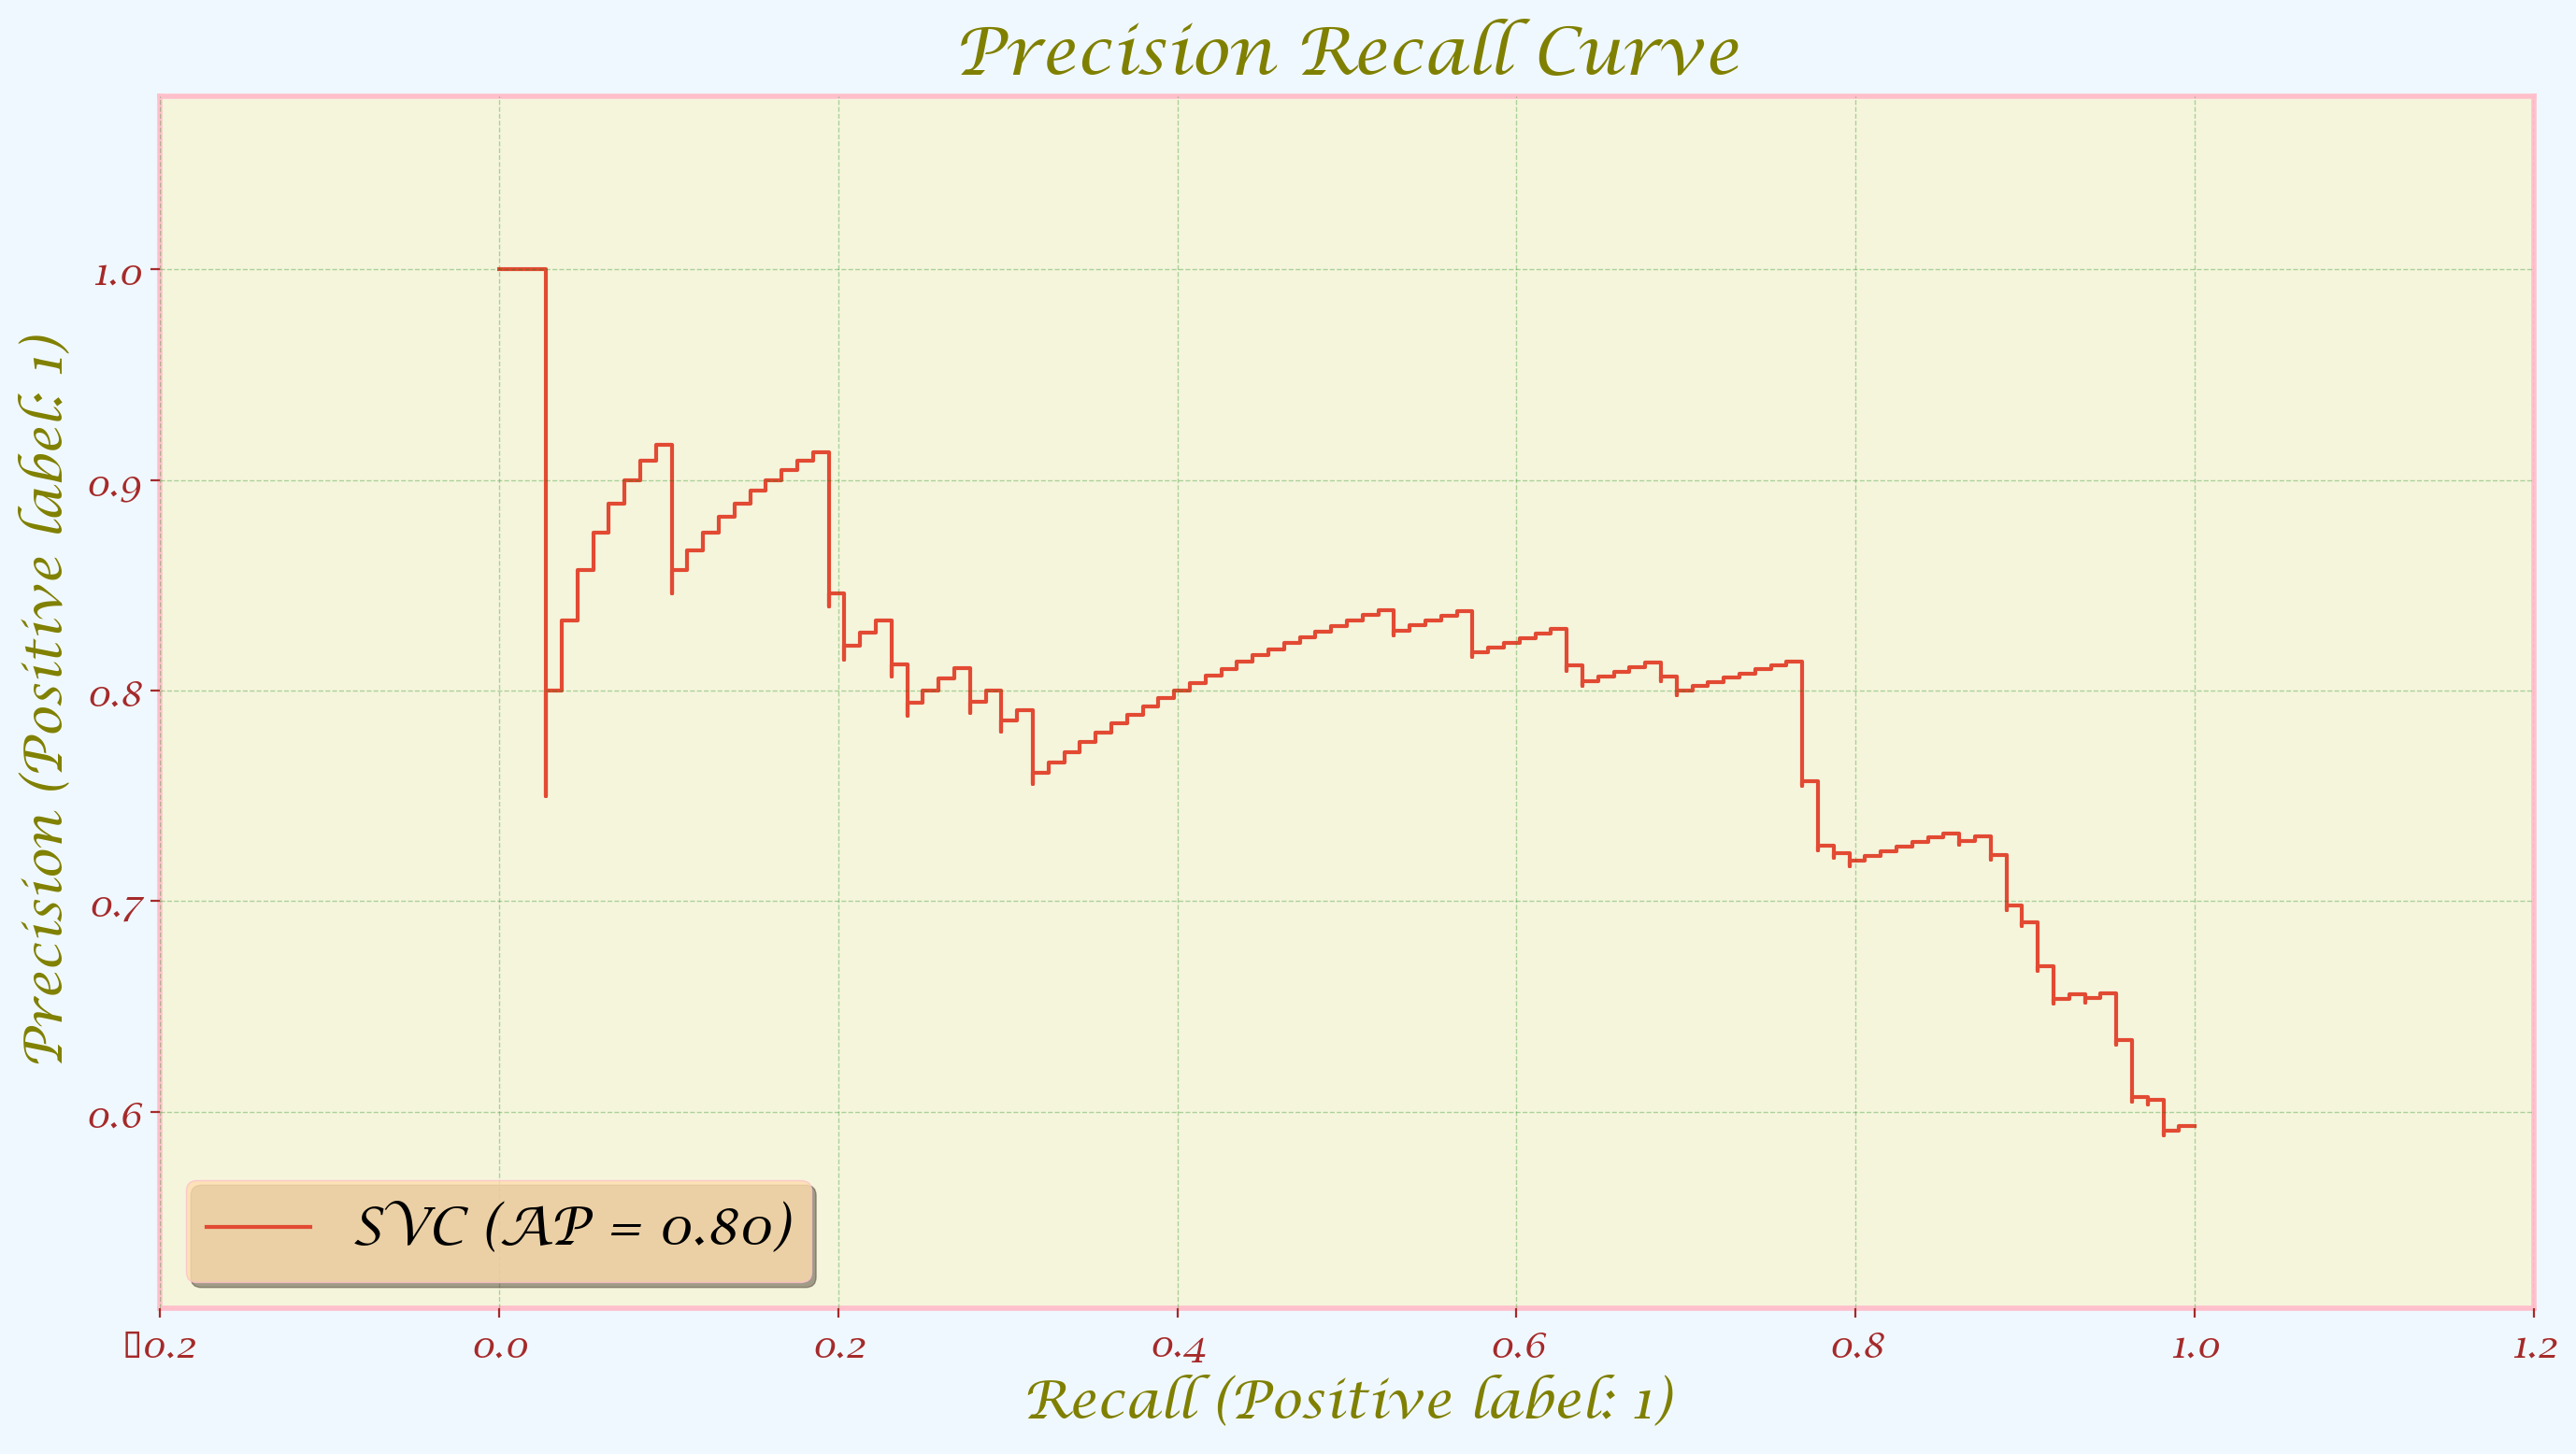

In [71]:
plot_precision_recall_curve(svc,  X_test_nontree, y_test_nontree)
plt.title('Precision Recall Curve');

In [72]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train_nontree, y=y_train_nontree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 68.76 %
Std. Dev: 3.54 %


### With feature scaling

In [73]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(scaled_X_train_nontree, y_train_nontree)
y_pred_svc = svc.predict(scaled_X_test_nontree)

svc_train = round(svc.score(scaled_X_train_nontree, y_train_nontree) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test_nontree) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test_nontree) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_nontree,y_pred_svc))

Training Accuracy     : 90.31 %
Model Accuracy Score  : 88.04 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        76
           1       0.88      0.93      0.90       108

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



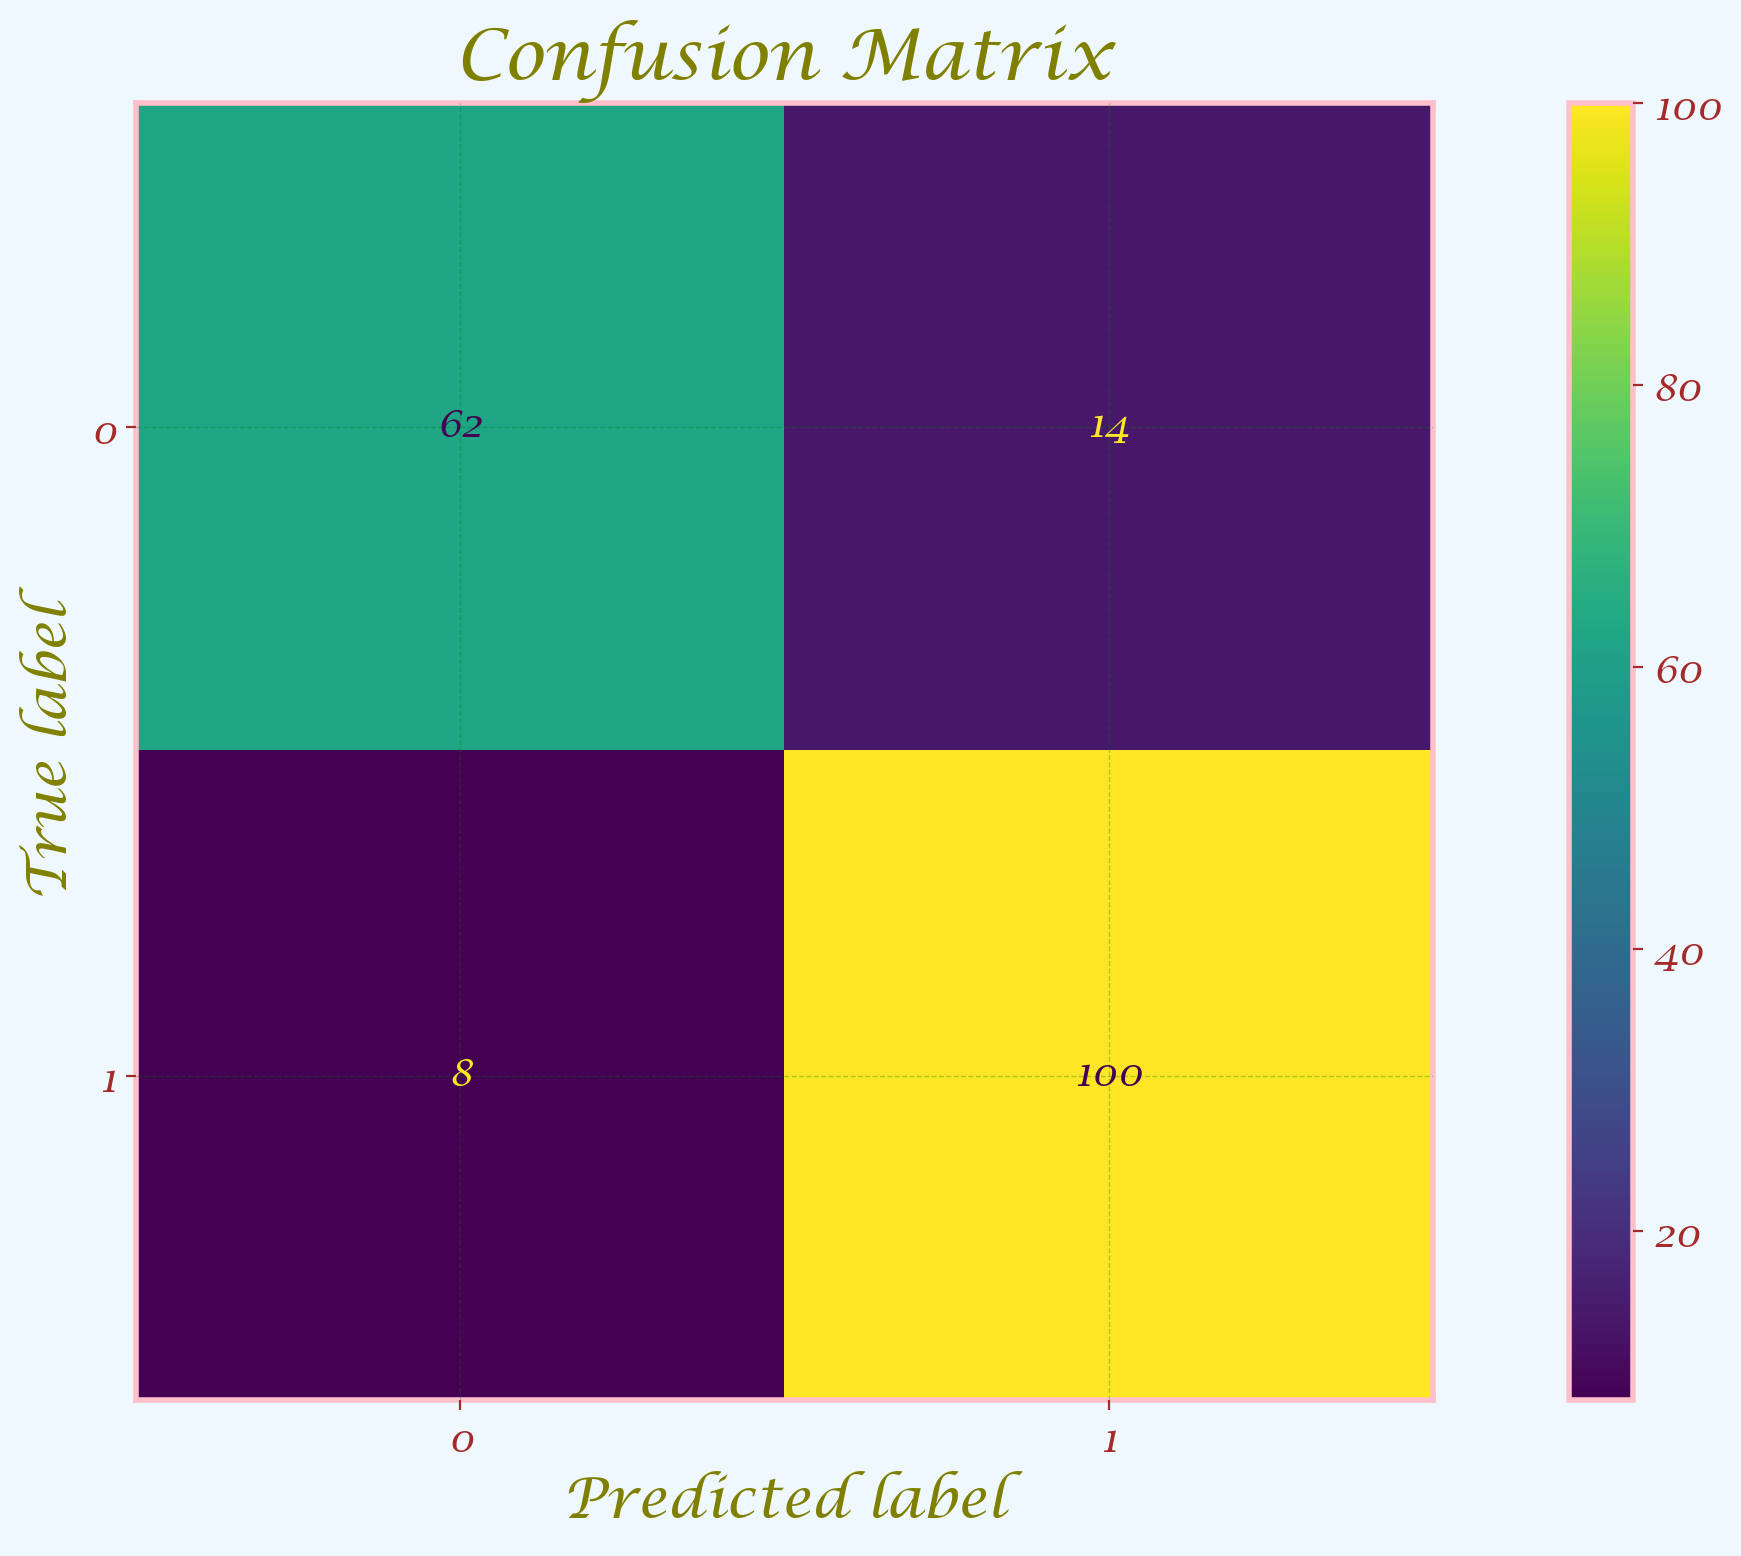

In [74]:
plot_confusion_matrix(svc, scaled_X_test_nontree, y_test_nontree);
plt.title('Confusion Matrix');

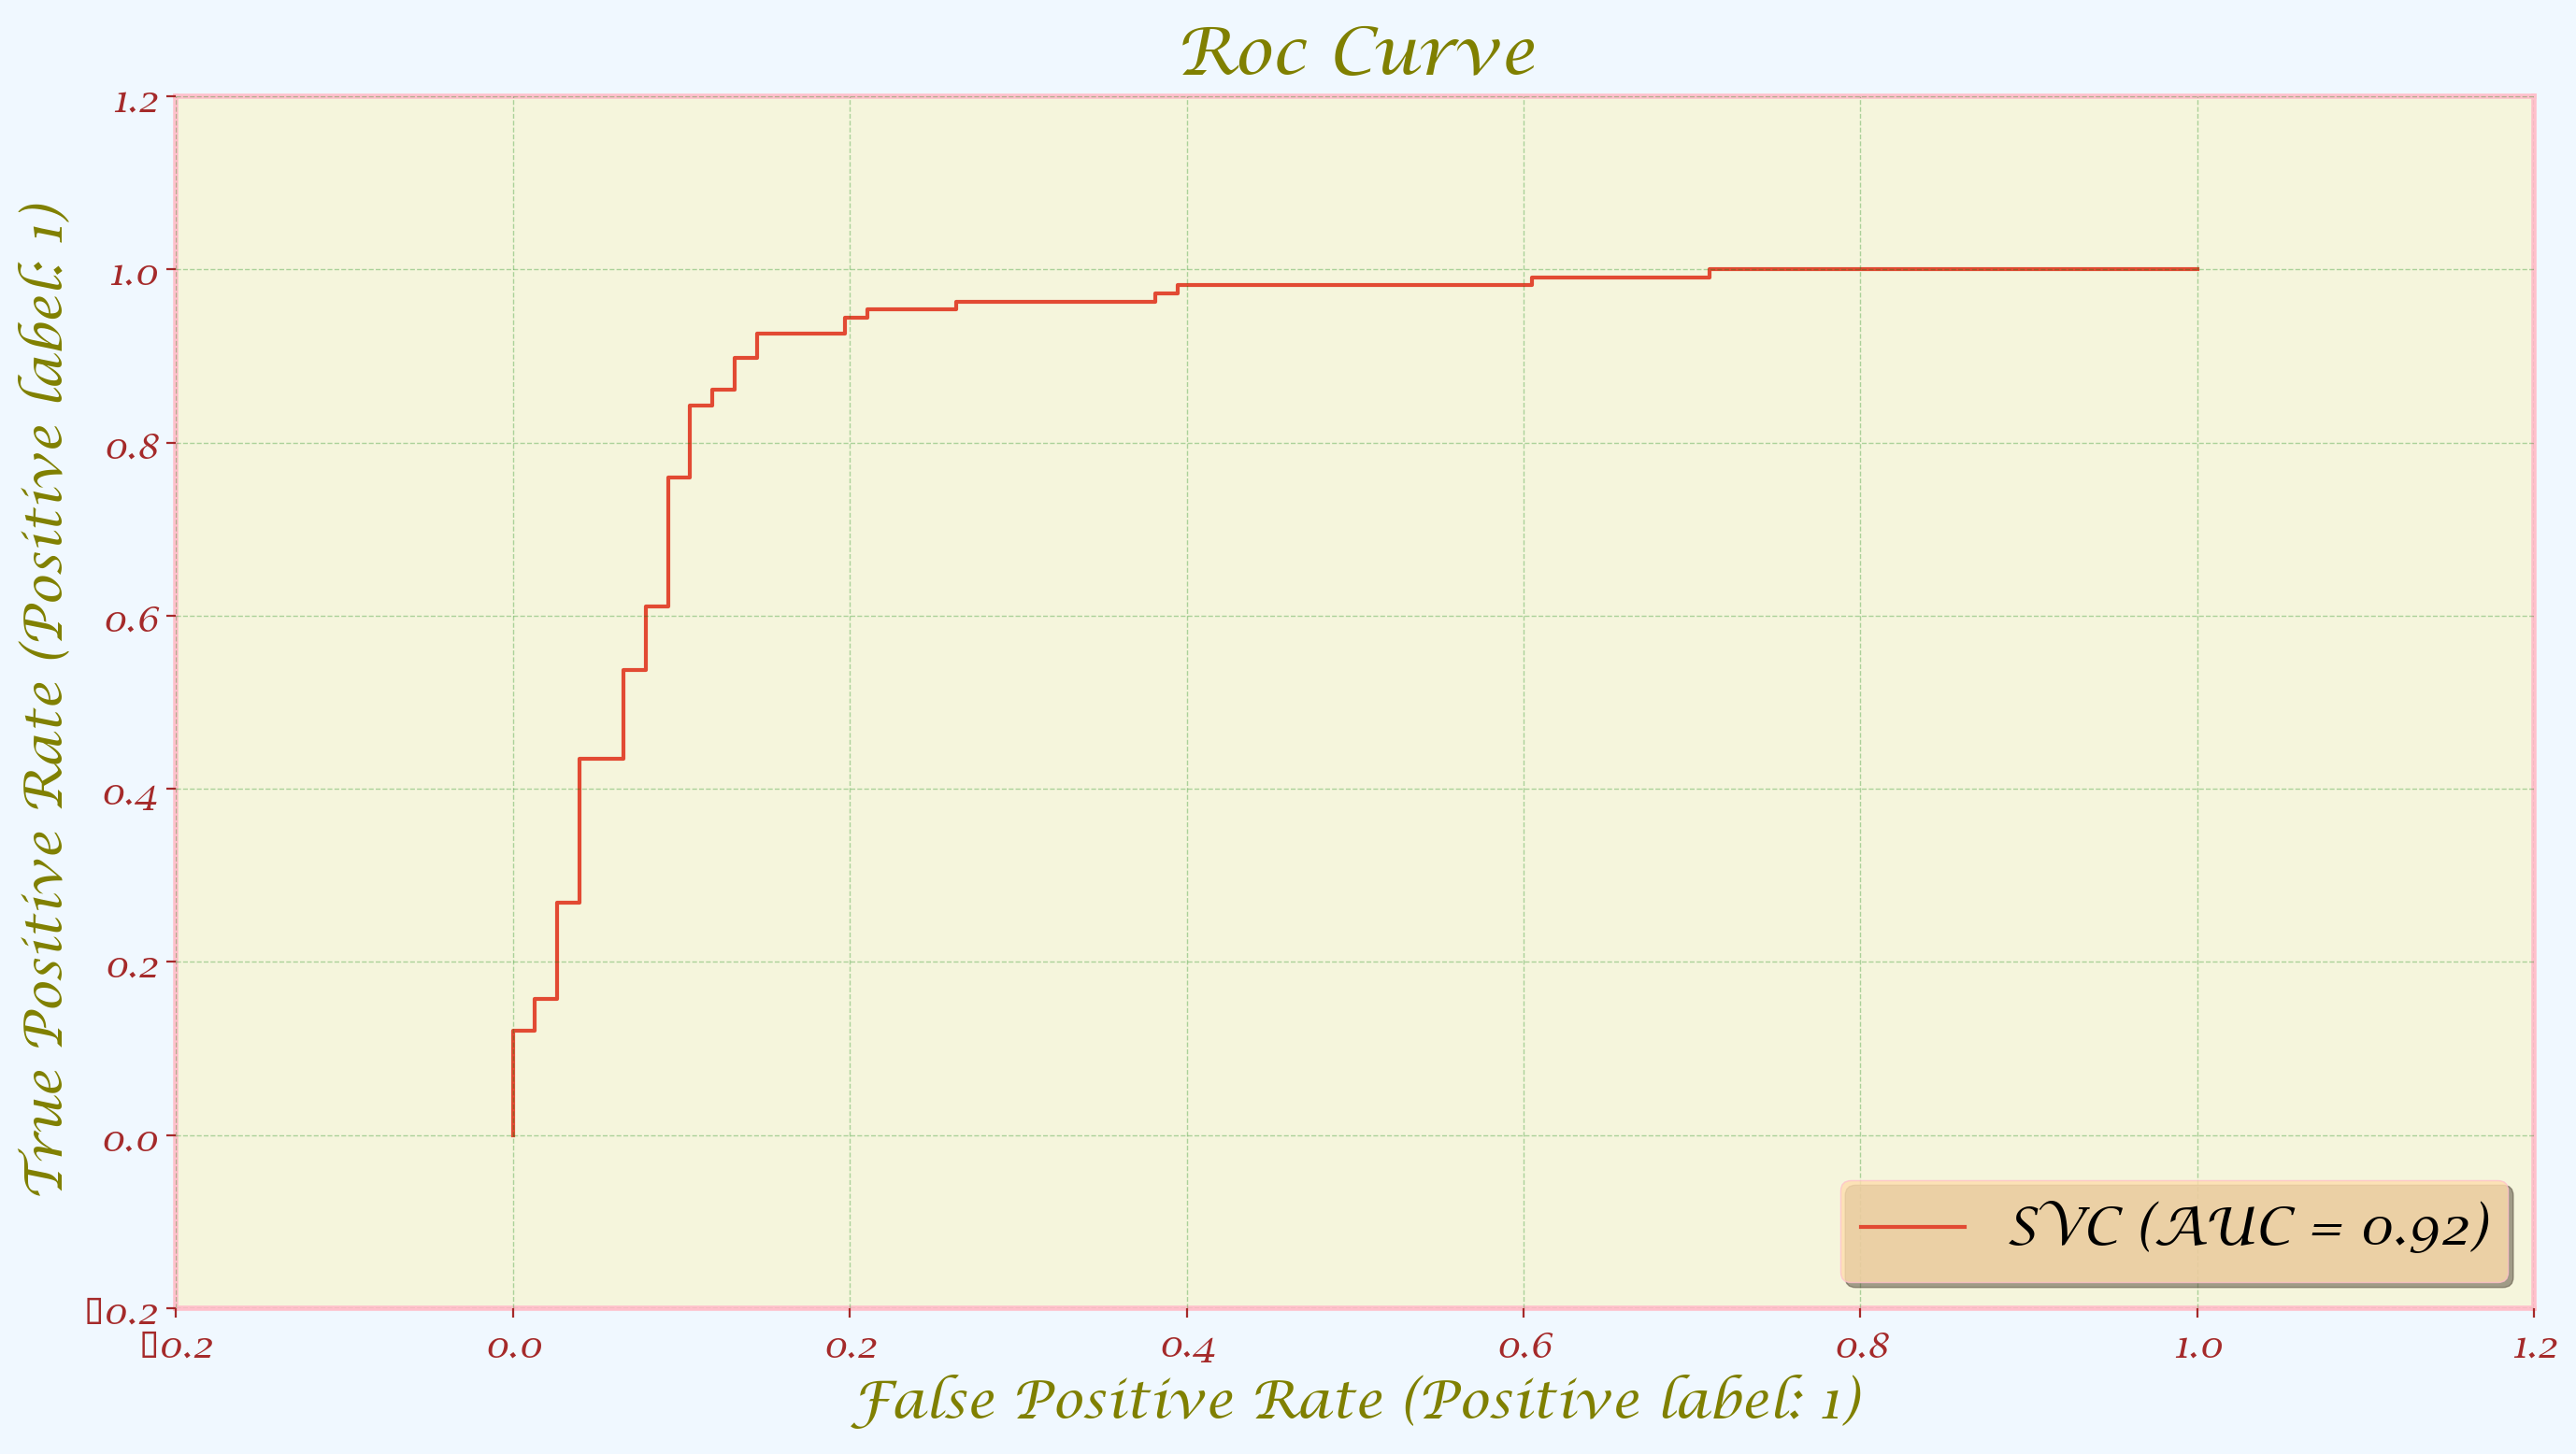

In [75]:
plot_roc_curve(svc, scaled_X_test_nontree, y_test_nontree);
plt.title('Roc Curve');

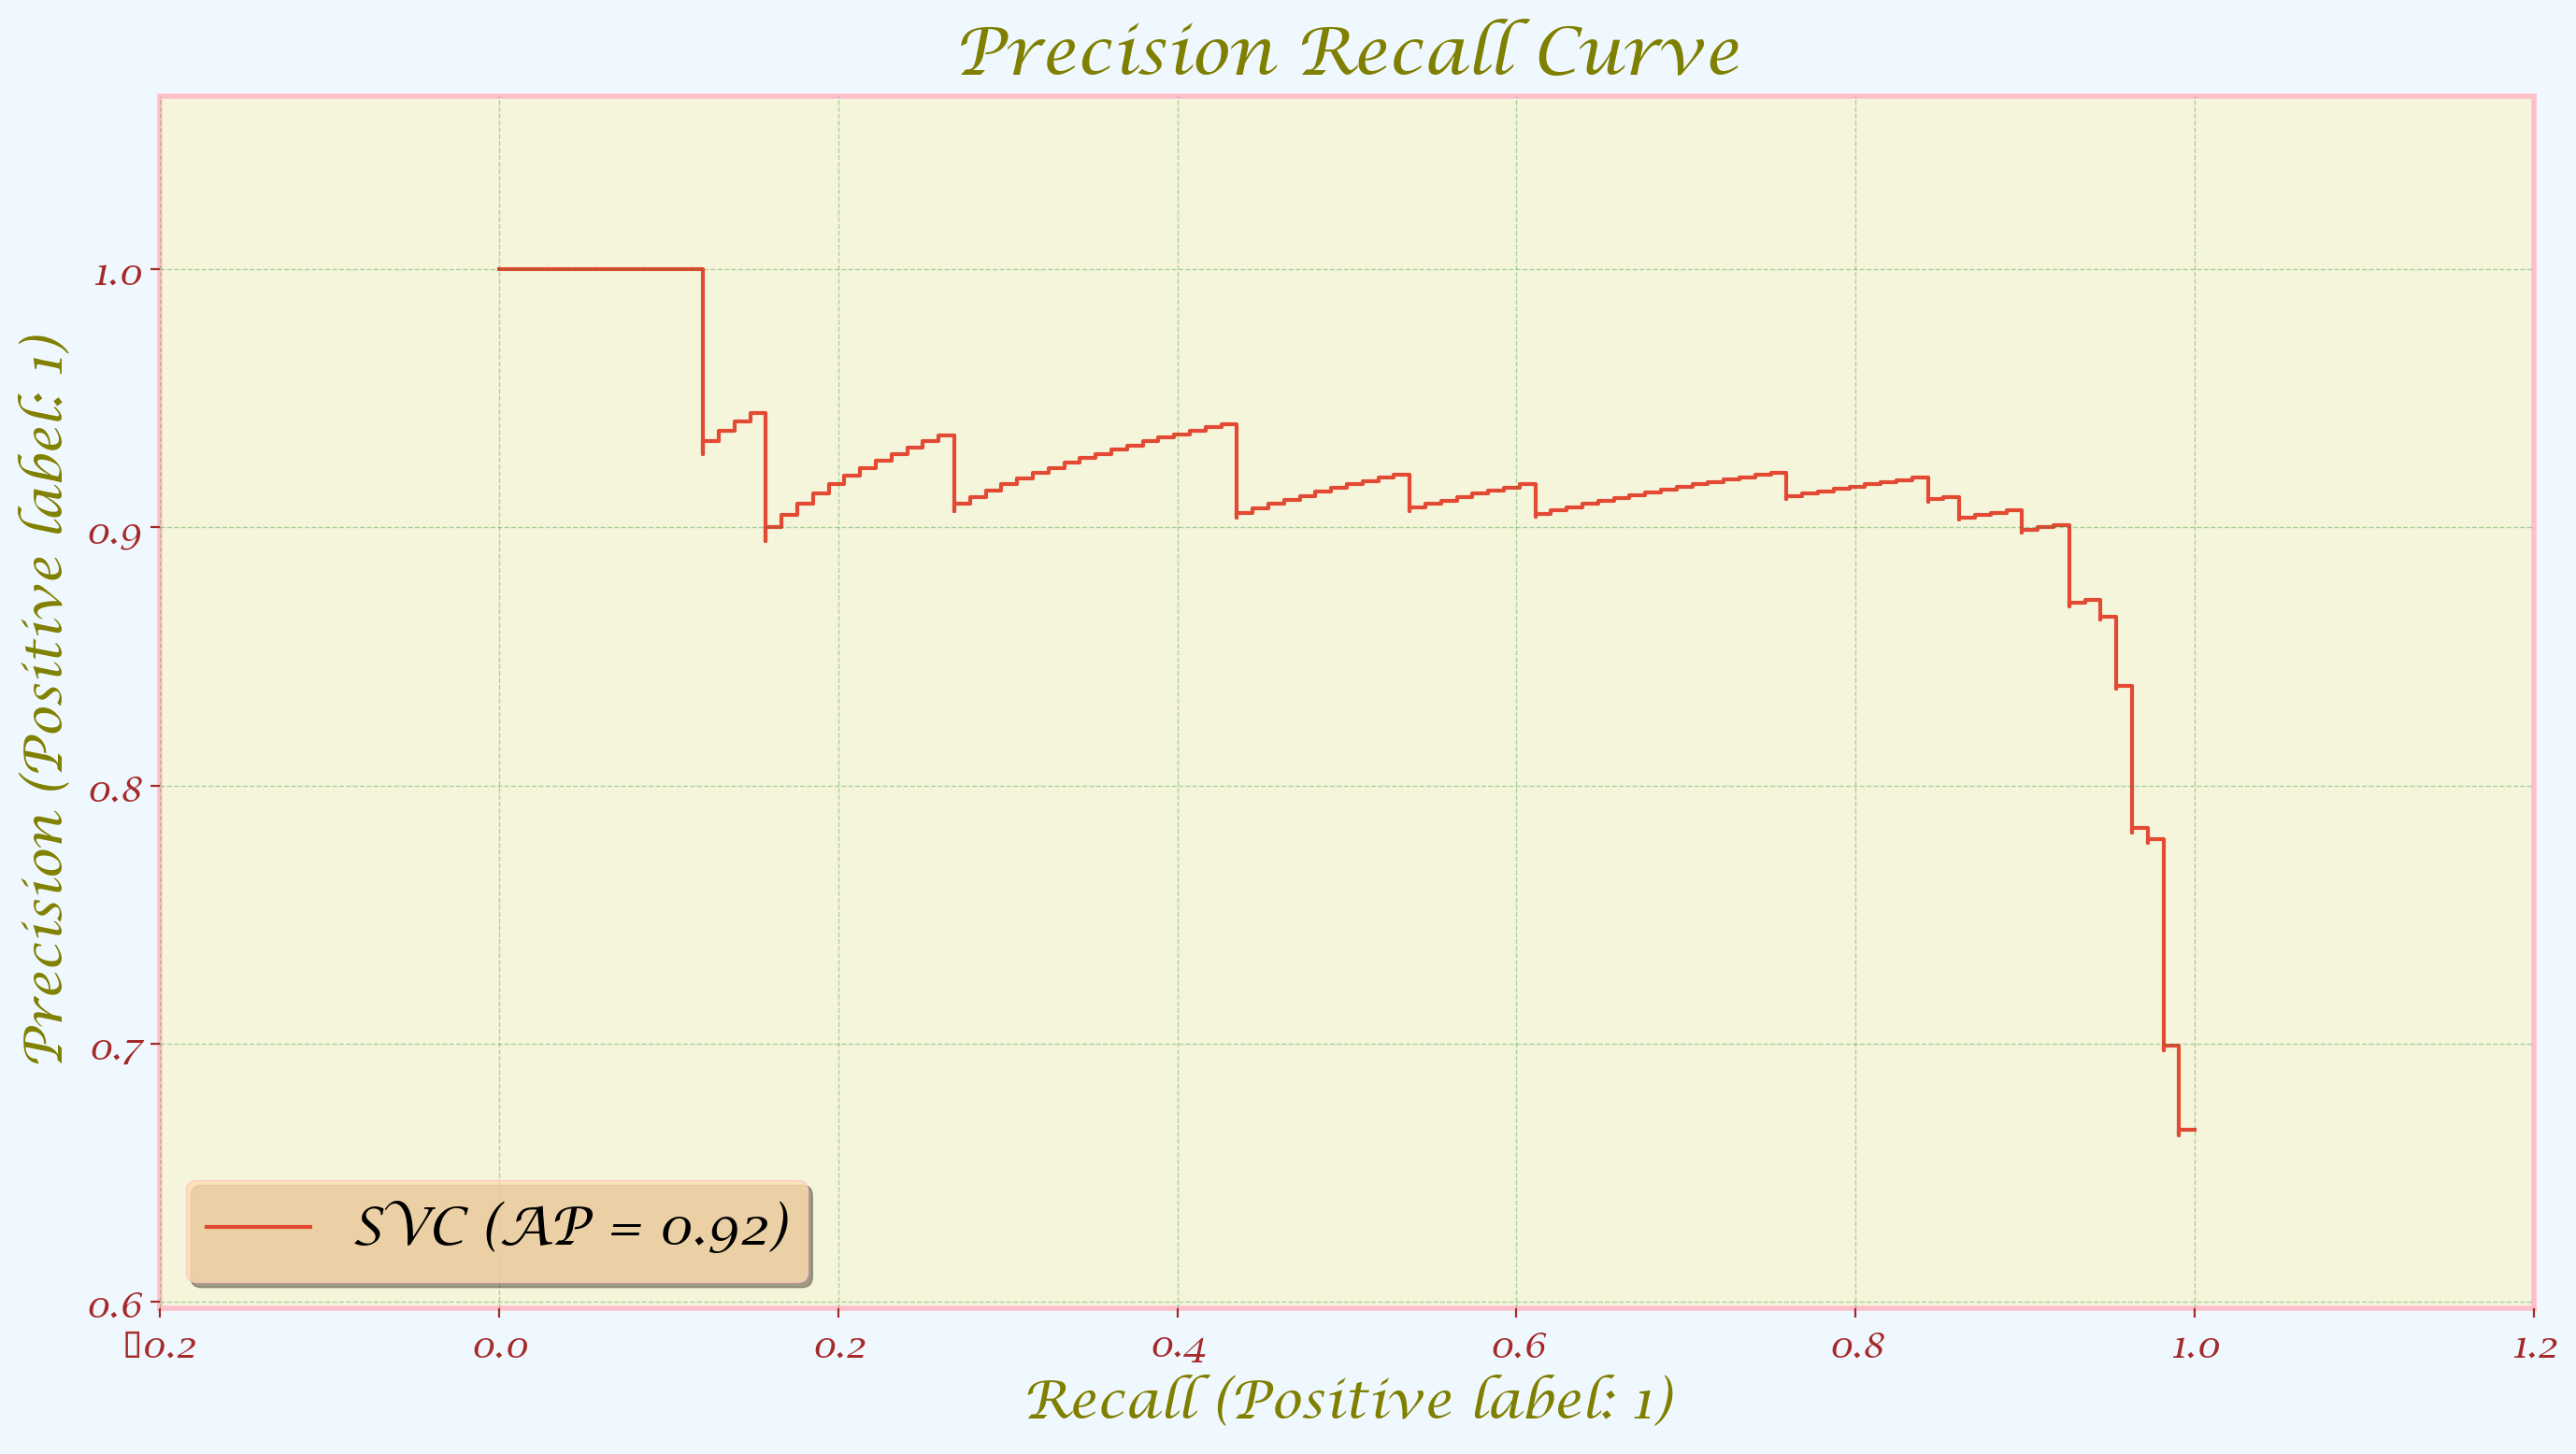

In [76]:
plot_precision_recall_curve(svc,  scaled_X_test_nontree, y_test_nontree)
plt.title('Precision Recall Curve');

In [77]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = scaled_X_train_nontree, y=y_train_nontree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.73 %
Std. Dev: 2.59 %


It is very obvious that feature scaling is necessary for Support Vector Machines as the model accuracy score of modeling with feature scaling(84.73 %) is much higher than modeling without feature scaling(68.76 %)

### 3. Decision Tree

In [78]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train_tree, y_train_tree)
y_pred_Decision = decision.predict(X_test_tree)

decision_train = round(decision.score(X_train_tree, y_train_tree) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test_tree) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test_tree) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_tree,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 80.98 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        76
           1       0.85      0.82      0.84       108

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.81      0.81       184



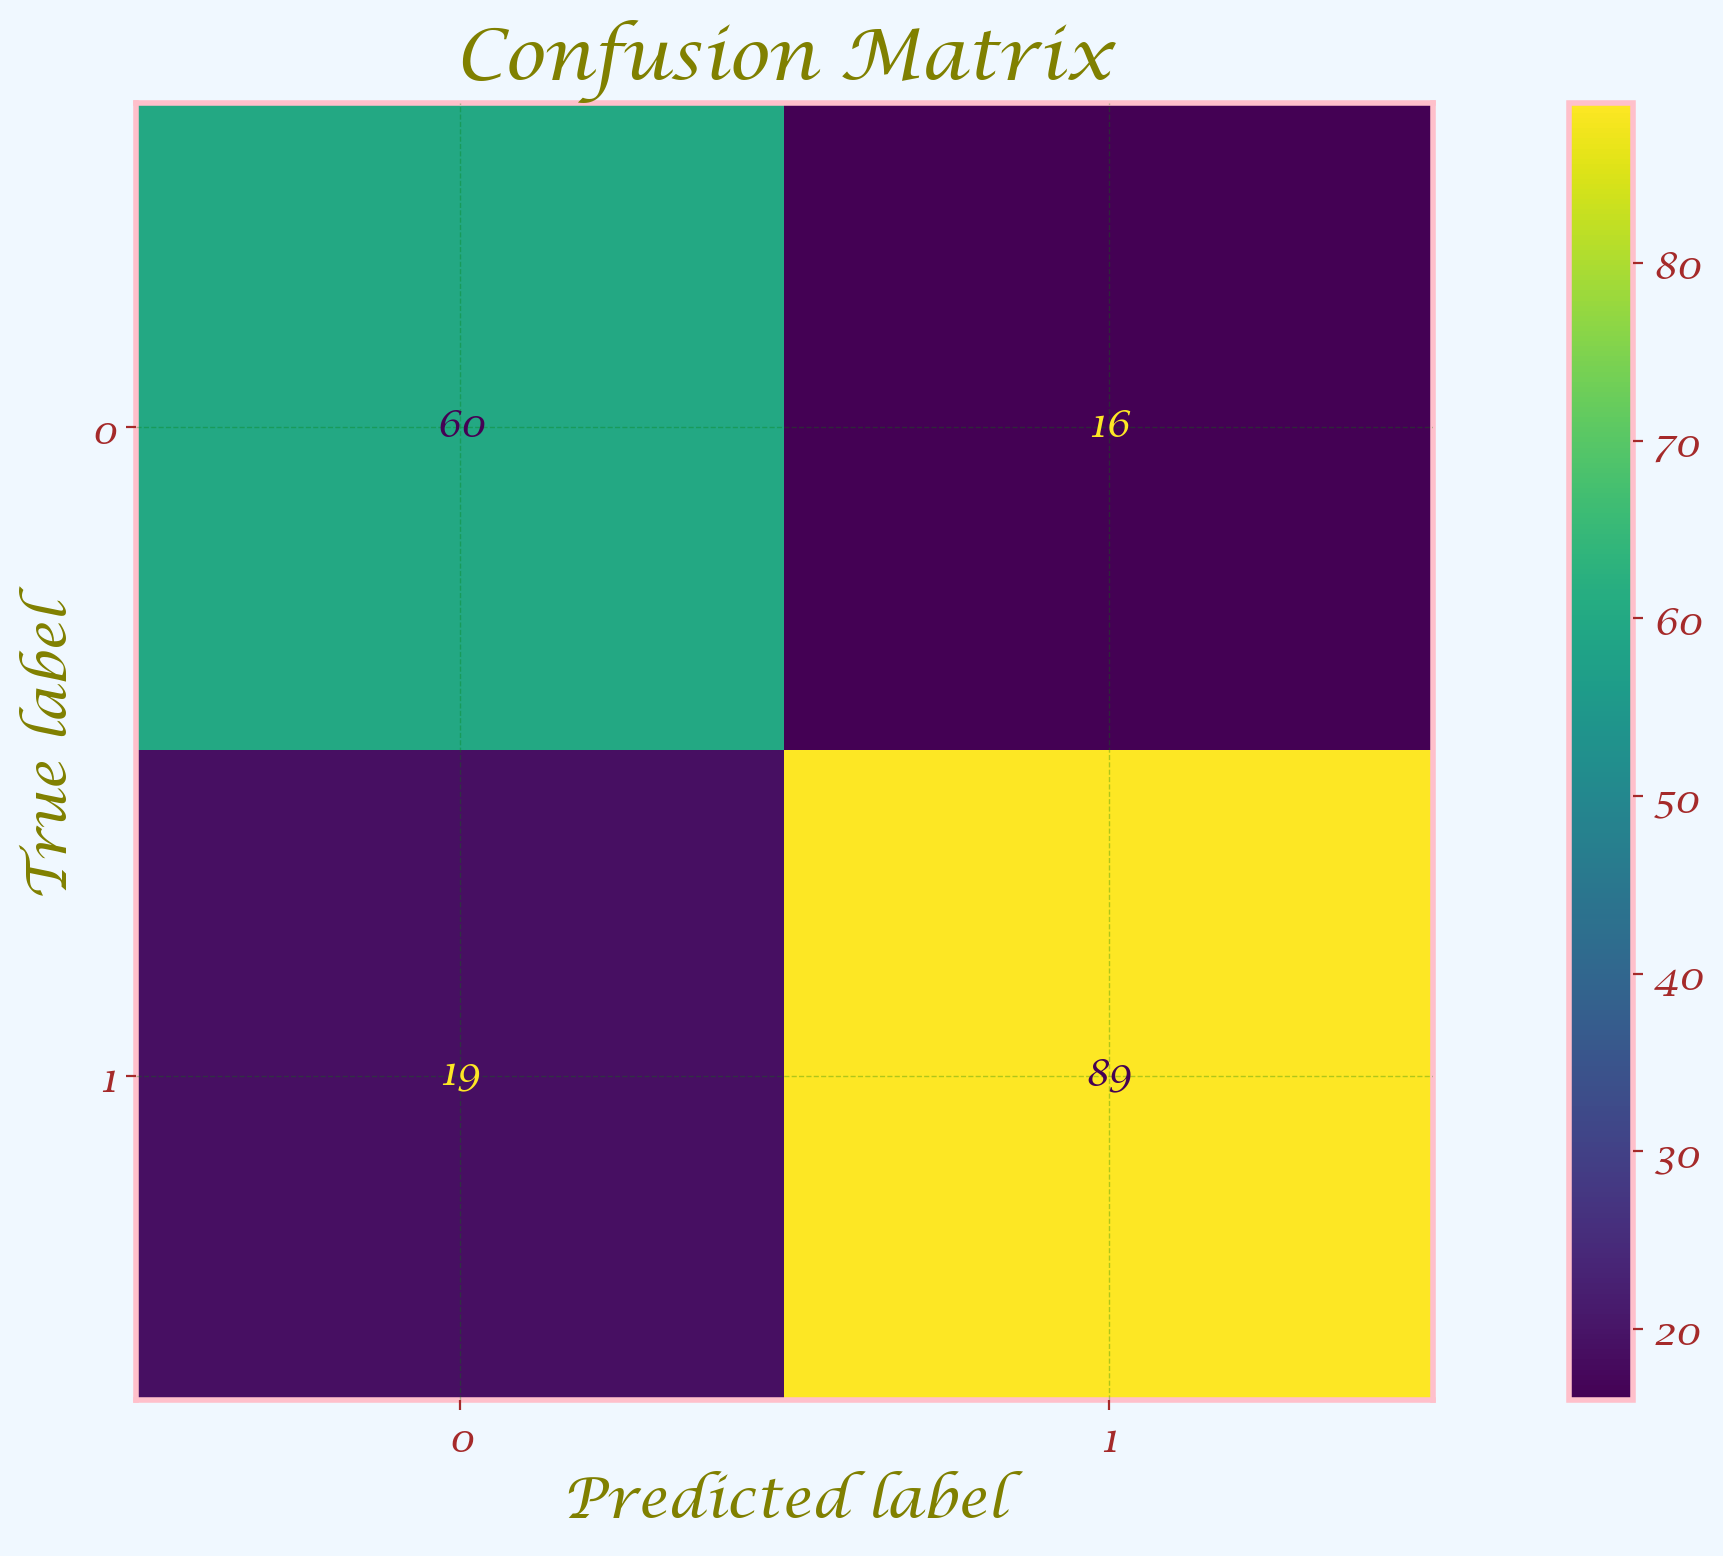

In [79]:
plot_confusion_matrix(decision, X_test_tree, y_test_tree);
plt.title('Confusion Matrix');

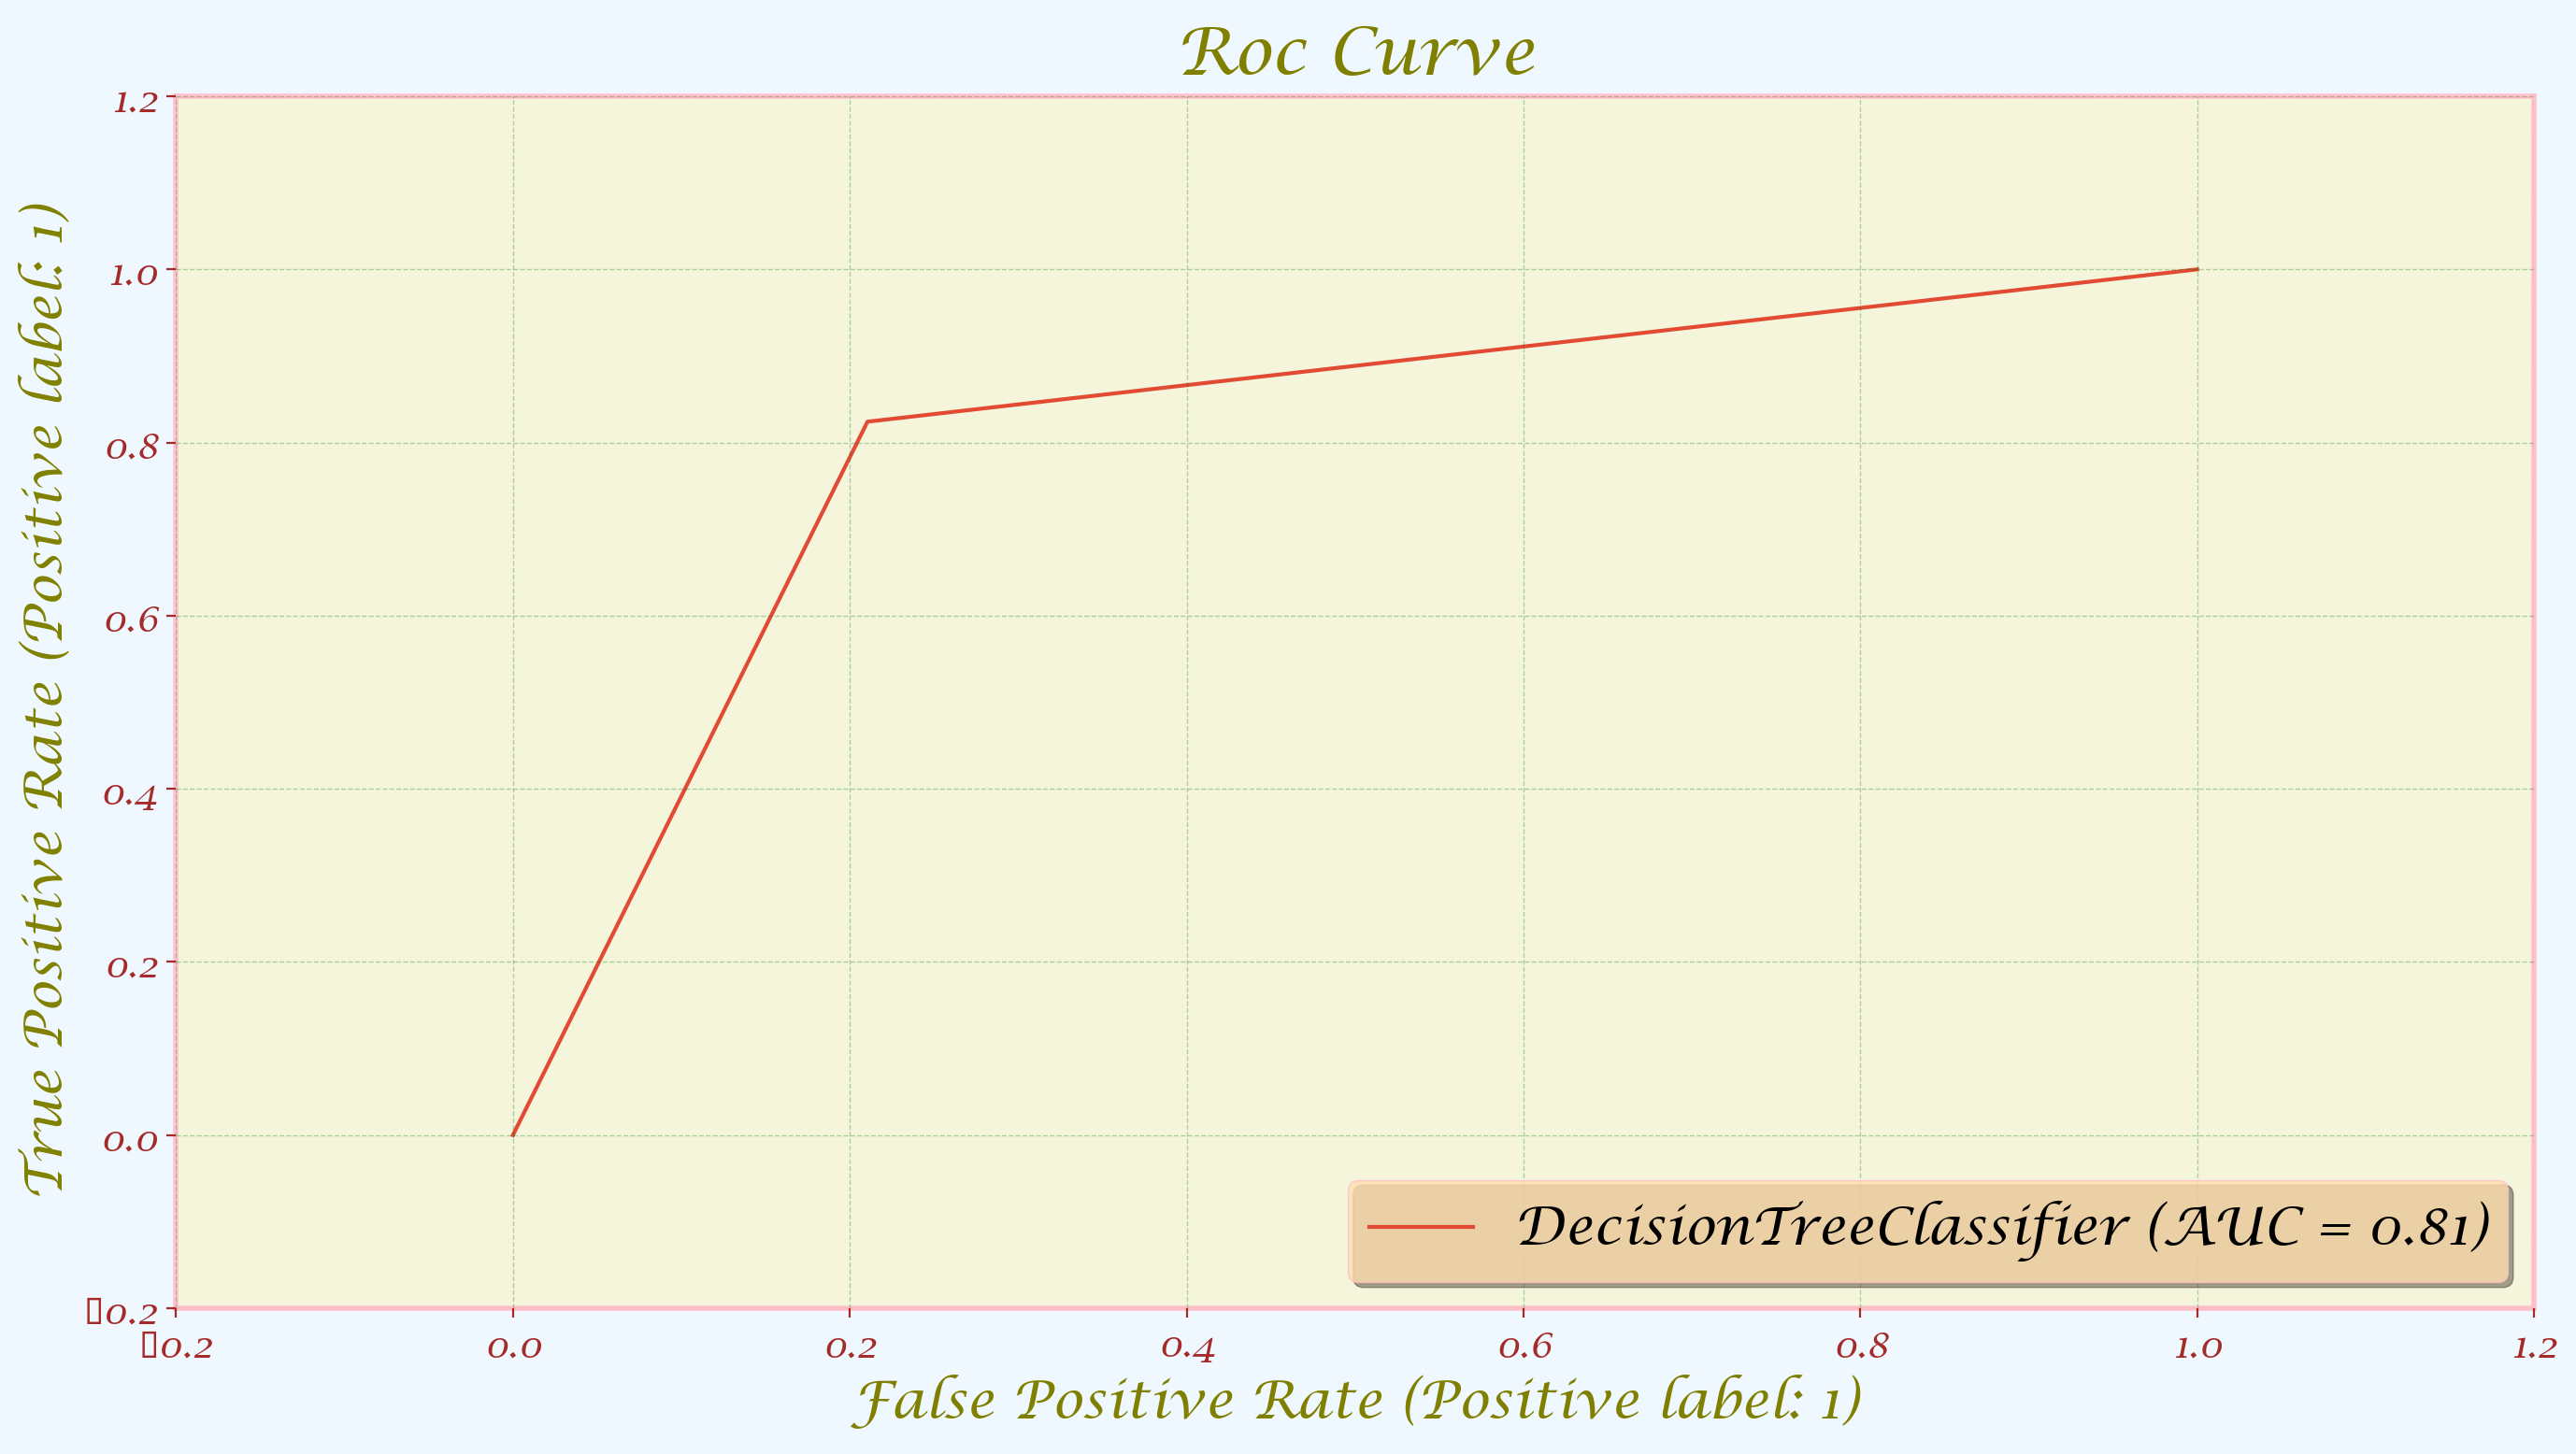

In [80]:
plot_roc_curve(decision, X_test_tree, y_test_tree);
plt.title('Roc Curve');

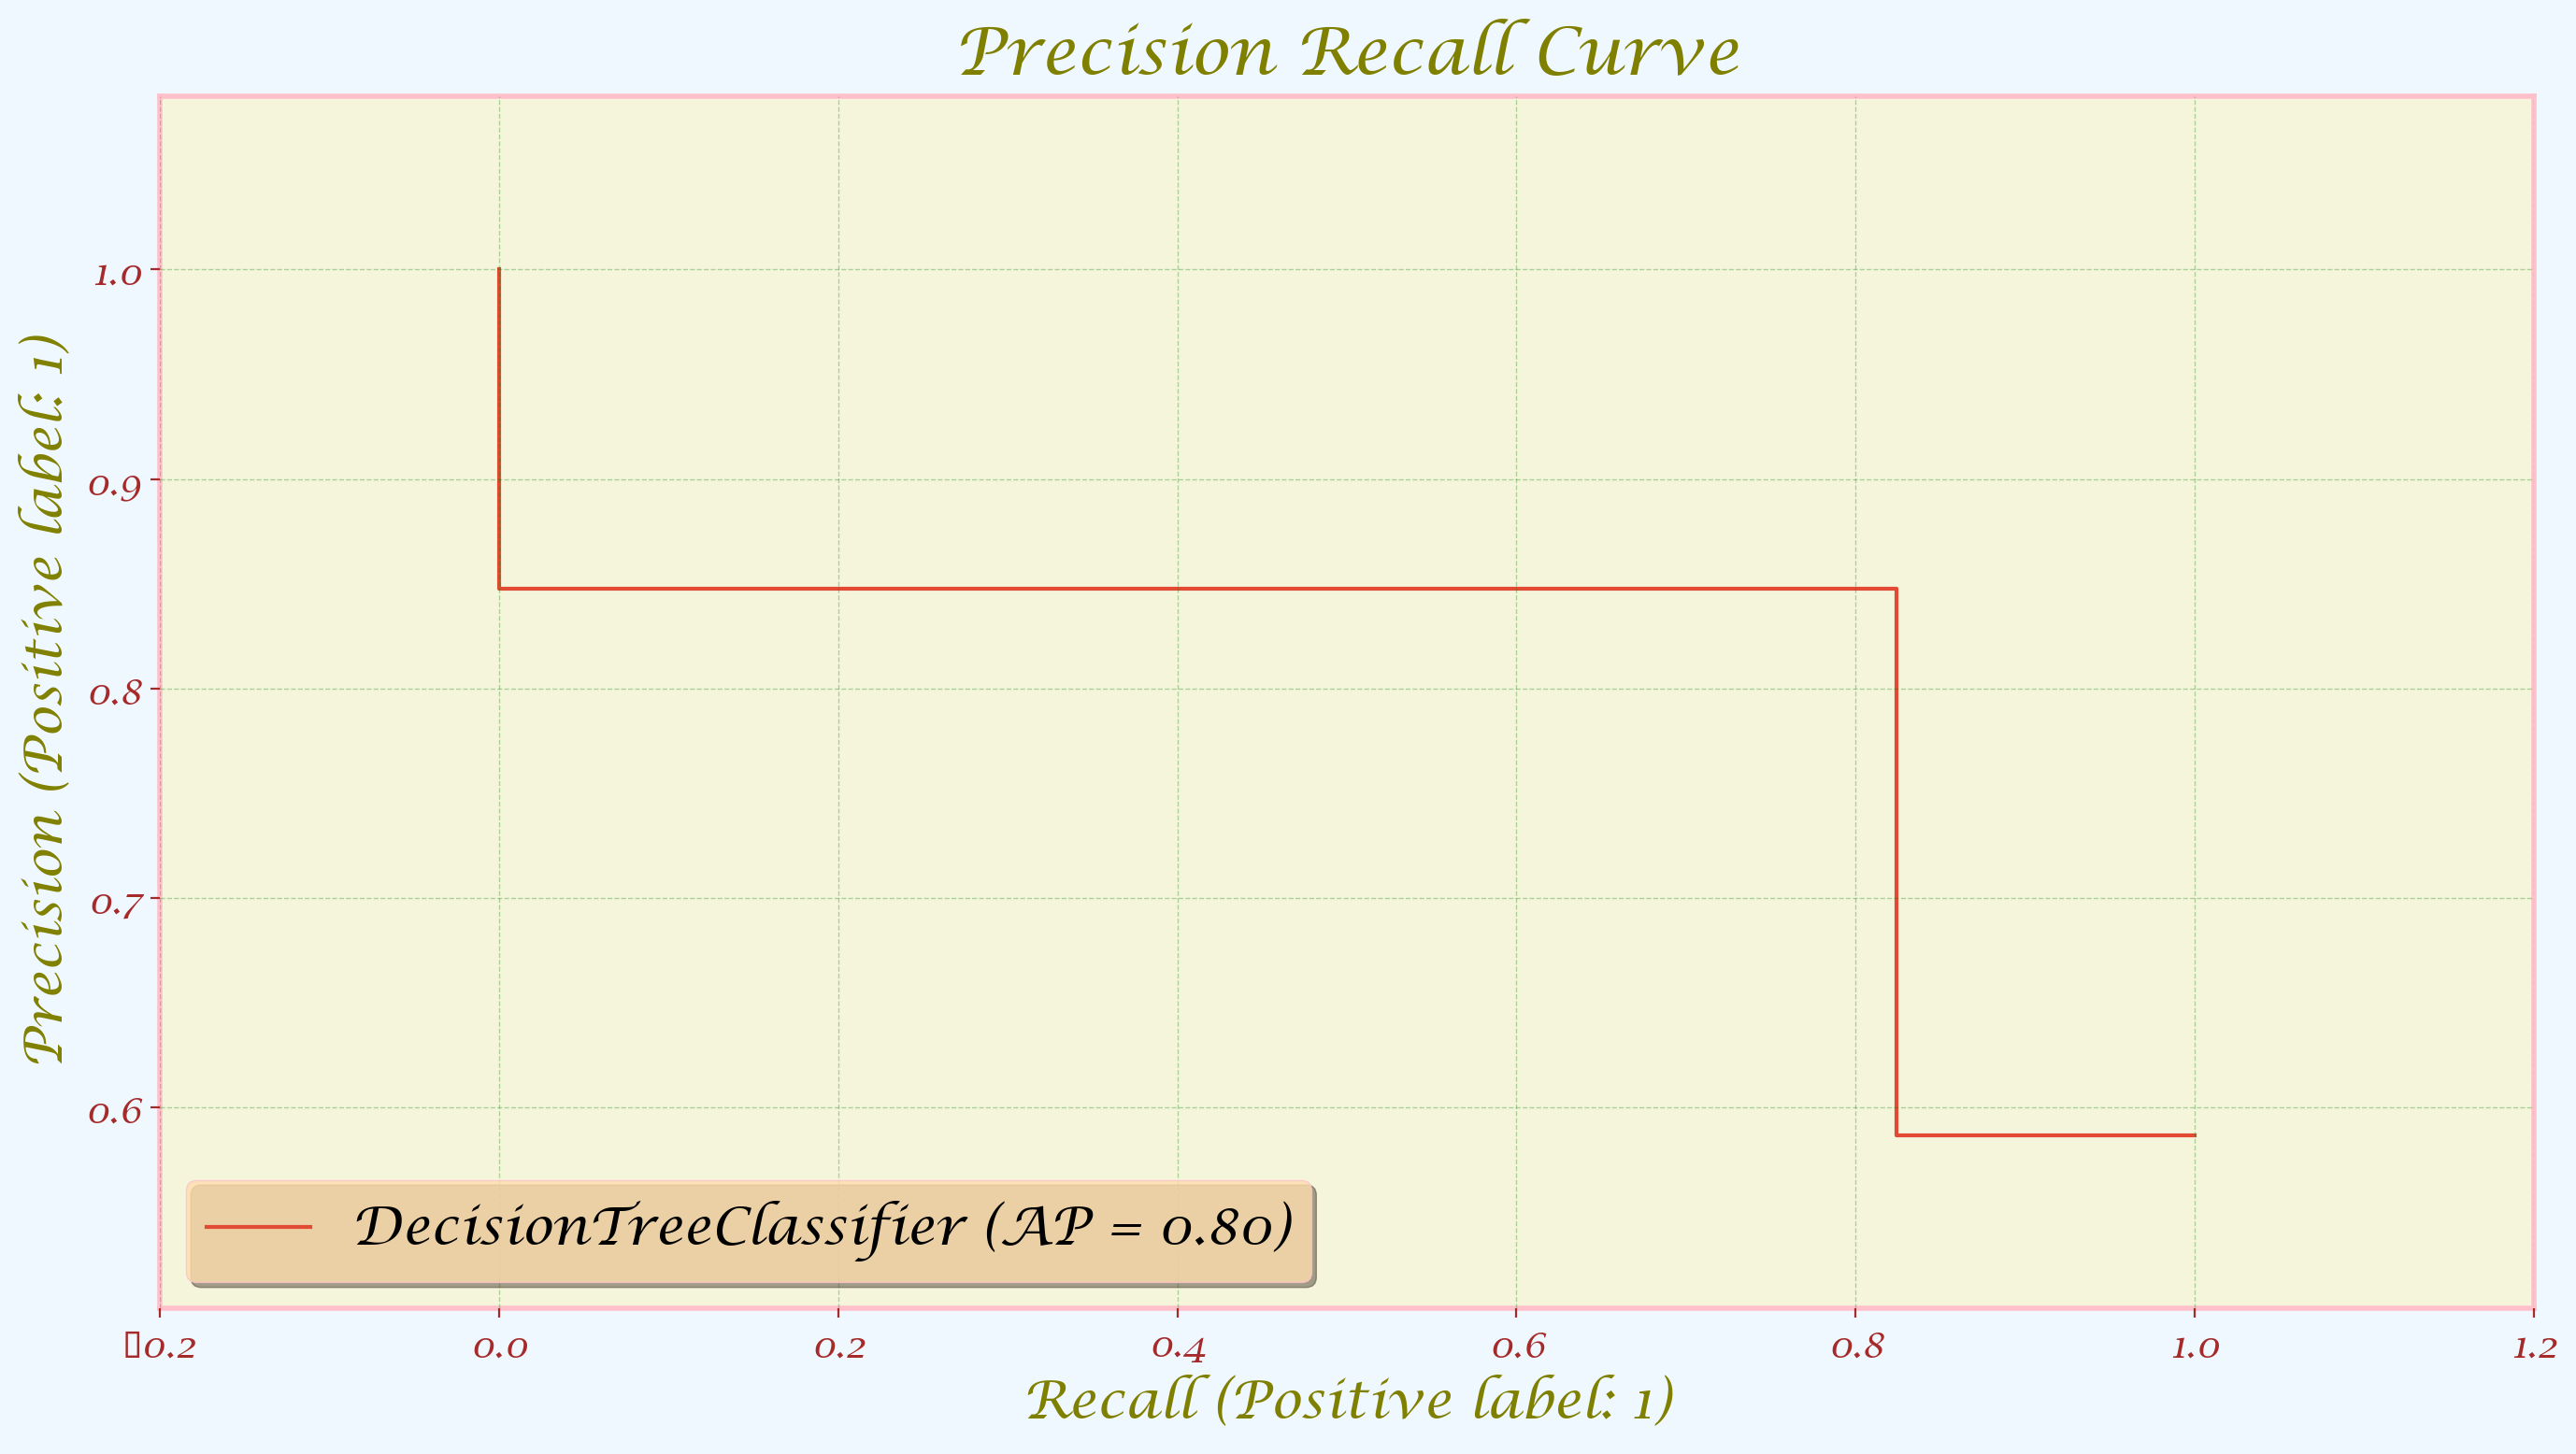

In [81]:
plot_precision_recall_curve(decision, X_test_tree, y_test_tree)
plt.title('Precision Recall Curve');

In [82]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=decision, X = X_train_tree, y=y_train_tree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 77.89 %
Std. Dev: 3.71 %


### 4. Random Forest

In [83]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_tree, y_train_tree)
y_pred_random = random_forest.predict(X_test_tree)
random_forest.score(X_train_tree, y_train_tree)

random_forest_train = round(random_forest.score(X_train_tree, y_train_tree) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test_tree) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test_tree) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test_tree,y_pred_random))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 85.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        76
           1       0.86      0.91      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



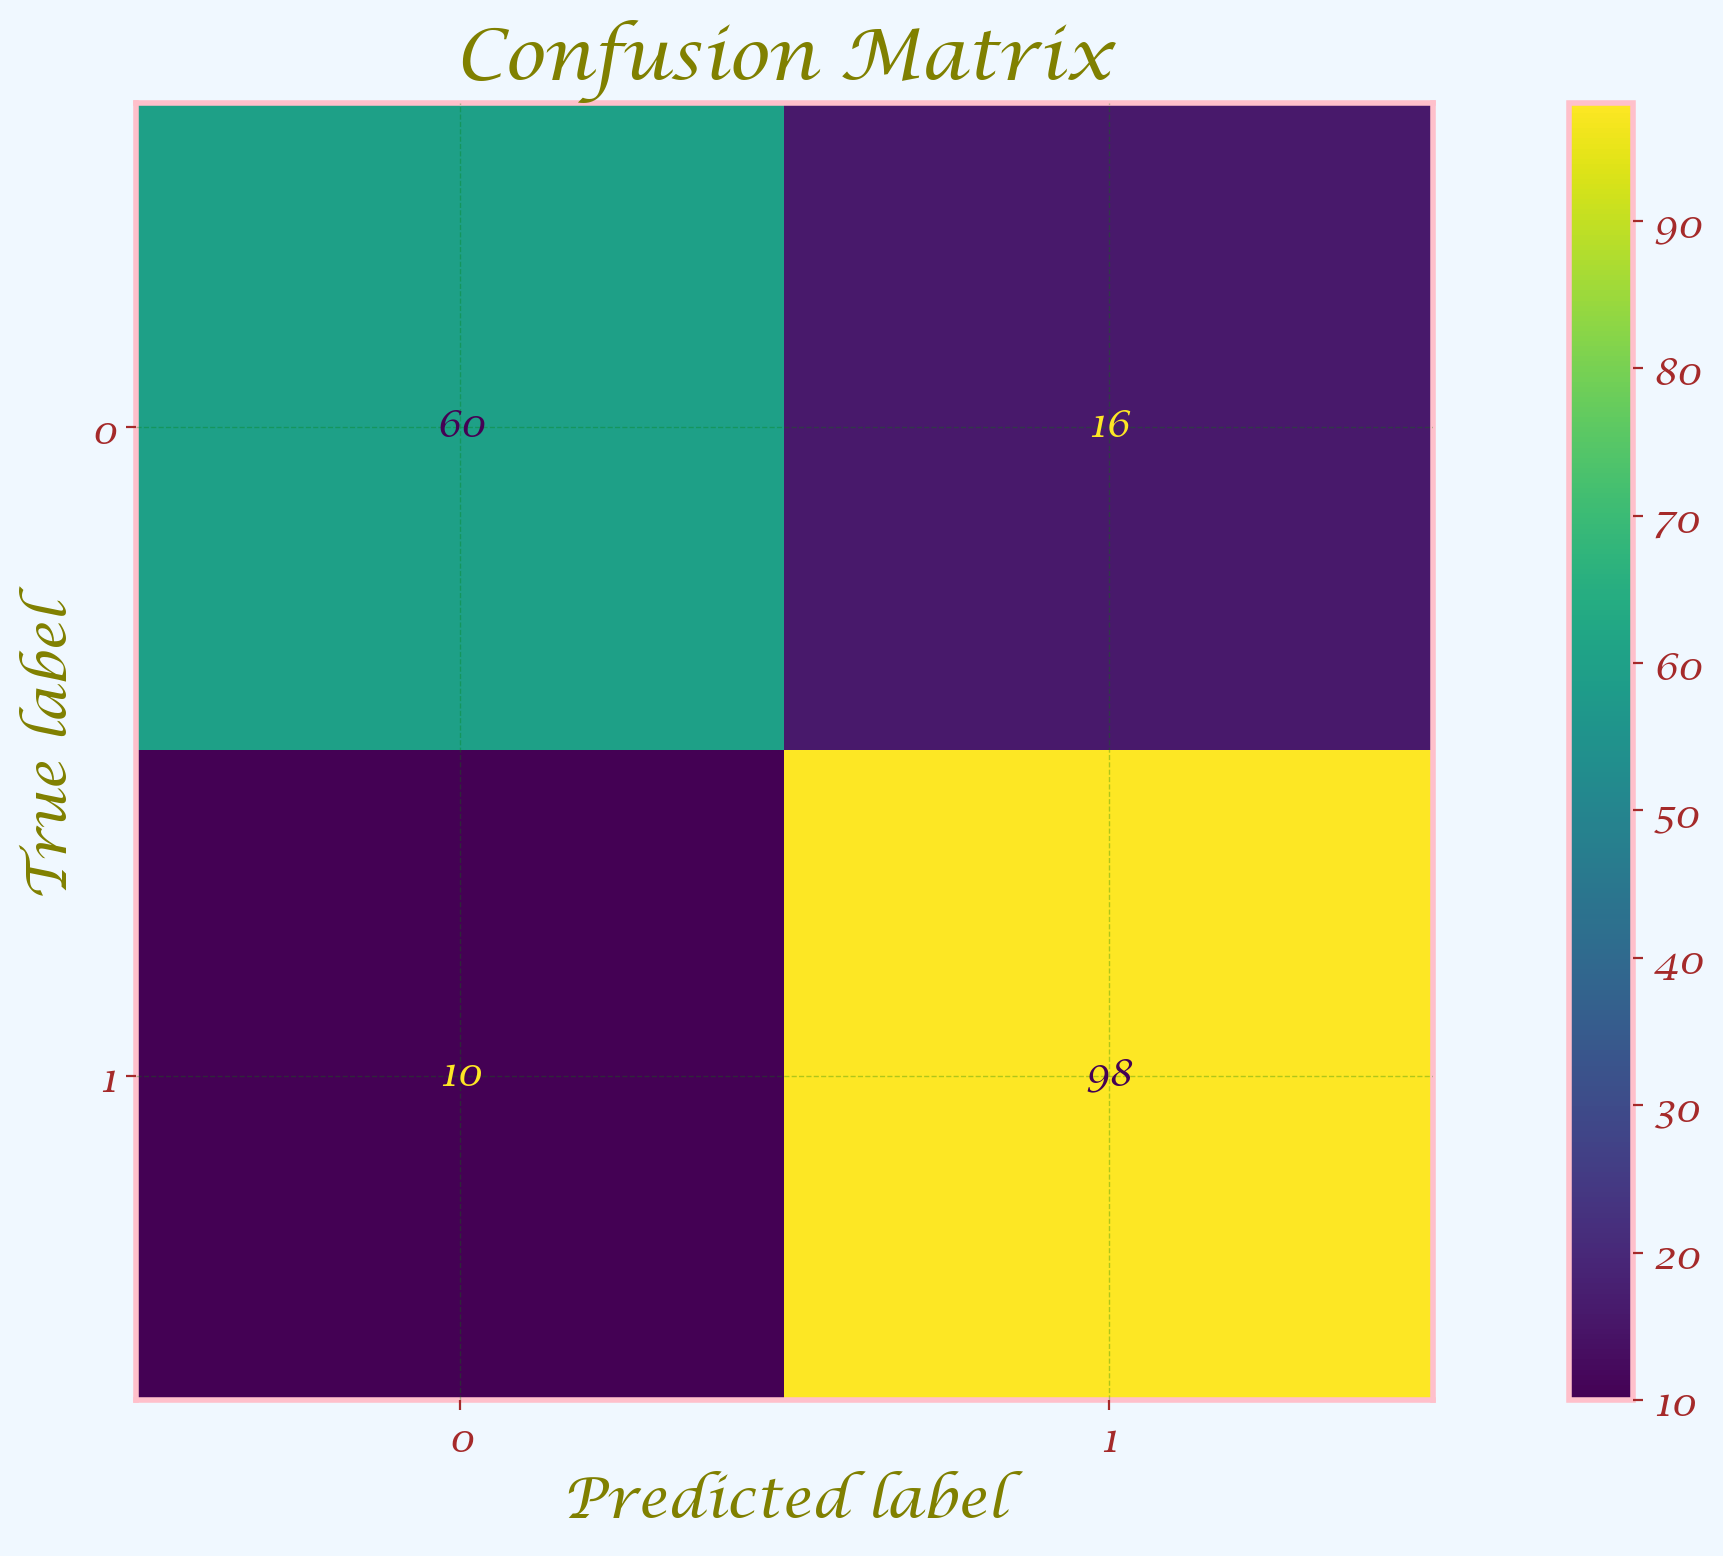

In [84]:
plot_confusion_matrix(random_forest, X_test_tree, y_test_tree);
plt.title('Confusion Matrix');

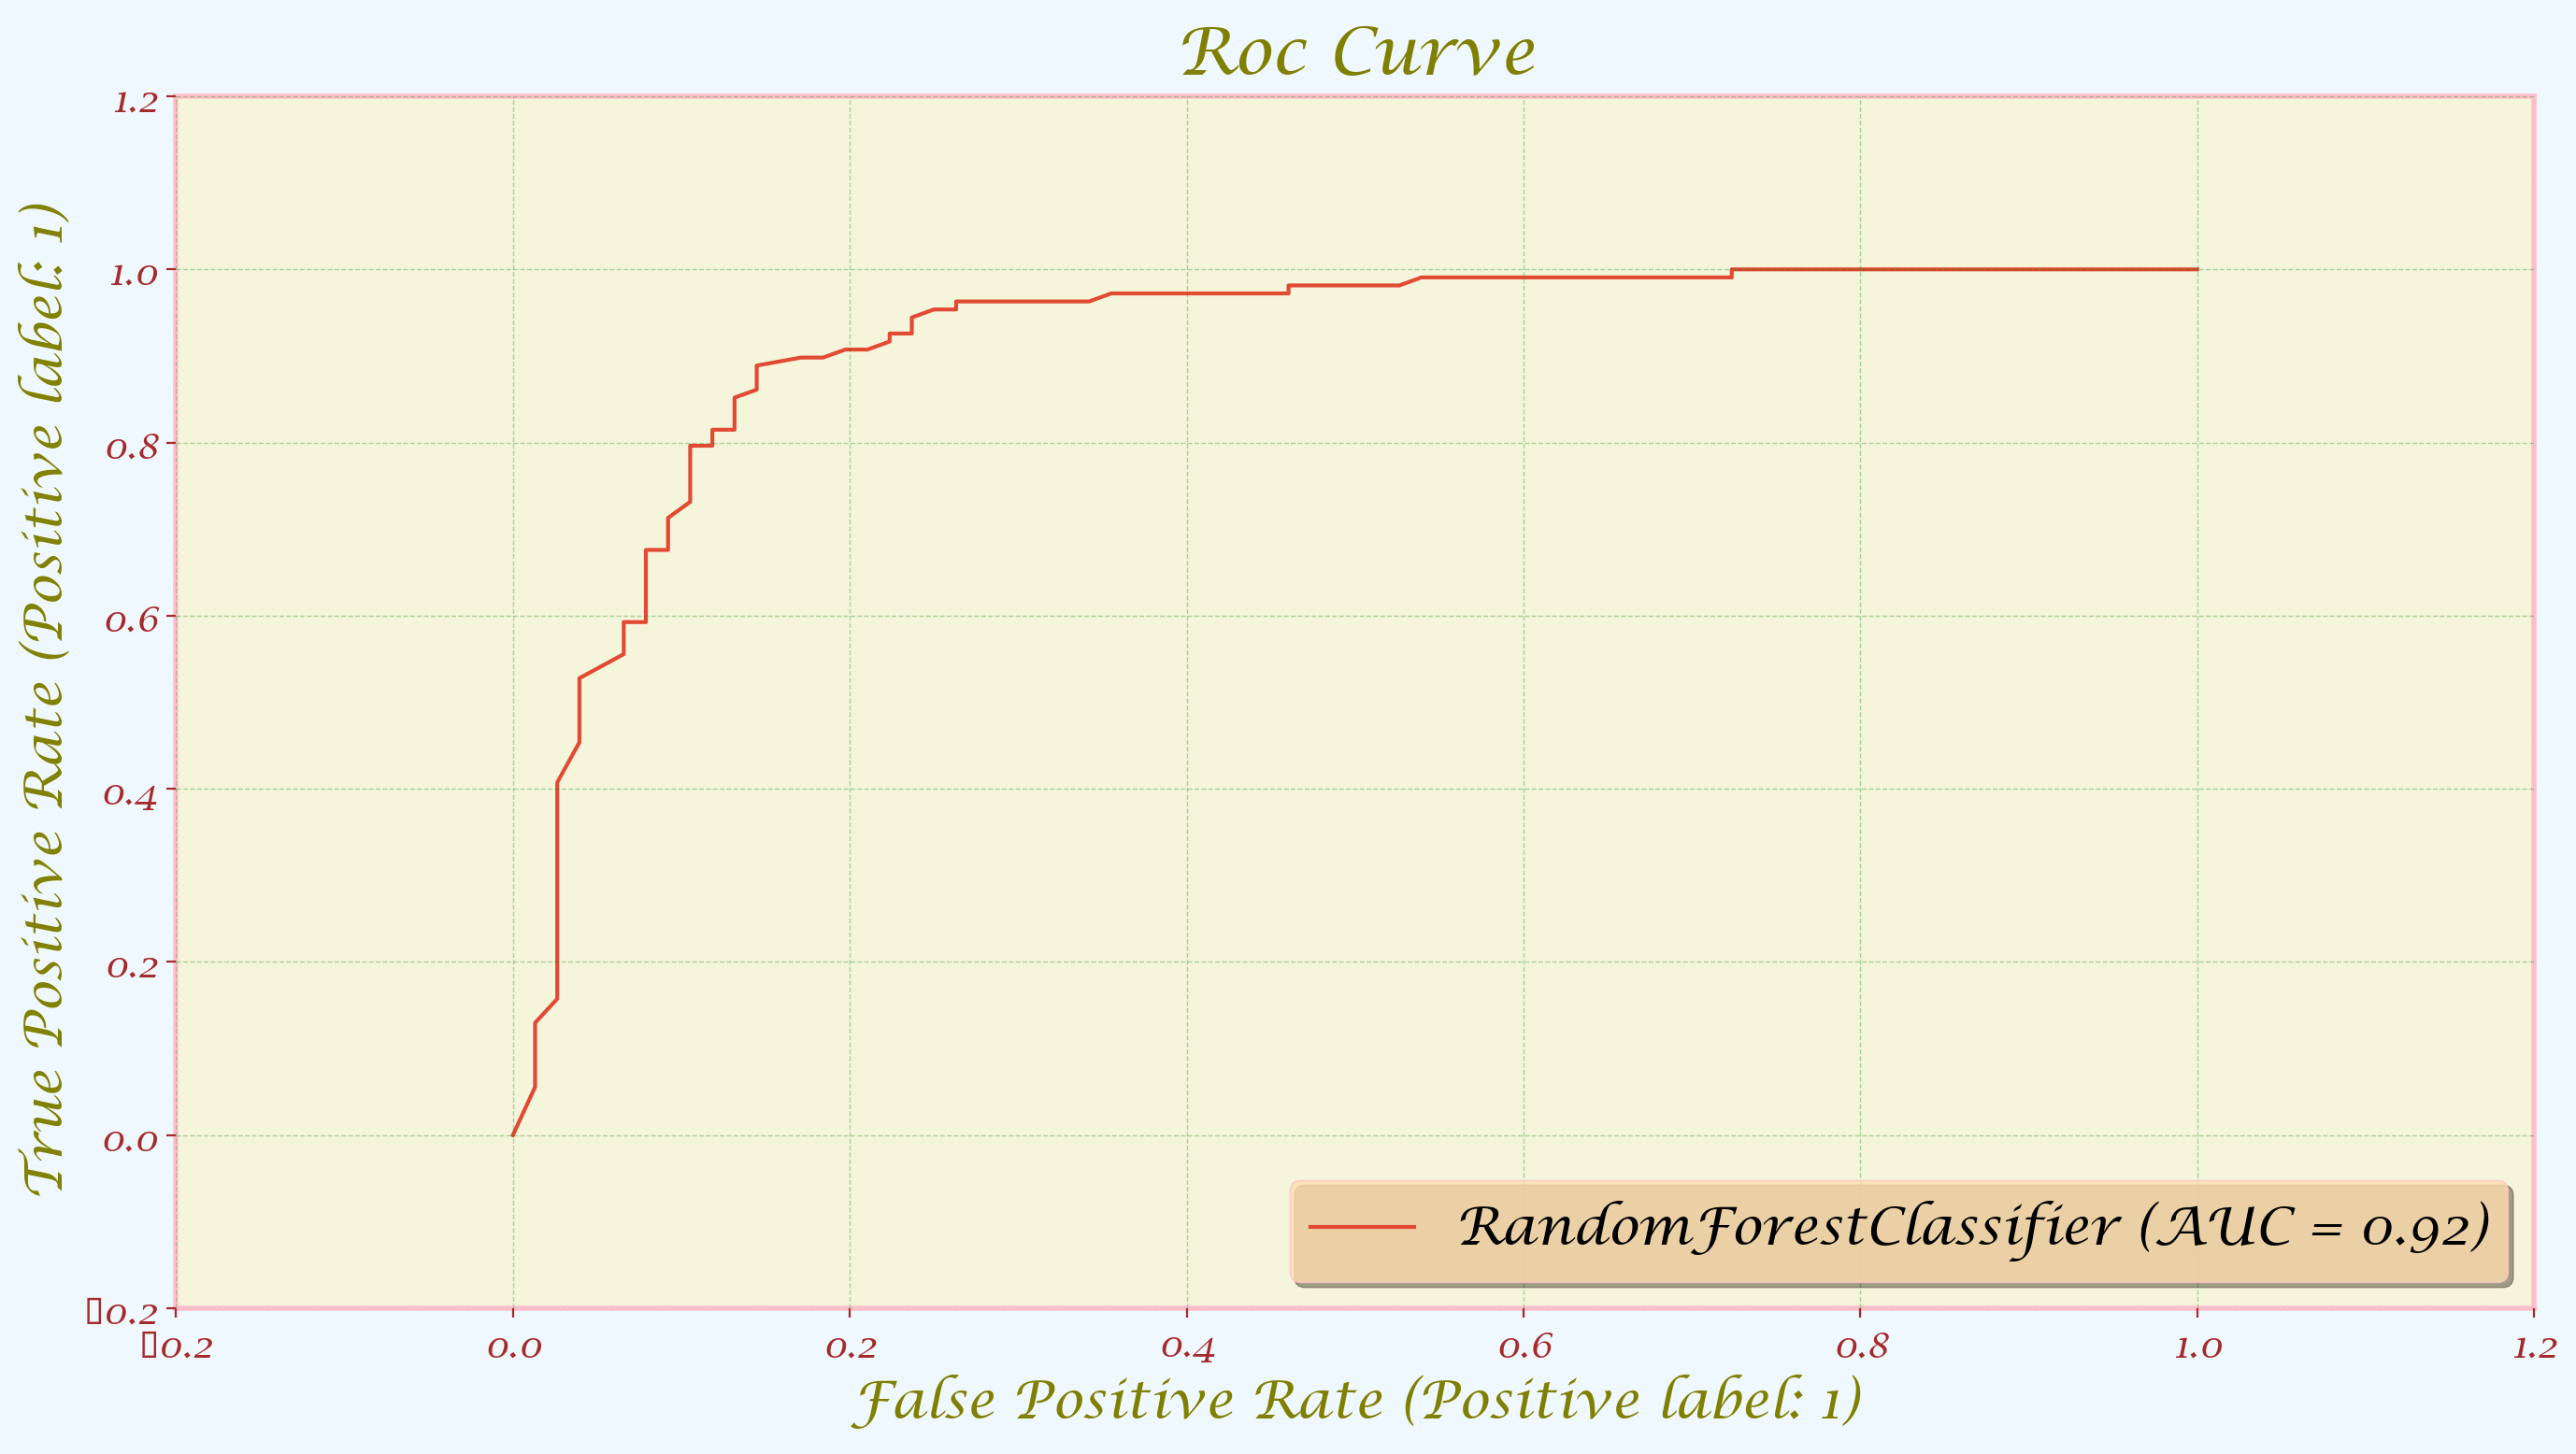

In [85]:
plot_roc_curve(random_forest, X_test_tree, y_test_tree);
plt.title('Roc Curve');

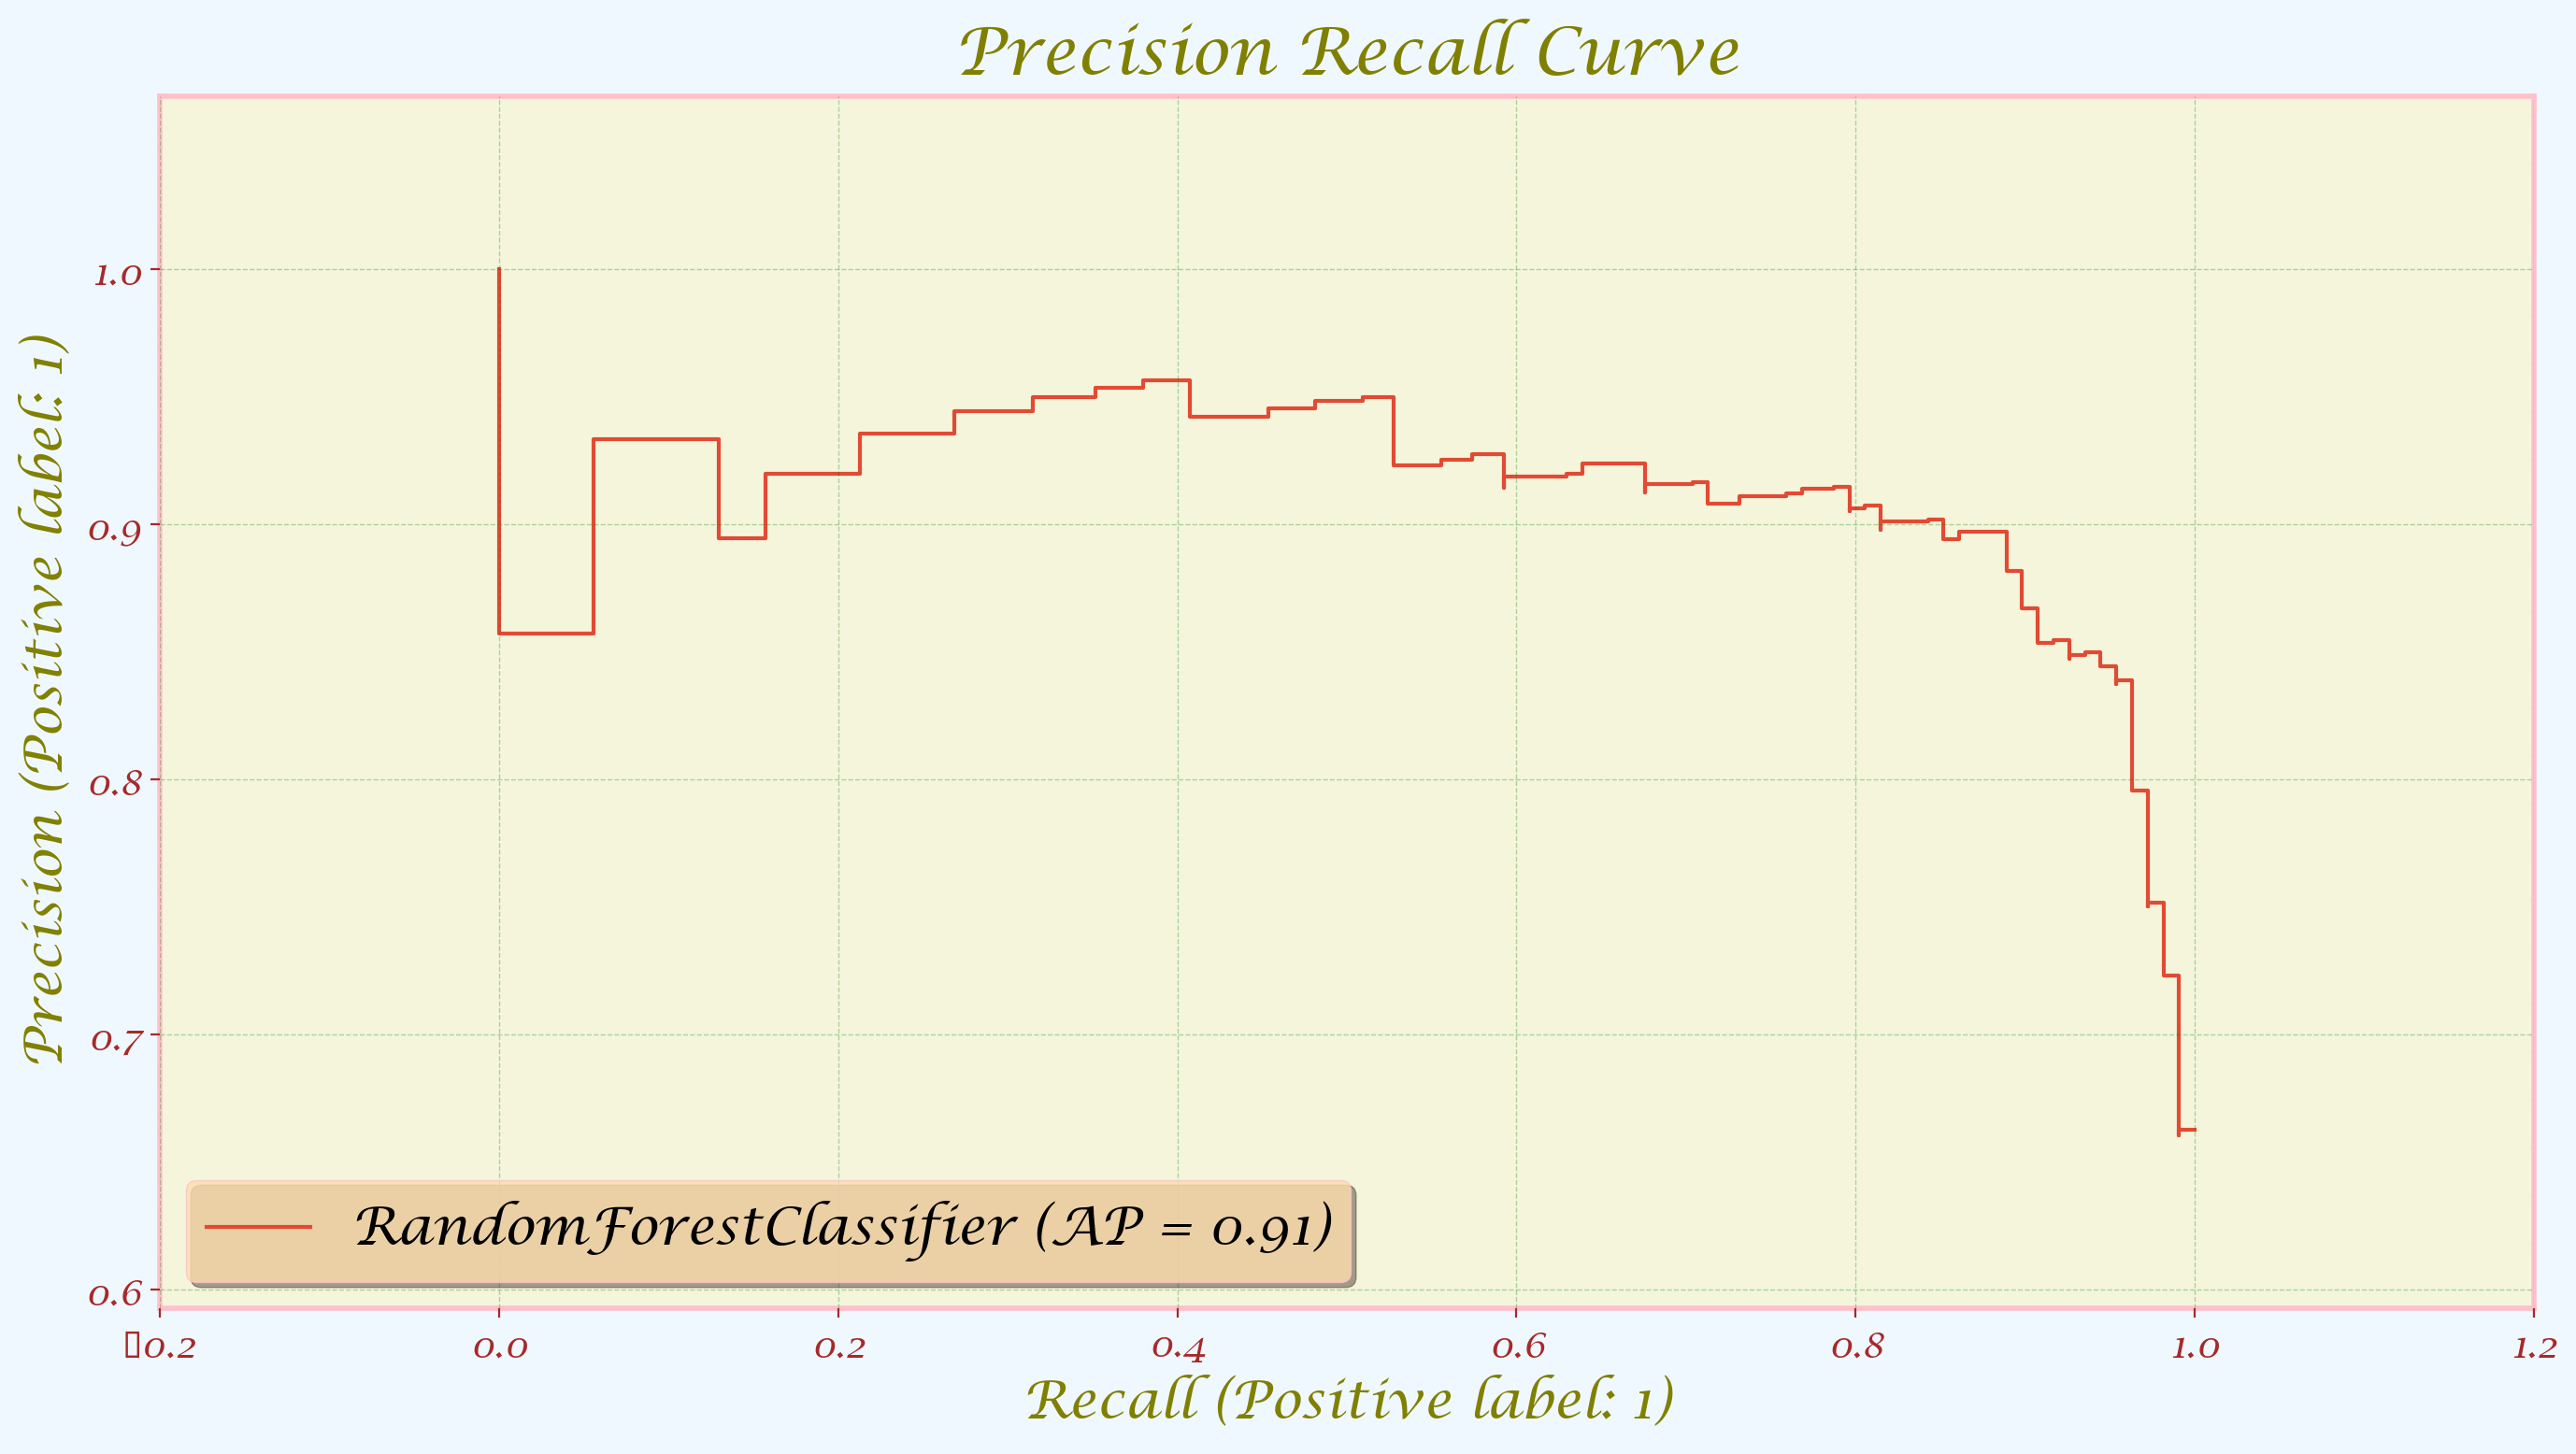

In [86]:
plot_precision_recall_curve(random_forest, X_test_tree, y_test_tree)
plt.title('Precision Recall Curve');

In [87]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=random_forest, X = X_train_tree, y=y_train_tree, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 86.23 %
Std. Dev: 3.83 %


# 5.0 Model Evaluation

In [88]:
models = pd.DataFrame({
    'Model': [
        'KNeighborsClassifier','Support Vector Machines', 
        'Decision Tree','Random Forest'],
    'Training Accuracy': [
         knn_train,svc_train,
        decision_train, random_forest_train],
    'Model f1 Score': [
        knn_f1,svc_f1, 
        decision_f1, random_forest_f1],
    'Model Accuracy Score': [
        knn_accuracy,svc_accuracy,
       decision_accuracy, random_forest_accuracy]
    
})

In [89]:
# Accuracy Comparison Table 
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='cool').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

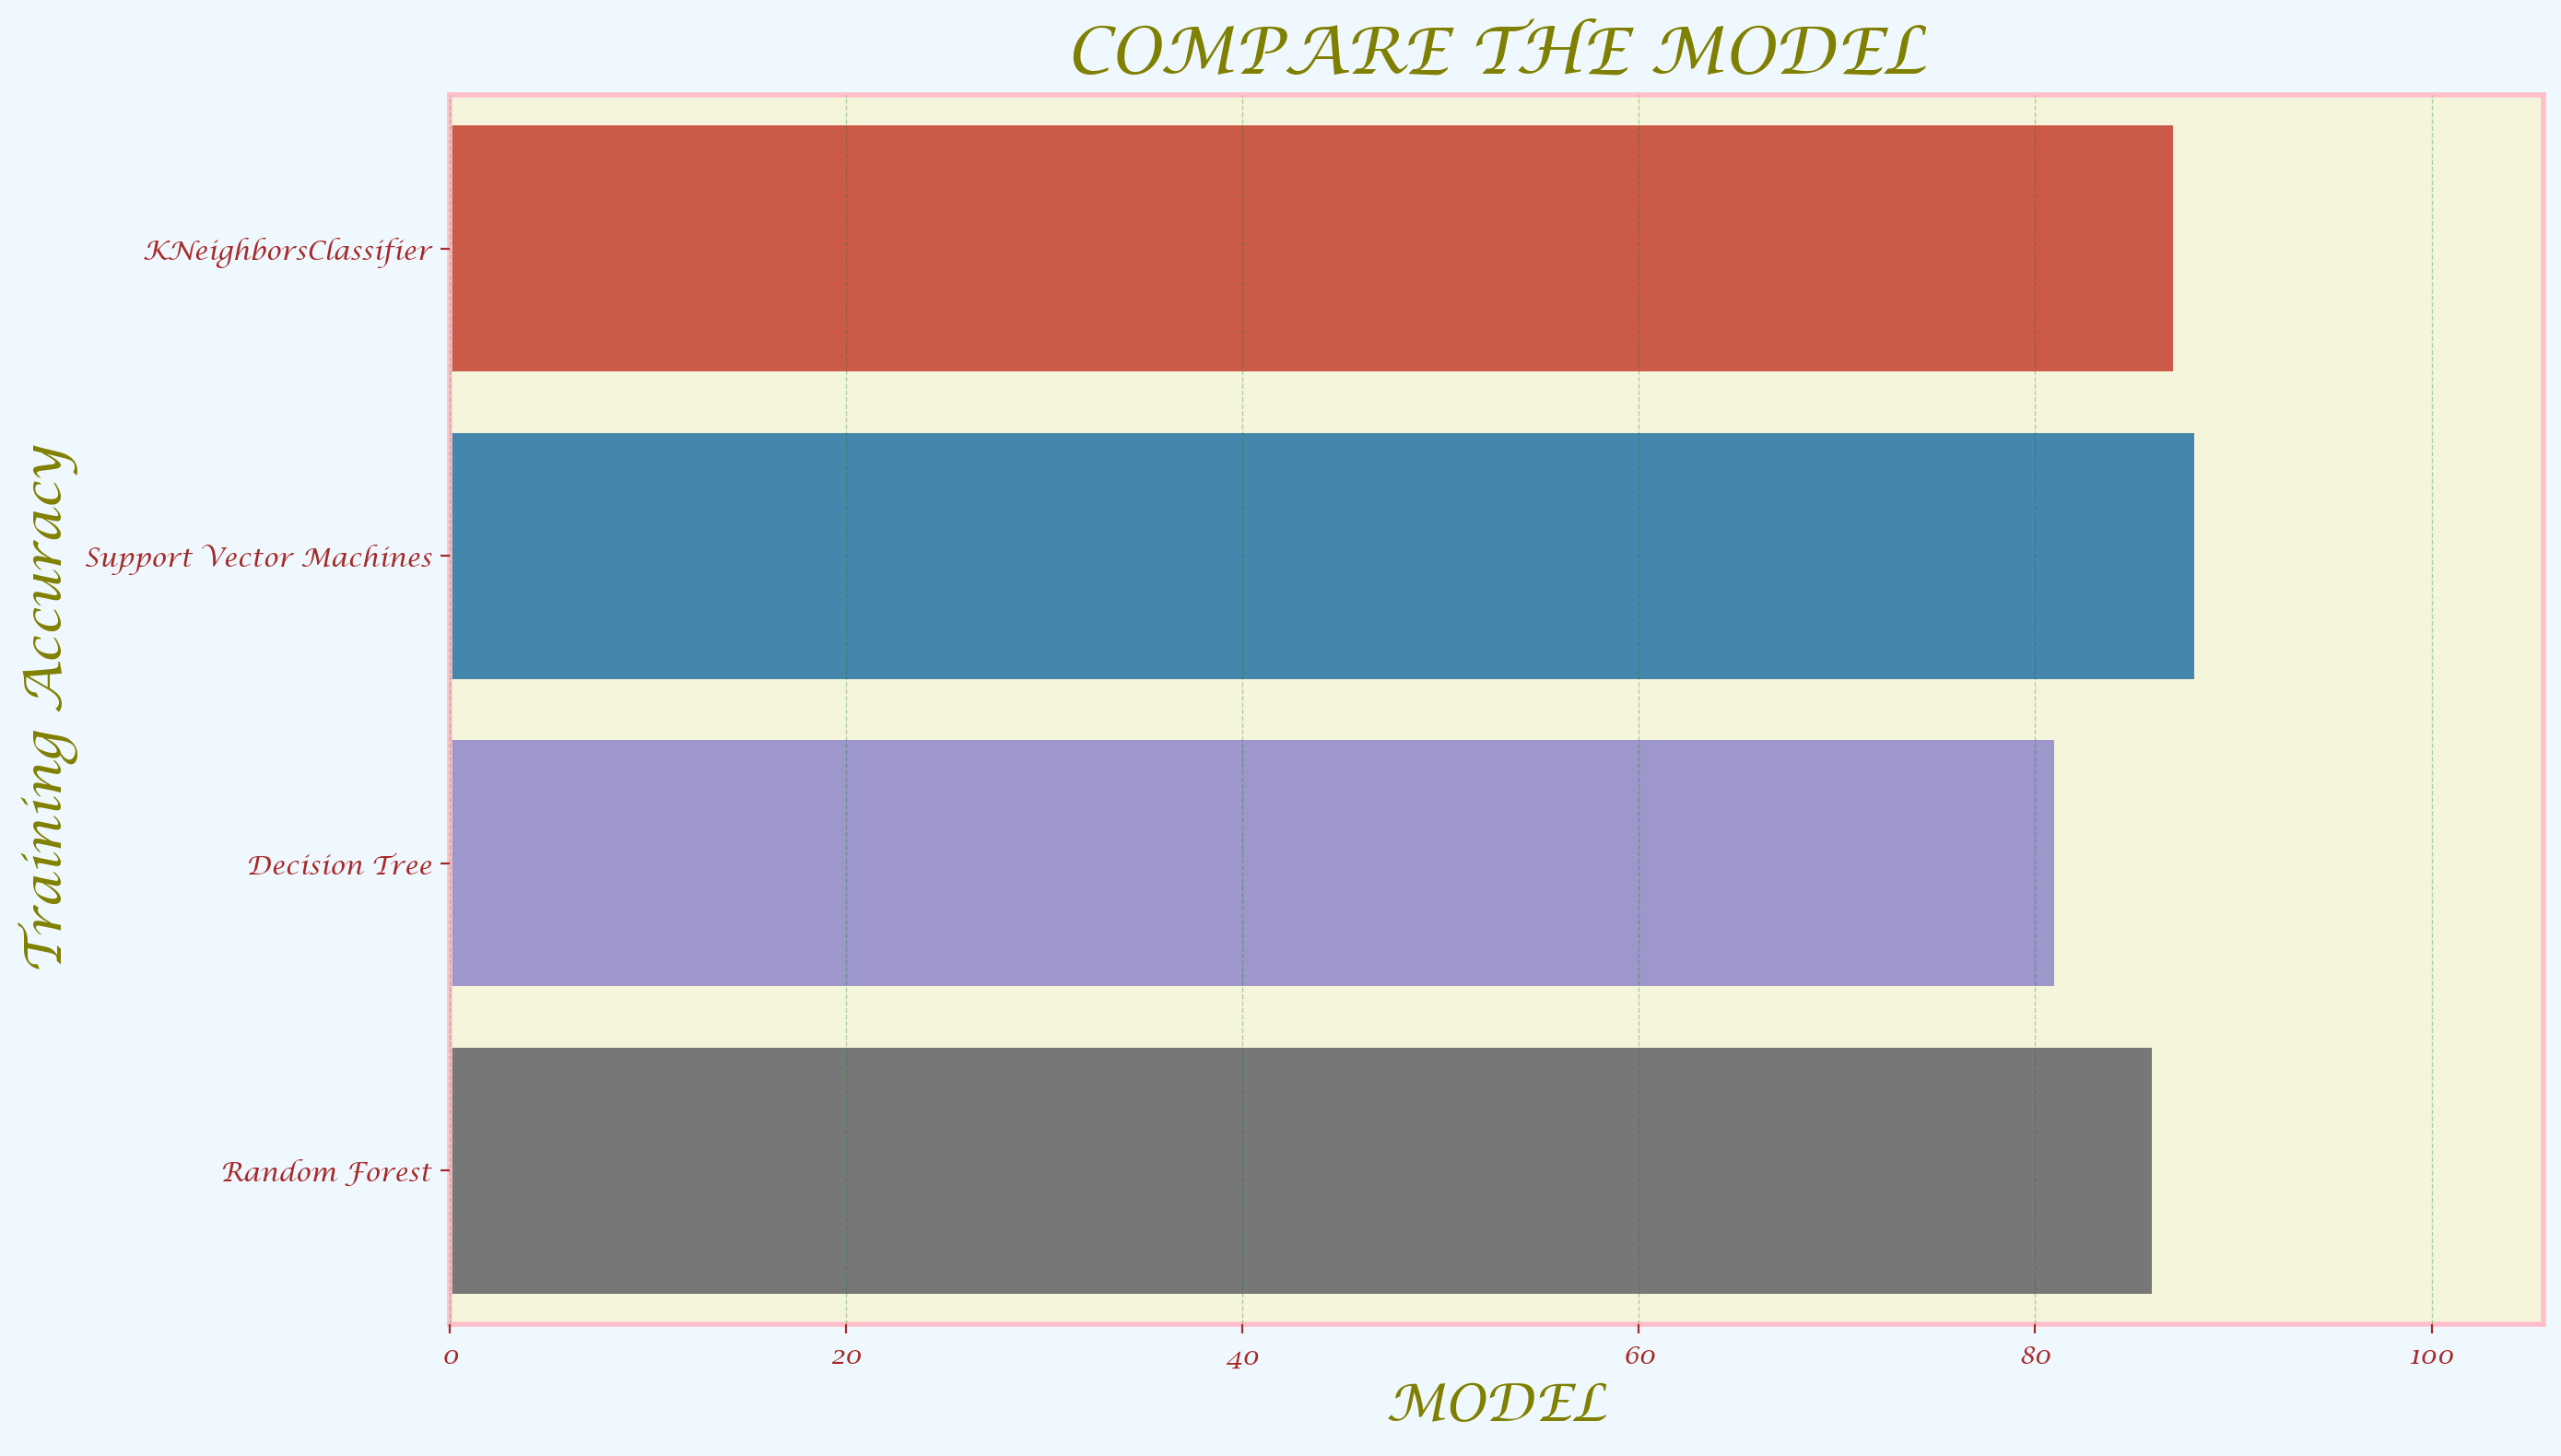

In [90]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2


import seaborn as sns

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

We can see that Support Vector Machines have the highest training accuracy

In [91]:
prediction1 = random_forest.predict(X_test_tree)
print(prediction1)

[1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1]


In [92]:
cross_checking = pd.DataFrame({'Actual' : y_test_tree , 'Predicted' : prediction1})
cross_checking.sample(15).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })